# Ingest Content

## Notes

Collection of notes to help ingest content from a domain. Includes specific instructions to filter output for some domains (like bradfrost.com).

### bradfrost.com

- Exclude `/blog/link/*` and `/blog/tag/*`

## Dependencies

Install the following dependencies first:

In [ ]:
!pip install bs4 jsonlines pytest-playwright

## Install needed browsers

In this case we'll just use Chrome... but Webkit and Firefox get installed, too.

In [ ]:
!playwright install

## Set the domain to ingest

Set the domain you want to have scanned, this will include all subpages on that domain (and that domain only). Excludes links with parameters (`?`) and anchors (`#`).

Also set a name that will be used to create files to persist ingested content.

In [23]:
name = 'kickstartDS_com'
url = 'https://www.kickstartDS.com/'

## Find all internal URLs

First step is to crawl a domain for all internal links leading to HTML content. Do this until everything is discovered. Enter your domain through adjusting the `url` in `__main__`.

Write the set of discovered URLs from `all_links` to disk, converting them to `jsonl` format for easier processing in the next steps. We'll build upon that `page` dict in the following steps.

TODO:
- Still some duplicate URLs (/ vs non-/)
- Not finding some URLs when behind tabbed content? (e.g. https://atlassian.design/components/button/examples -> Usage tab)
- Add exclude list / filter to processed urls (e.g. to exclude stuff like "blog/tag/*")

In [24]:
import asyncio
import requests
import jsonlines
import pathlib
import time
from urllib.parse import urlparse, urljoin
from bs4 import BeautifulSoup
from playwright.async_api import async_playwright
from slugify import slugify
 
def get_domain(url):
    parsed_uri = urlparse(url)
    domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)
    return domain

def get_path(url):
    parsed_uri = urlparse(url)
    return parsed_uri.path
 
def get_links(url, content):
    soup = BeautifulSoup(content, 'html.parser')
    domain = get_domain(url)
    links = set()
    for link in soup.find_all('a'):
        link_url = link.get('href')
        if link_url:
            absolute_link = urljoin(url, link_url)
            if absolute_link.startswith(domain):
                links.add(absolute_link)
    return links
 
async def playwright(url, slug):
    async with async_playwright() as p:
        browser = await p.chromium.launch()
        page = await browser.new_page()
        await page.goto(url)
        
        screenshot_dir = 'screenshots/' + name
        pathlib.Path(screenshot_dir).mkdir(parents=True, exist_ok=True)
        await page.screenshot(path=f'{screenshot_dir}/{slug}-{p.chromium.name}.png')
        
        for i in range(5):
            await page.mouse.wheel(0, 15000)
            time.sleep(0.500)
            i += 1
        
        content = await page.content()
        await browser.close()
        return content
    
if __name__ == '__main__':
    queue = [url]
    visited = set()
    all_links = set()
    pages = []
 
    while queue:
        url = queue.pop(0)
        visited.add(url)
        response = requests.get(url)
        if (response.ok and "text/html" in response.headers['Content-Type']):
            page = dict()
            print(url)
            if (url.rstrip("/") not in all_links):
                all_links.add(url.rstrip("/"))
                page['url'] = url
                page['slug'] = slugify(get_path(page['url']))
                page['content'] = dict()
                page['content']['html'] = await playwright(page['url'], page['slug'])
                pages.append(page)
    
                links = get_links(page['url'], page['content']['html'])
                for link in links:
                    if link not in visited and link not in queue and '#' not in link and '?' not in link:
                        queue.append(link)
    
    print()
    print('All done! ' + str(len(all_links)) + ' links discovered.')

    with jsonlines.open('pages-' + name + '.jsonl', 'w') as writer:
        writer.write_all(pages)

https://bradfrost.com/
https://bradfrost.com/music
https://bradfrost.com/blog
https://bradfrost.com/work
https://bradfrost.com/contact
https://bradfrost.com/speaking
https://bradfrost.com/blog/link/does-your-product-actually-need-dark-mode/
https://bradfrost.com/blog/post/thanks-an-event-apart/
https://bradfrost.com/blog/link/testing-components-in-storybook-in-2023/
https://bradfrost.com/blog/link/modern-health-frameworks-performance-and-harm-eric-bailey/
https://bradfrost.com/blog/link/buttons-and-the-baader-meinhof-phenomenon-manuel-matuzovic/
https://bradfrost.com/blog/link/you-will-never-be-a-full-stack-developer-seldo-com/
https://bradfrost.com/blog/post/the-design-system-mindset/
https://bradfrost.com/blog/link/building-conscious-design-systems/
https://bradfrost.com/blog/link/amateur-lasse-gjertsen/
https://bradfrost.com/blog/post/bullet-points-about-mental-health/
https://bradfrost.com/blog/post/design-systems-in-the-time-of-ai/
https://bradfrost.com/blog/link/the-case-for-flex

https://bradfrost.com/blog/link/building-design-systems-from-atomic-elements/
https://bradfrost.com/blog/post/clarity-conferencebeyond-the-toolkit-spreading-a-system-across-people-products/
https://bradfrost.com/blog/link/web-conference-at-psu/
https://bradfrost.com/blog/post/email-responses-1-workflow-educating-clients/
https://bradfrost.com/blog/post/clarity-conf-building-empowering-style-guides-with-practical-research/
https://bradfrost.com/blog/post/living-systems-brand-in-the-context-of-peoples-lives/
https://bradfrost.com/blog/post/the-technical-side-of-design-systems-at-css-day-in-amsterdam/
https://bradfrost.com/blog/link/clarity-conf-video-online/
https://bradfrost.com/blog/post/clarity-conf-baking-accessibility-in/
https://bradfrost.com/blog/post/clarity-conf-communicating-animation/
https://bradfrost.com/blog/post/clarity-conf-deconstructing-web-systems-or-a-pattern-language-for-web-development/
https://bradfrost.com/blog/post/creative-exhaust/
https://bradfrost.com/blog/lin

https://bradfrost.com/blog/link/location-privilege-and-performant-websites/
https://bradfrost.com/blog/link/why-is-not-an-accordion/
https://bradfrost.com/blog/link/what-a-year-of-learning-and-teaching-accessibility-taught-me-24-accessibility/
https://bradfrost.com/blog/post/the-invisible-aspects-of-design/
https://bradfrost.com/blog/post/why-i-care-about-accessibility/
https://bradfrost.com/blog/link/hey-gov-uk-what-are-you-doing-about-voice/
https://bradfrost.com/blog/post/float-label-pattern/
https://bradfrost.com/blog/link/inclusive-components-cards/
https://bradfrost.com/blog/post/reducing-motion-with-the-picture-element/
https://bradfrost.com/blog/link/empathy-promps/
https://bradfrost.com/blog/mobile/bdconf-stephen-hay-presents-responsive-design-workflow/
https://bradfrost.com/blog/post/the-principles-of-adaptive-design/
https://bradfrost.com/blog/post/techcrunch/
https://bradfrost.com/blog/post/this-is-the-web/
https://bradfrost.com/blog/post/development-is-design/
https://brad

https://bradfrost.com/blog/link/chill-out-and-listen-with-brad-frost/
https://bradfrost.com/blog/post/my-struggle-to-learn-react/
https://bradfrost.com/blog/link/presentational-and-container-components/
https://bradfrost.com/blog/link/blocks-ui/
https://bradfrost.com/blog/link/composing-components/
https://bradfrost.com/blog/link/thinking-about-react-atomically/
https://bradfrost.com/blog/post/style-guide-guide-gatsby-edition/
https://bradfrost.com/blog/link/wordpress-database-migration-tool/
https://bradfrost.com/blog/post/just/
https://bradfrost.com/blog/post/notion-habit-tracking-update-2/
https://bradfrost.com/blog/link/in-defense-of-liking-things/
https://bradfrost.com/blog/post/2021/
https://bradfrost.com/blog/post/slowly-falling-in-love-with-notion/
https://bradfrost.com/blog/link/time-for-happiness/
https://bradfrost.com/blog/post/strange-and-surreal-times/
https://bradfrost.com/blog/post/making-things-in-december/
https://bradfrost.com/blog/post/gramps/
https://bradfrost.com/b

https://bradfrost.com/blog/link/the-book-report-atomic-design/
https://bradfrost.com/blog/post/copy-editing-atomic-design/
https://bradfrost.com/blog/post/container-queries-once-more-unto-the-breach/
https://bradfrost.com/blog/link/the-state-of-responsive-web-design-on-the-mobilemixed-podcast/
https://bradfrost.com/blog/link/video-multi-device-output-input-and-posture/
https://bradfrost.com/blog/post/future-friendly-fruition/
https://bradfrost.com/blog/link/best-of-nine-smashing-years/
https://bradfrost.com/blog/post/revisiting-the-priority-pattern/
https://bradfrost.com/blog/post/the-top-25-responsive-design-tools/
https://bradfrost.com/blog/link/mobile-navigation-and-patterns-on-the-web-payload-podcast/
https://bradfrost.com/blog/link/adaptive-design-what-is-it-and-why-should-i-be-using-it/
https://bradfrost.com/blog/post/five-responsive-web-design-pitfalls-to-avoid/
https://bradfrost.com/blog/post/entertainment-weekly/
https://bradfrost.com/blog/link/why-every-media-website-redesign

https://bradfrost.com/blog/post/planting-the-seed-for-a-responsive-future/
https://bradfrost.com/blog/post/the-many-faces-of-mobile-first/
https://bradfrost.com/blog/post/interview-with-the-next-web/
https://bradfrost.com/blog/post/mobile-web-problems/
https://bradfrost.com/blog/link/lessons-from-the-facebook-mobile-website-team/
https://bradfrost.com/blog/post/ipad3s-retina-display-web/
https://bradfrost.com/blog/post/it-doesnt-matter/
https://bradfrost.com/blog/post/a-tel-tale-sign/
https://bradfrost.com/blog/post/interview-with-a-blackberry-mobile-web-user/
https://bradfrost.com/blog/post/better-numerical-inputs-for-mobile-forms/
https://bradfrost.com/blog/tag/blog/
https://bradfrost.com/blog/tag/jeremy-keith/
https://bradfrost.com/blog/post/conducting-an-interface-inventory/
https://bradfrost.com/blog/tag/style-guide/
https://bradfrost.com/blog/post/interface-inventory
https://bradfrost.com/blog/tag/thunder-nerds/
https://bradfrost.com/blog/tag/notes/
https://bradfrost.com/blog/tag

https://bradfrost.com/blog/tag/landing-page/
https://bradfrost.com/blog/tag/emil-bjorklund/
https://bradfrost.com/blog/post/i-have-no-idea-what-the-hell-i-am-doing/attachment/web-visualized/
https://bradfrost.com/blog/tag/ppk/
https://bradfrost.com/blog/tag/web-developer-toolbar/
https://bradfrost.com/blog/tag/extentions/
https://bradfrost.com/blog/tag/firebug/
https://bradfrost.com/blog/tag/firefox/
https://bradfrost.com/blog/tag/plugins/
https://bradfrost.com/blog/tag/colorzilla/
https://bradfrost.com/blog/tag/html5/
https://bradfrost.com/blog/tag/passion/
https://bradfrost.com/blog/tag/career/
https://bradfrost.com/blog/tag/tools/
https://bradfrost.com/blog/tag/performance-budget/
https://bradfrost.com/blog/tag/frontend-design/
https://bradfrost.com/blog/tag/jason-head/
https://bradfrost.com/blog/tag/nyc/
https://bradfrost.com/blog/tag/marriage/
https://bradfrost.com/blog/tag/bricks/
https://bradfrost.com/blog/tag/mortar/
https://bradfrost.com/blog/tag/project-management/
https://br

https://bradfrost.com/blog/link/the-bitchcast-podcast/
https://bradfrost.com/blog/link/responsive-web-design-6-experts-4-questions/
https://bradfrost.com/blog/link/10-people-whose-work-has-rocked-the-web-design-industry/
https://bradfrost.com/blog/link/episode-25-brad-frost-knows-about-adult-diaper-road-trips/
https://bradfrost.com/blog/link/what-pittsburghers-know-about-the-environment-that-trump-still-needs-to-learn/
https://bradfrost.com/blog/link/climate-change-list/
https://bradfrost.com/blog/link/container-queries-in-web-components-max-bock/
https://bradfrost.com/blog/link/web-components-stencil-js-build-custom-html-elements/
https://bradfrost.com/blog/link/polymer-element-catalog/
https://bradfrost.com/blog/link/bruck/
https://bradfrost.com/blog/link/building-a-design-system-for-healthcare-gov/
https://bradfrost.com/blog/link/do-i-need-a-custom-select/
https://bradfrost.com/blog/link/defensive-css-ahmad-shadeed/
https://bradfrost.com/blog/link/11643/
https://bradfrost.com/blog/l

https://bradfrost.com/blog/tag/slides/
https://bradfrost.com/blog/tag/hbr/
https://bradfrost.com/blog/tag/harvard-business-review/
https://bradfrost.com/blog/tag/pam-griffith/
https://bradfrost.com/blog/tag/frost-finery/
https://bradfrost.com/blog/tag/jewelry/
https://bradfrost.com/blog/tag/chicago-sun-times/
https://bradfrost.com/blog/tag/context-switching/
https://bradfrost.com/blog/tag/webinar/
https://bradfrost.com/blog/tag/aquent/
https://bradfrost.com/blog/tag/jeremy-osborn/
https://bradfrost.com/blog/tag/photography/
https://bradfrost.com/blog/tag/the-onion/
https://bradfrost.com/blog/tag/focus/
https://bradfrost.com/blog/tag/99u/
https://bradfrost.com/blog/tag/made-in-pgh/
https://bradfrost.com/blog/web/creatives/
https://bradfrost.com/blog/post/death-to-bullshit/attachment/death-to-bullshit/
https://bradfrost.com/blog/post/death-to-bullshit/attachment/death-to-bullshit-2/
https://bradfrost.com/blog/tag/the-outline/
https://bradfrost.com/blog/post/living-with-bullshit/attachmen

https://bradfrost.com/blog/link/identifying-auditing-and-discussing-third-parties/
https://bradfrost.com/blog/link/http2-in-5-minutes/
https://bradfrost.com/blog/link/oakleys-monster-page-of-baubles/
https://bradfrost.com/blog/link/making-a-difference-with-performance/
https://bradfrost.com/blog/link/third-party-scripts/
https://bradfrost.com/blog/link/page-weight-matters/
https://bradfrost.com/blog/link/frontend-performance-checklist/
https://bradfrost.com/blog/post/perform/
https://bradfrost.com/blog/link/sparkbox-labs/
https://bradfrost.com/blog/post/creatives/
https://bradfrost.com/blog/link/a-cat-is-not-an-iphone/
https://bradfrost.com/blog/post/a-response-to-responsive-web-design-is-not-the-future/
https://bradfrost.com/blog/link/responsive-design-for-apps-part-1/
https://bradfrost.com/blog/link/snippet-170-job-title-its-complicated/
https://bradfrost.com/blog/post/atomic-design-makes-me-feel-like-a-chemist/
https://bradfrost.com/blog/link/i-made-the-bukk-it-list/
https://bradfro

https://bradfrost.com/blog/link/gridless-design/
https://bradfrost.com/blog/page/6/
https://bradfrost.com/blog/tag/vscode/
https://bradfrost.com/blog/tag/moxie-marlinspike/
https://bradfrost.com/blog/tag/blockchain/
https://bradfrost.com/blog/tag/cryptography/
https://bradfrost.com/blog/tag/timeline/
https://bradfrost.com/blog/link/the-presence-prison-signal-v-noise/
https://bradfrost.com/blog/post/new-profile-pic/
https://bradfrost.com/blog/post/monday-design-day-wednesday-3/
https://bradfrost.com/blog/link/using-linked-smartobjects-in-combination-with-layercomps-in-photoshop-cc/
https://bradfrost.com/blog/link/the-post-psd-era-a-problem-of-expectations/
https://bradfrost.com/blog/post/monopoly-photoshop-template/
https://bradfrost.com/blog/post/monday-design-day-thursday-4/
https://bradfrost.com/blog/link/what-the-guardian-gained-by-redesigning-its-website-in-the-open/
https://bradfrost.com/blog/link/design-open/
https://bradfrost.com/blog/link/garth-braithwaite-on-open-design/
https

https://bradfrost.com/blog/page/7/
https://bradfrost.com/blog/tag/social-networking/
https://bradfrost.com/blog/tag/circles/
https://bradfrost.com/blog/design/monopoly-photoshop-template/
https://bradfrost.com/blog/tag/monopoly/
https://bradfrost.com/blog/design/monday-design-day-wednesday-3/
https://bradfrost.com/blog/tag/grayscale/
https://bradfrost.com/blog/tag/the-guardian/
https://bradfrost.com/blog/tag/open-design/
https://bradfrost.com/blog/tag/design-open/
https://bradfrost.com/blog/tag/adobe/
https://bradfrost.com/blog/tag/garth-braithwaite/
https://bradfrost.com/blog/tag/artist/
https://bradfrost.com/blog/tag/notifications/
https://bradfrost.com/blog/tag/messaging/
https://bradfrost.com/blog/tag/xkcd/
https://bradfrost.com/blog/tag/chat/
https://bradfrost.com/blog/tag/evernote/
https://bradfrost.com/blog/tag/nozzman/
https://bradfrost.com/blog/tag/ziggy/
https://bradfrost.com/blog/tag/shannon-fisher/
https://bradfrost.com/blog/tag/dogs/
https://bradfrost.com/blog/tag/ed-lea/


## More dependencies

Install trafilatura, that will be used to extract the content from pages, and tiktoken to have a first relevant token measurement for complete page content.

In [ ]:
!pip install trafilatura tiktoken

## Extract content from discovered pages

We'll keep Markdown formatting for now. It will be used to split sections from pages by slicing by headlines. 

In [25]:
import re
import jsonlines
import tiktoken
from bs4 import BeautifulSoup
from trafilatura import load_html, extract
from markdown import markdown

enc = tiktoken.encoding_for_model("text-davinci-003")

def markdown_to_text(markdown_string):
    html = markdown(markdown_string)

    html = re.sub(r'<pre>(.*?)</pre>', ' ', html)
    html = re.sub(r'<code>(.*?)</code >', ' ', html)

    soup = BeautifulSoup(html, "html.parser")
    text = ''.join(soup.findAll(text=True))

    return text

extracted_content = []
with jsonlines.open('pages-' + name + '.jsonl') as pages:
    for page in pages:
        if (page['content']['html']):
            downloaded = load_html(page['content']['html'])
            parsed = BeautifulSoup(str(downloaded))
            ogTitle = parsed.find("meta", property="og:title")
            title = parsed.title.string if (parsed.title and parsed.title.string) else ogTitle["content"] if ogTitle else page['url']
            result = extract(downloaded, url=page['url'], include_formatting=True)

            if result is None:
                print('couldnt extract:', page['url'])
            else:
                augmented = dict()
                augmented['url'] = page['url']
                augmented['slug'] = page['slug']

                augmented['content'] = page['content']
                augmented['content']['raw'] = markdown_to_text(result)
                augmented['content']['markdown'] = result

                augmented['title'] = title
                augmented['lines'] = result.splitlines()
                augmented['size'] = len(result)
                augmented['token'] = len(enc.encode(result))

                extracted_content.append(augmented)
                print('extracted:', augmented['url'], augmented['title'], str(augmented['token']) + ' Token,', len(result))  

with jsonlines.open('pages-' + name + '_extracted.jsonl', 'w') as pages:
    pages.write_all(extracted_content)
    
print('wrote extracted content to "pages-' + name + '_extracted.jsonl"')

extracted: https://bradfrost.com/ https://bradfrost.com/ 27 Token, 108
extracted: https://bradfrost.com/music https://bradfrost.com/music 92 Token, 381
extracted: https://bradfrost.com/blog https://bradfrost.com/blog 1275 Token, 5268
extracted: https://bradfrost.com/work https://bradfrost.com/work 122 Token, 636
extracted: https://bradfrost.com/contact https://bradfrost.com/contact 329 Token, 1241
extracted: https://bradfrost.com/speaking https://bradfrost.com/speaking 2255 Token, 8133
extracted: https://bradfrost.com/blog/link/does-your-product-actually-need-dark-mode/ https://bradfrost.com/blog/link/does-your-product-actually-need-dark-mode/ 266 Token, 1126
extracted: https://bradfrost.com/blog/post/thanks-an-event-apart/ https://bradfrost.com/blog/post/thanks-an-event-apart/ 645 Token, 2911
extracted: https://bradfrost.com/blog/link/testing-components-in-storybook-in-2023/ https://bradfrost.com/blog/link/testing-components-in-storybook-in-2023/ 144 Token, 666
extracted: https://brad

extracted: https://bradfrost.com/blog/tag/inspiration/ https://bradfrost.com/blog/tag/inspiration/ 1143 Token, 4406
extracted: https://bradfrost.com/blog/tag/music/ https://bradfrost.com/blog/tag/music/ 1996 Token, 8045
extracted: https://bradfrost.com/blog/tag/music-video/ https://bradfrost.com/blog/tag/music-video/ 230 Token, 889
extracted: https://bradfrost.com/blog/tag/creativity/ https://bradfrost.com/blog/tag/creativity/ 478 Token, 2059
extracted: https://bradfrost.com/blog/tag/therapy/ https://bradfrost.com/blog/tag/therapy/ 76 Token, 336
extracted: https://bradfrost.com/blog/tag/psychedelics/ https://bradfrost.com/blog/tag/psychedelics/ 77 Token, 341
extracted: https://bradfrost.com/blog/post/things-you-could-be-doing-instead-of-designing-building-that-card-component-for-the-umpteenth-time/ https://bradfrost.com/blog/post/things-you-could-be-doing-instead-of-designing-building-that-card-component-for-the-umpteenth-time/ 756 Token, 3534
extracted: https://bradfrost.com/blog/post

extracted: https://bradfrost.com/blog/tag/pattern-lab/ https://bradfrost.com/blog/tag/pattern-lab/ 2024 Token, 8293
extracted: https://bradfrost.com/blog/tag/smashingconf/ https://bradfrost.com/blog/tag/smashingconf/ 496 Token, 2041
extracted: https://bradfrost.com/blog/tag/responsive-field-day/ https://bradfrost.com/blog/tag/responsive-field-day/ 49 Token, 195
extracted: https://bradfrost.com/blog/tag/sophie-shepherd/ https://bradfrost.com/blog/tag/sophie-shepherd/ 223 Token, 885
extracted: https://bradfrost.com/blog/tag/portland/ https://bradfrost.com/blog/tag/portland/ 49 Token, 195
extracted: https://bradfrost.com/blog/tag/jason-grigsby/ https://bradfrost.com/blog/tag/jason-grigsby/ 147 Token, 589
extracted: https://bradfrost.com/blog/tag/val-head/ https://bradfrost.com/blog/tag/val-head/ 188 Token, 728
extracted: https://bradfrost.com/blog/tag/lecture/ https://bradfrost.com/blog/tag/lecture/ 45 Token, 207
extracted: https://bradfrost.com/blog/tag/bullshit/ https://bradfrost.com/bl

extracted: https://bradfrost.com/blog/link/ia-summit-responsive-design-workshop/ https://bradfrost.com/blog/link/ia-summit-responsive-design-workshop/ 73 Token, 293
extracted: https://bradfrost.com/blog/link/ladies-in-tech-podcast/ https://bradfrost.com/blog/link/ladies-in-tech-podcast/ 59 Token, 273
extracted: https://bradfrost.com/blog/post/upcoming-speaking-events/ https://bradfrost.com/blog/post/upcoming-speaking-events/ 457 Token, 2000
extracted: https://bradfrost.com/blog/post/on-speaking/ https://bradfrost.com/blog/post/on-speaking/ 1963 Token, 8323
extracted: https://bradfrost.com/blog/link/london-responsive-web-design-workshop/ https://bradfrost.com/blog/link/london-responsive-web-design-workshop/ 71 Token, 278
extracted: https://bradfrost.com/blog/link/unfinished-business-episode-105-seventeen-coats-of-bullshit-with-dan-mall-and-jeffrey-zeldman/ https://bradfrost.com/blog/link/unfinished-business-episode-105-seventeen-coats-of-bullshit-with-dan-mall-and-jeffrey-zeldman/ 61 To

extracted: https://bradfrost.com/blog/link/gov-uks-progressive-enhancement-guidelines/ https://bradfrost.com/blog/link/gov-uks-progressive-enhancement-guidelines/ 32 Token, 139
extracted: https://bradfrost.com/blog/link/resilient-web-design/ https://bradfrost.com/blog/link/resilient-web-design/ 63 Token, 278
extracted: https://bradfrost.com/blog/link/no-you-suck-and-other-poignant-progressive-enhancement-arguments/ https://bradfrost.com/blog/link/no-you-suck-and-other-poignant-progressive-enhancement-arguments/ 728 Token, 2900
extracted: https://bradfrost.com/blog/post/on-progressive-enhancement/ https://bradfrost.com/blog/post/on-progressive-enhancement/ 2979 Token, 12704
extracted: https://bradfrost.com/blog/post/over-it/ https://bradfrost.com/blog/post/over-it/ 640 Token, 2654
extracted: https://bradfrost.com/blog/post/what-is-the-web-for/ https://bradfrost.com/blog/post/what-is-the-web-for/ 234 Token, 972
extracted: https://bradfrost.com/blog/link/12167/ https://bradfrost.com/blog/

extracted: https://bradfrost.com/blog/post/frontend-design-react-and-a-bridge-over-the-great-divide/ https://bradfrost.com/blog/post/frontend-design-react-and-a-bridge-over-the-great-divide/ 5143 Token, 22302
extracted: https://bradfrost.com/blog/post/the-importance-of-temporary-landing-pages/ https://bradfrost.com/blog/post/the-importance-of-temporary-landing-pages/ 1033 Token, 4801
extracted: https://bradfrost.com/blog/link/goodbye-clean-code/ https://bradfrost.com/blog/link/goodbye-clean-code/ 99 Token, 439
extracted: https://bradfrost.com/blog/link/cheating-entropy-with-native-web-technologies/ https://bradfrost.com/blog/link/cheating-entropy-with-native-web-technologies/ 93 Token, 377
extracted: https://bradfrost.com/blog/post/level-of-effort/ https://bradfrost.com/blog/post/level-of-effort/ 839 Token, 3503
extracted: https://bradfrost.com/blog/post/music-and-web-design/ https://bradfrost.com/blog/post/music-and-web-design/ 2037 Token, 8976
extracted: https://bradfrost.com/blog/li

extracted: https://bradfrost.com/blog/link/back-to-the-cave/ https://bradfrost.com/blog/link/back-to-the-cave/ 139 Token, 577
extracted: https://bradfrost.com/blog/link/wake-up-excited/ https://bradfrost.com/blog/link/wake-up-excited/ 38 Token, 145
extracted: https://bradfrost.com/blog/link/abstract-the-art-of-design/ https://bradfrost.com/blog/link/abstract-the-art-of-design/ 125 Token, 561
extracted: https://bradfrost.com/blog/link/hello-were-sandwich/ https://bradfrost.com/blog/link/hello-were-sandwich/ 73 Token, 343
extracted: https://bradfrost.com/blog/post/oil-city-high-school-2017-commencement-speech/ https://bradfrost.com/blog/post/oil-city-high-school-2017-commencement-speech/ 2295 Token, 9644
extracted: https://bradfrost.com/blog/link/smashing-conf-lonely-hearts-club-band/ https://bradfrost.com/blog/link/smashing-conf-lonely-hearts-club-band/ 74 Token, 318
extracted: https://bradfrost.com/blog/post/making-things-in-december-3-assembling-a-jewelers-bench-and-bonus-track/ https

extracted: https://bradfrost.com/blog/link/blocks-ui/ https://bradfrost.com/blog/link/blocks-ui/ 135 Token, 615
extracted: https://bradfrost.com/blog/link/composing-components/ https://bradfrost.com/blog/link/composing-components/ 35 Token, 139
extracted: https://bradfrost.com/blog/link/thinking-about-react-atomically/ https://bradfrost.com/blog/link/thinking-about-react-atomically/ 274 Token, 1346
extracted: https://bradfrost.com/blog/post/style-guide-guide-gatsby-edition/ https://bradfrost.com/blog/post/style-guide-guide-gatsby-edition/ 1174 Token, 5498
extracted: https://bradfrost.com/blog/link/wordpress-database-migration-tool/ https://bradfrost.com/blog/link/wordpress-database-migration-tool/ 70 Token, 334
extracted: https://bradfrost.com/blog/post/just/ https://bradfrost.com/blog/post/just/ 655 Token, 2694
extracted: https://bradfrost.com/blog/post/notion-habit-tracking-update-2/ https://bradfrost.com/blog/post/notion-habit-tracking-update-2/ 310 Token, 1293
extracted: https://br

extracted: https://bradfrost.com/blog/link/make-free-stuff-max-bock/ https://bradfrost.com/blog/link/make-free-stuff-max-bock/ 215 Token, 896
extracted: https://bradfrost.com/blog/link/css-in-real-life-a-blog-post-about-blogging/ https://bradfrost.com/blog/link/css-in-real-life-a-blog-post-about-blogging/ 80 Token, 306
extracted: https://bradfrost.com/blog/link/what-didnt-end-up-in-jira/ https://bradfrost.com/blog/link/what-didnt-end-up-in-jira/ 59 Token, 297
extracted: https://bradfrost.com/blog/page/4/ https://bradfrost.com/blog/page/4/ 1407 Token, 5823
extracted: https://bradfrost.com/blog/post/creative-process-lessons-from-get-back/ https://bradfrost.com/blog/post/creative-process-lessons-from-get-back/ 1795 Token, 7683
extracted: https://bradfrost.com/blog/post/design-system-versioning-single-library-or-individual-components/ https://bradfrost.com/blog/post/design-system-versioning-single-library-or-individual-components/ 1508 Token, 7535
extracted: https://bradfrost.com/blog/link

extracted: https://bradfrost.com/blog/link/the-full-stack-design-system/ https://bradfrost.com/blog/link/the-full-stack-design-system/ 127 Token, 592
extracted: https://bradfrost.com/blog/link/the-onion-for-design-systems-atomic-design-and-pace-layering/ https://bradfrost.com/blog/link/the-onion-for-design-systems-atomic-design-and-pace-layering/ 109 Token, 493
extracted: https://bradfrost.com/blog/link/learning-the-web-using-atomic-design/ https://bradfrost.com/blog/link/learning-the-web-using-atomic-design/ 93 Token, 447
extracted: https://bradfrost.com/blog/link/designing-for-edge-cases/ https://bradfrost.com/blog/link/designing-for-edge-cases/ 81 Token, 334
extracted: https://bradfrost.com/blog/link/reflections-on-building-an-mvp-design-system-in-3-months/ https://bradfrost.com/blog/link/reflections-on-building-an-mvp-design-system-in-3-months/ 96 Token, 436
extracted: https://bradfrost.com/blog/link/10-web-design-trends-you-can-expect-to-see-in-2016/ https://bradfrost.com/blog/lin

extracted: https://bradfrost.com/blog/link/future-learn-pattern-library/ https://bradfrost.com/blog/link/future-learn-pattern-library/ 404 Token, 1853
extracted: https://bradfrost.com/blog/post/style-guide-best-practices/ https://bradfrost.com/blog/post/style-guide-best-practices/ 1589 Token, 7336
extracted: https://bradfrost.com/blog/link/pattern-language-responsive-style-guides/ https://bradfrost.com/blog/link/pattern-language-responsive-style-guides/ 51 Token, 273
extracted: https://bradfrost.com/blog/link/city-of-los-angeles-pattern-lab/ https://bradfrost.com/blog/link/city-of-los-angeles-pattern-lab/ 33 Token, 145
extracted: https://bradfrost.com/blog/link/keeping-pattern-libraries-in-sync/ https://bradfrost.com/blog/link/keeping-pattern-libraries-in-sync/ 225 Token, 1057
extracted: https://bradfrost.com/blog/link/front-end-style-guides/ https://bradfrost.com/blog/link/front-end-style-guides/ 75 Token, 315
extracted: https://bradfrost.com/blog/link/design-systems-pilots-scorecards

extracted: https://bradfrost.com/blog/link/death-to-bullshit-on-99u/ https://bradfrost.com/blog/link/death-to-bullshit-on-99u/ 40 Token, 127
extracted: https://bradfrost.com/blog/link/make-yourself-useful-create-marketing-people-actually-want/ https://bradfrost.com/blog/link/make-yourself-useful-create-marketing-people-actually-want/ 62 Token, 300
extracted: https://bradfrost.com/blog/link/this-pgh-web-designer-explains-how-to-create-work-worth-sharing/ https://bradfrost.com/blog/link/this-pgh-web-designer-explains-how-to-create-work-worth-sharing/ 79 Token, 283
extracted: https://bradfrost.com/blog/post/death-to-bullshit/ https://bradfrost.com/blog/post/death-to-bullshit/ 594 Token, 2435
extracted: https://bradfrost.com/blog/link/death-to-bullshit-now-with-80-more-bullshit/ https://bradfrost.com/blog/link/death-to-bullshit-now-with-80-more-bullshit/ 43 Token, 141
extracted: https://bradfrost.com/blog/link/experts-weigh-in-what-is-the-most-common-web-design-mistake-you-see/ https://bra

extracted: https://bradfrost.com/blog/tag/jeremy-perez-cruz/ https://bradfrost.com/blog/tag/jeremy-perez-cruz/ 100 Token, 390
extracted: https://bradfrost.com/blog/tag/cordelia-mcgee-tubb/ https://bradfrost.com/blog/tag/cordelia-mcgee-tubb/ 89 Token, 384
extracted: https://bradfrost.com/blog/tag/rachel-nabors/ https://bradfrost.com/blog/tag/rachel-nabors/ 85 Token, 357
extracted: https://bradfrost.com/blog/tag/claudina-sarahe/ https://bradfrost.com/blog/tag/claudina-sarahe/ 97 Token, 396
extracted: https://bradfrost.com/blog/tag/pittsburgh/ https://bradfrost.com/blog/tag/pittsburgh/ 836 Token, 3488
extracted: https://bradfrost.com/blog/tag/tedx/ https://bradfrost.com/blog/tag/tedx/ 47 Token, 259
extracted: https://bradfrost.com/blog/tag/generateconf/ https://bradfrost.com/blog/tag/generateconf/ 52 Token, 215
extracted: https://bradfrost.com/blog/tag/net-magazine/ https://bradfrost.com/blog/tag/net-magazine/ 726 Token, 2990
extracted: https://bradfrost.com/blog/tag/beyond-tellerrand/ ht

extracted: https://bradfrost.com/blog/tag/project-healthy-minds/ https://bradfrost.com/blog/tag/project-healthy-minds/ 154 Token, 667
extracted: https://bradfrost.com/blog/tag/covid-19/ https://bradfrost.com/blog/tag/covid-19/ 307 Token, 1159
extracted: https://bradfrost.com/blog/tag/learn/ https://bradfrost.com/blog/tag/learn/ 319 Token, 1315
extracted: https://bradfrost.com/blog/tag/hobbies/ https://bradfrost.com/blog/tag/hobbies/ 141 Token, 570
extracted: https://bradfrost.com/blog/tag/work/ https://bradfrost.com/blog/tag/work/ 207 Token, 820
extracted: https://bradfrost.com/blog/tag/strategy/ https://bradfrost.com/blog/tag/strategy/ 1248 Token, 5248
extracted: https://bradfrost.com/blog/tag/performance/ https://bradfrost.com/blog/tag/performance/ 1466 Token, 6244
extracted: https://bradfrost.com/blog/tag/server-side-rendering/ https://bradfrost.com/blog/tag/server-side-rendering/ 102 Token, 352
extracted: https://bradfrost.com/blog/tag/eleventy/ https://bradfrost.com/blog/tag/eleve

extracted: https://bradfrost.com/blog/tag/prep-chef/ https://bradfrost.com/blog/tag/prep-chef/ 166 Token, 620
extracted: https://bradfrost.com/blog/tag/best-practices/ https://bradfrost.com/blog/tag/best-practices/ 357 Token, 1669
extracted: https://bradfrost.com/blog/tag/landing-page/ https://bradfrost.com/blog/tag/landing-page/ 44 Token, 241
extracted: https://bradfrost.com/blog/tag/emil-bjorklund/ https://bradfrost.com/blog/tag/emil-bjorklund/ 62 Token, 232
extracted: https://bradfrost.com/blog/post/i-have-no-idea-what-the-hell-i-am-doing/attachment/web-visualized/ https://bradfrost.com/blog/post/i-have-no-idea-what-the-hell-i-am-doing/attachment/web-visualized/ 20 Token, 87
extracted: https://bradfrost.com/blog/tag/ppk/ https://bradfrost.com/blog/tag/ppk/ 55 Token, 237
extracted: https://bradfrost.com/blog/tag/web-developer-toolbar/ https://bradfrost.com/blog/tag/web-developer-toolbar/ 80 Token, 348
extracted: https://bradfrost.com/blog/tag/extentions/ https://bradfrost.com/blog/ta

extracted: https://bradfrost.com/blog/tag/cake/ https://bradfrost.com/blog/tag/cake/ 164 Token, 592
extracted: https://bradfrost.com/blog/tag/this-is-my-jam/ https://bradfrost.com/blog/tag/this-is-my-jam/ 49 Token, 218
extracted: https://bradfrost.com/blog/tag/rock-and-roll/ https://bradfrost.com/blog/tag/rock-and-roll/ 128 Token, 480
extracted: https://bradfrost.com/blog/tag/moog/ https://bradfrost.com/blog/tag/moog/ 34 Token, 140
extracted: https://bradfrost.com/blog/tag/m-i-a/ https://bradfrost.com/blog/tag/m-i-a/ 53 Token, 217
extracted: https://bradfrost.com/blog/tag/midnight-spaghetti/ https://bradfrost.com/blog/tag/midnight-spaghetti/ 152 Token, 606
extracted: https://bradfrost.com/blog/tag/funk/ https://bradfrost.com/blog/tag/funk/ 87 Token, 335
extracted: https://bradfrost.com/blog/tag/home-office/ https://bradfrost.com/blog/tag/home-office/ 49 Token, 202
extracted: https://bradfrost.com/blog/tag/weird-al/ https://bradfrost.com/blog/tag/weird-al/ 54 Token, 218
extracted: https

extracted: https://bradfrost.com/blog/tag/hoarding/ https://bradfrost.com/blog/tag/hoarding/ 58 Token, 224
extracted: https://bradfrost.com/blog/link https://bradfrost.com/blog/link 1883 Token, 7668
extracted: https://bradfrost.com/blog/link/its-2020-and-youre-in-the-future-wait-but-why/ https://bradfrost.com/blog/link/its-2020-and-youre-in-the-future-wait-but-why/ 85 Token, 275
extracted: https://bradfrost.com/blog/link/6247/ https://bradfrost.com/blog/link/6247/ 71 Token, 321
extracted: https://bradfrost.com/blog/link/10-twitter-accounts-every-web-designer-should-follow/ https://bradfrost.com/blog/link/10-twitter-accounts-every-web-designer-should-follow/ 62 Token, 221
extracted: https://bradfrost.com/blog/link/designing-media-queries-a-few-great-resources/ https://bradfrost.com/blog/link/designing-media-queries-a-few-great-resources/ 32 Token, 171
extracted: https://bradfrost.com/blog/link/responsive-resource-library-on-mashable/ https://bradfrost.com/blog/link/responsive-resource-l

extracted: https://bradfrost.com/blog/link/avoiding-burnout-as-an-ambitious-developer-stack-overflow-blog/ https://bradfrost.com/blog/link/avoiding-burnout-as-an-ambitious-developer-stack-overflow-blog/ 168 Token, 691
extracted: https://bradfrost.com/blog/tag/comedy/ https://bradfrost.com/blog/tag/comedy/ 53 Token, 213
extracted: https://bradfrost.com/blog/tag/i-think-you-should-leave/ https://bradfrost.com/blog/tag/i-think-you-should-leave/ 53 Token, 213
extracted: https://bradfrost.com/blog/tag/books/ https://bradfrost.com/blog/tag/books/ 33 Token, 141
extracted: https://bradfrost.com/blog/tag/responsive-design/ https://bradfrost.com/blog/tag/responsive-design/ 67 Token, 246
extracted: https://bradfrost.com/blog/tag/max-bock/ https://bradfrost.com/blog/tag/max-bock/ 51 Token, 246
extracted: https://bradfrost.com/blog/tag/web3/ https://bradfrost.com/blog/tag/web3/ 152 Token, 609
extracted: https://bradfrost.com/blog/tag/jira/ https://bradfrost.com/blog/tag/jira/ 29 Token, 148
extracte

extracted: https://bradfrost.com/blog/tag/lukew/ https://bradfrost.com/blog/tag/lukew/ 444 Token, 1879
extracted: https://bradfrost.com/blog/tag/watch/ https://bradfrost.com/blog/tag/watch/ 55 Token, 254
extracted: https://bradfrost.com/blog/web/complex-navigation-patterns-for-responsive-design/ https://bradfrost.com/blog/web/complex-navigation-patterns-for-responsive-design/ 3609 Token, 15235
extracted: https://bradfrost.com/blog/web/responsive-nav-patterns/ https://bradfrost.com/blog/web/responsive-nav-patterns/ 4436 Token, 19120
extracted: https://bradfrost.com/blog/tag/navigation/ https://bradfrost.com/blog/tag/navigation/ 390 Token, 1786
extracted: https://bradfrost.com/blog/tag/repost/ https://bradfrost.com/blog/tag/repost/ 303 Token, 1232
extracted: https://bradfrost.com/blog/tag/lara-kalbag/ https://bradfrost.com/blog/tag/lara-kalbag/ 34 Token, 195
extracted: https://bradfrost.com/blog/tag/aaron-gustafson/ https://bradfrost.com/blog/tag/aaron-gustafson/ 139 Token, 573
extracted

extracted: https://bradfrost.com/blog/tag/the-onion/ https://bradfrost.com/blog/tag/the-onion/ 83 Token, 357
extracted: https://bradfrost.com/blog/tag/focus/ https://bradfrost.com/blog/tag/focus/ 82 Token, 353
extracted: https://bradfrost.com/blog/tag/99u/ https://bradfrost.com/blog/tag/99u/ 58 Token, 183
extracted: https://bradfrost.com/blog/tag/made-in-pgh/ https://bradfrost.com/blog/tag/made-in-pgh/ 39 Token, 141
extracted: https://bradfrost.com/blog/web/creatives/ https://bradfrost.com/blog/web/creatives/ 217 Token, 857
extracted: https://bradfrost.com/blog/post/death-to-bullshit/attachment/death-to-bullshit/ https://bradfrost.com/blog/post/death-to-bullshit/attachment/death-to-bullshit/ 20 Token, 93
extracted: https://bradfrost.com/blog/post/death-to-bullshit/attachment/death-to-bullshit-2/ https://bradfrost.com/blog/post/death-to-bullshit/attachment/death-to-bullshit-2/ 22 Token, 79
extracted: https://bradfrost.com/blog/tag/the-outline/ https://bradfrost.com/blog/tag/the-outline/

extracted: https://bradfrost.com/blog/link/maker-series-recap-brad-frost/ https://bradfrost.com/blog/link/maker-series-recap-brad-frost/ 138 Token, 601
extracted: https://bradfrost.com/blog/post/hi-res-optimization/ https://bradfrost.com/blog/post/hi-res-optimization/ 2225 Token, 9536
extracted: https://bradfrost.com/blog/link/cosma-schema/ https://bradfrost.com/blog/link/cosma-schema/ 131 Token, 626
extracted: https://bradfrost.com/blog/post/awesome-animated-gif/ https://bradfrost.com/blog/post/awesome-animated-gif/ 131 Token, 529
extracted: https://bradfrost.com/blog/link/design-systems-will-only-work-if-we-improve-the-way-we-work-together/ https://bradfrost.com/blog/link/design-systems-will-only-work-if-we-improve-the-way-we-work-together/ 85 Token, 448
extracted: https://bradfrost.com/blog/link/reasons-to-be-responsive-workshop-report/ https://bradfrost.com/blog/link/reasons-to-be-responsive-workshop-report/ 97 Token, 403
extracted: https://bradfrost.com/blog/link/atomic-design-pat

extracted: https://bradfrost.com/blog/post/prioritizing-performance-in-responsive-design/ https://bradfrost.com/blog/post/prioritizing-performance-in-responsive-design/ 1623 Token, 7361
extracted: https://bradfrost.com/blog/link/front-end-performance-checklist-2018/ https://bradfrost.com/blog/link/front-end-performance-checklist-2018/ 85 Token, 401
extracted: https://bradfrost.com/blog/link/article-performance-leaderboard/ https://bradfrost.com/blog/link/article-performance-leaderboard/ 89 Token, 397
extracted: https://bradfrost.com/blog/link/identifying-auditing-and-discussing-third-parties/ https://bradfrost.com/blog/link/identifying-auditing-and-discussing-third-parties/ 62 Token, 316
extracted: https://bradfrost.com/blog/link/http2-in-5-minutes/ https://bradfrost.com/blog/link/http2-in-5-minutes/ 74 Token, 302
extracted: https://bradfrost.com/blog/link/oakleys-monster-page-of-baubles/ https://bradfrost.com/blog/link/oakleys-monster-page-of-baubles/ 72 Token, 314
extracted: https://

extracted: https://bradfrost.com/blog/link/project-hubs/ https://bradfrost.com/blog/link/project-hubs/ 75 Token, 332
extracted: https://bradfrost.com/blog/post/selleck-waterfall-sandwich/ https://bradfrost.com/blog/post/selleck-waterfall-sandwich/ 103 Token, 438
extracted: https://bradfrost.com/blog/post/please-hammer-dont-hurt-em/ https://bradfrost.com/blog/post/please-hammer-dont-hurt-em/ 33 Token, 102
extracted: https://bradfrost.com/blog/post/rolling-rick/ https://bradfrost.com/blog/post/rolling-rick/ 52 Token, 209
extracted: https://bradfrost.com/blog/post/hilarious-client-videos/ https://bradfrost.com/blog/post/hilarious-client-videos/ 34 Token, 174
extracted: https://bradfrost.com/blog/post/ludacris-proximity-sadness-meter/ https://bradfrost.com/blog/post/ludacris-proximity-sadness-meter/ 38 Token, 110
extracted: https://bradfrost.com/blog/post/die-antwoord-zef-side/ https://bradfrost.com/blog/post/die-antwoord-zef-side/ 56 Token, 257
extracted: https://bradfrost.com/blog/post/a

extracted: https://bradfrost.com/blog/tag/magazine-cover/ https://bradfrost.com/blog/tag/magazine-cover/ 52 Token, 227
extracted: https://bradfrost.com/blog/tag/rosenfeld-media/ https://bradfrost.com/blog/tag/rosenfeld-media/ 20 Token, 114
extracted: https://bradfrost.com/blog/tag/ideo/ https://bradfrost.com/blog/tag/ideo/ 67 Token, 230
extracted: https://bradfrost.com/blog/tag/martin-wolf/ https://bradfrost.com/blog/tag/martin-wolf/ 37 Token, 153
extracted: https://bradfrost.com/blog/tag/house/ https://bradfrost.com/blog/tag/house/ 31 Token, 144
extracted: https://bradfrost.com/blog/tag/css-variables/ https://bradfrost.com/blog/tag/css-variables/ 154 Token, 624
extracted: https://bradfrost.com/blog/tag/adam-clark/ https://bradfrost.com/blog/tag/adam-clark/ 46 Token, 194
extracted: https://bradfrost.com/blog/tag/the-gently-mad/ https://bradfrost.com/blog/tag/the-gently-mad/ 46 Token, 194
extracted: https://bradfrost.com/blog/tag/web-design-ledger/ https://bradfrost.com/blog/tag/web-des

extracted: https://bradfrost.com/blog/post/retro-signs-in-richmond-va/ https://bradfrost.com/blog/post/retro-signs-in-richmond-va/ 220 Token, 930
extracted: https://bradfrost.com/blog/link/the-story-behind-that-photo-of-the-pinto-in-front-of-the-mt-st-helens/ https://bradfrost.com/blog/link/the-story-behind-that-photo-of-the-pinto-in-front-of-the-mt-st-helens/ 103 Token, 354
extracted: https://bradfrost.com/blog/post/lightning-outer-banks/ https://bradfrost.com/blog/post/lightning-outer-banks/ 234 Token, 941
extracted: https://bradfrost.com/blog/tag/creatives/ https://bradfrost.com/blog/tag/creatives/ 56 Token, 243
extracted: https://bradfrost.com/blog/post/my-name-is-brad-frost-get-it/ https://bradfrost.com/blog/post/my-name-is-brad-frost-get-it/ 85 Token, 317
extracted: https://bradfrost.com/blog/tag/velociraptor/ https://bradfrost.com/blog/tag/velociraptor/ 50 Token, 233
extracted: https://bradfrost.com/blog/tag/michael-buble/ https://bradfrost.com/blog/tag/michael-buble/ 50 Token, 

extracted: https://bradfrost.com/blog/tag/faucet/ https://bradfrost.com/blog/tag/faucet/ 51 Token, 208
extracted: https://bradfrost.com/blog/tag/zach-leatherman/ https://bradfrost.com/blog/tag/zach-leatherman/ 25 Token, 117
extracted: https://bradfrost.com/blog/tag/mandy-michael/ https://bradfrost.com/blog/tag/mandy-michael/ 49 Token, 216
extracted: https://bradfrost.com/blog/tag/considerations/ https://bradfrost.com/blog/tag/considerations/ 64 Token, 253
extracted: https://bradfrost.com/blog/tag/etsy/ https://bradfrost.com/blog/tag/etsy/ 39 Token, 172
extracted: https://bradfrost.com/blog/tag/dan-rose/ https://bradfrost.com/blog/tag/dan-rose/ 55 Token, 261
extracted: https://bradfrost.com/blog/tag/kelli-shaver/ https://bradfrost.com/blog/tag/kelli-shaver/ 48 Token, 234
extracted: https://bradfrost.com/blog/tag/nitch/ https://bradfrost.com/blog/tag/nitch/ 48 Token, 234
extracted: https://bradfrost.com/blog/tag/dotdash/ https://bradfrost.com/blog/tag/dotdash/ 89 Token, 350
extracted: ht

extracted: https://bradfrost.com/blog/tag/adobe/ https://bradfrost.com/blog/tag/adobe/ 25 Token, 117
extracted: https://bradfrost.com/blog/tag/garth-braithwaite/ https://bradfrost.com/blog/tag/garth-braithwaite/ 104 Token, 375
extracted: https://bradfrost.com/blog/tag/artist/ https://bradfrost.com/blog/tag/artist/ 26 Token, 115
extracted: https://bradfrost.com/blog/tag/notifications/ https://bradfrost.com/blog/tag/notifications/ 55 Token, 243
extracted: https://bradfrost.com/blog/tag/messaging/ https://bradfrost.com/blog/tag/messaging/ 55 Token, 243
extracted: https://bradfrost.com/blog/tag/xkcd/ https://bradfrost.com/blog/tag/xkcd/ 55 Token, 243
extracted: https://bradfrost.com/blog/tag/chat/ https://bradfrost.com/blog/tag/chat/ 55 Token, 243
extracted: https://bradfrost.com/blog/tag/evernote/ https://bradfrost.com/blog/tag/evernote/ 49 Token, 215
extracted: https://bradfrost.com/blog/tag/nozzman/ https://bradfrost.com/blog/tag/nozzman/ 31 Token, 130
extracted: https://bradfrost.com/b

extracted: https://bradfrost.com/blog/page/15/ https://bradfrost.com/blog/page/15/ 1312 Token, 5261
extracted: https://bradfrost.com/blog/tag/random/ https://bradfrost.com/blog/tag/random/ 31 Token, 128
extracted: https://bradfrost.com/blog/tag/travel/ https://bradfrost.com/blog/tag/travel/ 48 Token, 207
extracted: https://bradfrost.com/blog/page/16/ https://bradfrost.com/blog/page/16/ 1417 Token, 5537
extracted: https://bradfrost.com/blog/link/the-last-conversation-youll-ever-need-to-have-about-eating-right/ https://bradfrost.com/blog/link/the-last-conversation-youll-ever-need-to-have-about-eating-right/ 107 Token, 477
extracted: https://bradfrost.com/blog/link/itty-bitty-sites/ https://bradfrost.com/blog/link/itty-bitty-sites/ 42 Token, 134
extracted: https://bradfrost.com/blog/page/17/ https://bradfrost.com/blog/page/17/ 1341 Token, 5532
extracted: https://bradfrost.com/blog/post/encouraging-play-in-design-systems/ https://bradfrost.com/blog/post/encouraging-play-in-design-systems/ 

extracted: https://bradfrost.com/blog/page/31/ https://bradfrost.com/blog/page/31/ 1406 Token, 5776
extracted: https://bradfrost.com/blog/page/32/ https://bradfrost.com/blog/page/32/ 1207 Token, 4963
extracted: https://bradfrost.com/blog/page/33/ https://bradfrost.com/blog/page/33/ 1150 Token, 4731
wrote extracted content to "pages-bradfrost_com_extracted.jsonl"


## Even more dependencies

Install the BERT extractive summarizer and Sentence Transformers, we'll use these to create summaries as a first step.

In [ ]:
!pip install bert-extractive-summarizer sentence-transformers

## Create SBert summaries

We first create SBert summaries by identifying the most central sentences on a page, concatenating those for a rough first summary.

In [26]:
import tiktoken
import jsonlines
from summarizer.sbert import SBertSummarizer

enc = tiktoken.encoding_for_model("text-davinci-003")
model = SBertSummarizer('paraphrase-multilingual-MiniLM-L12-v2')  

with_summaries = []
with jsonlines.open('pages-' + name + '_extracted.jsonl', 'r') as pages:
    for page in pages:
        with_summaries.append(page)
    
print('Creating summaries for ' + str(len(list(with_summaries))) + ' pages.')

for page in with_summaries:
    result = model(page['content']['raw'].replace('\n', ' '), num_sentences=3, min_length=60)
    page['summaries'] = dict()
    page['summaries']['sbert'] = ''.join(result)
    print()
    print(page['url'], page['title'], str(len(enc.encode(page['summaries']['sbert']))) + ' Token,', page['summaries']['sbert'])
        
with jsonlines.open('pages-' + name + '_extracted_summaries.jsonl', 'w') as pages:
    pages.write_all(with_summaries)

print()
print('All summaries created.')

Creating summaries for 1747 pages.

https://bradfrost.com/ https://bradfrost.com/ 21 Token, My name is Brad Frost Work Book Blog Contact i create successful design systems and help others do the same.

https://bradfrost.com/music https://bradfrost.com/music 51 Token, I’m primarily a bass player, but these days I play a little bit of everything in a home studio setup. We’re sharing everything (including the sloppy, dumb jams) over on Soundcloud if you want to check it out.

https://bradfrost.com/blog https://bradfrost.com/blog 164 Token, Words that would otherwise be coming out of my mouth - 05 Mar, 2023 Clever Code Considered Harmful Clever Code Considered Harmful is a great read. This moment feels equally exciting and terrifying, but given humans’ track record of driving promising technologies off the rails, I’m erring on the side of […] 17 Feb, 2023 Thanks, An Event Apart Late last year, our friends at An Event Apart brought down the curtain of running conferences after an impressive

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/work https://bradfrost.com/work 84 Token, Here to help make your design system a success - Big MediumI'm a principal and technical strategist at Big Medium, where we help teams establish and evolve design systems, establish more collaborative workflows, and create better software together. Looking to level up your organization's design system and digital practice? Side Projects & CollaborationsI've had the extreme privilege of collaborating with some amazing people to create tools and resources for web designers.

https://bradfrost.com/contact https://bradfrost.com/contact 76 Token, I’m a principal and technical strategist at Big Medium, where we help organizations solve big problems with design systems. And if you want to find me elsewhere on the web, here’s where I hang out: - Where I share, learn from the web community, and participate every day. - YouTube Where I post videos about some web stuff, but mostly music.

https://bradfrost.com/speaking https://bradf

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/buttons-and-the-baader-meinhof-phenomenon-manuel-matuzovic/ https://bradfrost.com/blog/link/buttons-and-the-baader-meinhof-phenomenon-manuel-matuzovic/ 27 Token, Buttons and the Baader–Meinhof phenomenon – Manuel Matuzović Great, succinct article about making button labels accessible.

https://bradfrost.com/blog/link/you-will-never-be-a-full-stack-developer-seldo-com/ https://bradfrost.com/blog/link/you-will-never-be-a-full-stack-developer-seldo-com/ 77 Token, Maybe it was possible in 1990, the day after the web was invented, but I’m not even sure about that. It can be tough to orchestrate developers who specialize in different parts of the stack, but it’s something that is increasingly necessary. This should be on tech leadership’s mind, but in my experience it tends to be a blind spot.

https://bradfrost.com/blog/post/the-design-system-mindset/ https://bradfrost.com/blog/post/the-design-system-mindset/ 91 Token, The design system mindset There’s so mu

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/bullet-points-about-mental-health/ https://bradfrost.com/blog/post/bullet-points-about-mental-health/ 73 Token, Bullet points about mental health The mental health and vision analogy  The analogy of mental health and vision is a great one. Psychedelics can help the brain “jump the tracks” out of those well-worn neural pathways and view the self and the world in a different, healthier way. Governments, organizations, and communities should prioritize mental health care.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/design-systems-in-the-time-of-ai/ https://bradfrost.com/blog/post/design-systems-in-the-time-of-ai/ 129 Token, Design systems in the time of AI It’s been absolutely wild to witness the rise of the new crop of AI tools. The answer in a bajillion posts, videos, PowerPoint decks, and conference-room conversations will all include something along the lines of: “design systems create a single source of truth for common interface solutions to promote consistency and increase team velocity and efficiency.” step 3: ai+human refinement Here’s where it’s important to stress that AI can be used as a tool for creation, and doesn’t have to be the end all be all of the production process.

https://bradfrost.com/blog/link/the-case-for-flex-applications-daverupert-com/ https://bradfrost.com/blog/link/the-case-for-flex-applications-daverupert-com/ 32 Token, The case for Flex applications – daverupert.com This is fantastic. Source: The case for Flex applications – daveru

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/2022/ https://bradfrost.com/blog/post/2022/ 134 Token, 2022 was a year of death, organizing chaos, once again putting our lives on hold to deal with family medical emergencies, cancer surgery, illness, unrelenting stress, mental breakdowns, and doing our absolute damndest to protect our daughter from it all. I broke my 38-year streak of staying away from the emergency room because my stomach got super distended, my arms went numb, and I thought I was going to pass out or have a heart attack. Here’s where my mind is at for 2023: Get healthy– We’ve been pummeled, so above all we need to focus on repairing our minds and bodies.

https://bradfrost.com/blog/page/2/ https://bradfrost.com/blog/page/2/ 160 Token, Words that would otherwise be coming out of my mouth - 22 Nov, 2022 Wah Wah Watson with Herbie Hancock 1976 (live video) – Hang Up Your Hang Ups This is so badass. When you feel like they’re just jamming over a groove, all of a sudden […] 18 Nov, 2022 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/projects https://bradfrost.com/projects 95 Token, Side Projects & Collaborations - Atomic Design I wrote and self-published a book called Atomic Design, which details all that goes into creating and maintaining robust design systems. Collaborators - Styleguides.io Together with Anna Debenham, we’ve created an open-source resource dedicated all things style guides and design systems. WTF Mobile Web When creating for the web on mobile devices was still a relatively new thing, people did all sorts of crazy stuff.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/faq https://bradfrost.com/faq 92 Token, Like most sane people, I try to reduce the amount of time I spend in my email every day. But please don’t send me a lengthy email full of insights, data, and rebuttals. As far as learning more about the industry, I’d recommend reading some important books (see below), following some solid resources (see below), learning the fundamentals of the web (see below), and most importantly showing an enthusiasm for the Web.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/atomic-web-design/ https://bradfrost.com/blog/post/atomic-web-design/ 130 Token, I wrote a book called Atomic Design that dives into this topic in more detail, which you can buy as an ebook. These molecules take on their own properties and serve as the backbone of our design systems. Pete Schuster Great article, looking forward to seeing the Pattern Lab develop Alexey V Zapparov Looks similar to BEM principles: http://bem.info/ Levente The link to Tim Berners Lee’s words on modularity misses a slash; correctly: http://www.w3.org/DesignIssues/Principles.html#Modular Ducktoes Web Design Very cool, thanks for sharing!


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/mobile/for-a-future-friendly-web-mobilism-2012/ https://bradfrost.com/blog/mobile/for-a-future-friendly-web-mobilism-2012/ 85 Token, For a Future-Friendly Web: Mobilism 2012 My wife and I just returned to New York after a much-needed holiday in Amsterdam and Spain. Responsive web design isn’t about creating squishy websites, it’s to create a more optimal experience across an increasing number of contexts. Don’t wait for the “perfect opportunity” to start taking steps in the right direction. -

https://bradfrost.com/blog/post/beyond-squishy-the-principles-of-adaptive-design/ https://bradfrost.com/blog/post/beyond-squishy-the-principles-of-adaptive-design/ 90 Token, Beyond Squishy: The Principles of Adaptive Design I had a fantastic time traveling down to Austin and speaking about responsive web design at SXSWi. While creating flexible layouts is important, there’s a whole lot more that goes into truly exceptional adaptive web experiences. I had an absolute bl

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/workshops https://bradfrost.com/workshops 99 Token, Design System Workshops & Training The topics I cover help teams make great Web experiences and set organizations up for long-term success. Aleksander Hakestad, Sales Director B2C at Santander Consumer Bank Brad’s design system workshop helped inform, inspire, and enabled us to create working, tangible deliverables with next steps for our highly cross-functional organization. We were impressed by Brad’s focus on people, culture, and process that he brought to the sessions.

https://bradfrost.com/blog/post/death-to-bullshit-at-creative-mornings/ https://bradfrost.com/blog/post/death-to-bullshit-at-creative-mornings/ 133 Token, Death To Bullshit at Creative Mornings It was an extreme honor to be invited to speak at Creative Mornings in Pittsburgh. Actually I’ve already seen it somewhere else on the web… It is very inspirational and as a web developer who owns a small company and works with clients I show this vide

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/web/for-a-future-friendly-web/ https://bradfrost.com/blog/web/for-a-future-friendly-web/ 135 Token, For a Future-Friendly Web I had the tremendous opportunity to travel back to my homeland of beautiful Pittsburgh, PA to speak at Web Design Day, put on by two amazing people, Jason and Val Head. The mobile site might initially be limited due to the constraints of the project (lack of time, money, resources, etc), but nurture it and it can grow into a full-featured, mobile-first, adaptive web site. Recently did a talk on Responsive Web Design and added some accessibility slides that I feel really added to the presentation: http://www.webhipster.com/download/responsive-web-design.pptx Enjoy.

https://bradfrost.com/blog/post/dark-mode-vs-inverted/ https://bradfrost.com/blog/post/dark-mode-vs-inverted/ 106 Token, “Dark Mode” vs “Inverted” One thing we run into a fair amount in our design system work is the need to clarify the difference between “dark mode” and “co

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/conference/ https://bradfrost.com/blog/tag/conference/ 173 Token, Posts Tagged ‘conference’ - 17 Feb, 2023 Thanks, An Event Apart Late last year, our friends at An Event Apart brought down the curtain of running conferences after an impressive 17-year run. In my […] 09 Jan, 2017 Frost Bytes The fine folks at An Event Apart interviewed me about my design career, Atomic Design, and what I’m talking about at An Event Apart this year. Here are my notes: Anna works at Slack, and is tasked with making a style guide to deal with the company’s fast […] 02 Apr, 2016 Clarity Conf: Crawl, Walk, Run – the Evolution of a Design System At Clarity Conference in San Francisco, Stephanie Rewis & Brandon Ferrua discussed the creation of the CSS framework that’s part of Salesforce’s Lightning Design System.

https://bradfrost.com/blog/tag/speaking/ https://bradfrost.com/blog/tag/speaking/ 140 Token, Posts Tagged ‘speaking’ - 17 Feb, 2023 Thanks, An Event Apart Late last ye

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/testing/ https://bradfrost.com/blog/tag/testing/ 147 Token, Posts Tagged ‘testing’ - 15 Feb, 2023 Testing Components in Storybook in 2023 Testing design system component libraries is critically important, but has historically been a pain in the butt to implement. I used to think my stumbling over testing design system component libraries was a personal […] 12 Sep, 2022 Component testing in Storybook with play functions Here’s my man Chantastic with a great video summarizing how to write interactive tests with Storybook. Brad Frost (@brad_frost) November 22, 2013 Basically, I want to be given a random browser’s rendering […] 31 Jan, 2013 Modern.ie This looks like a great tool from Microsoft to help developers wrestle legacy versions of IE.

https://bradfrost.com/blog/tag/storybook/ https://bradfrost.com/blog/tag/storybook/ 121 Token, Posts Tagged ‘storybook’ - 15 Feb, 2023 Testing Components in Storybook in 2023 Testing design system component libraries i

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/kevin-coyle/ https://bradfrost.com/blog/tag/kevin-coyle/ 82 Token, Posts Tagged ‘kevin coyle’ - 15 Feb, 2023 Testing Components in Storybook in 2023 Testing design system component libraries is critically important, but has historically been a pain in the butt to implement. That’s why I’m thrilled my brilliant colleague wrote Testing Components in Storybook in 2023, which details how to lean into Storybook’s testing […]

https://bradfrost.com/blog/tag/eric-bailey/ https://bradfrost.com/blog/tag/eric-bailey/ 32 Token, This is a great read from Eric Bailey, reminding us that the technology decisions we make truly can make the difference between people getting the healthcare they need or not.

https://bradfrost.com/blog/tag/mental-health/ https://bradfrost.com/blog/tag/mental-health/ 162 Token, Posts Tagged ‘mental health’ - 28 Feb, 2023 Bullet points about mental health The mental health and vision analogy Stigma The mind/body connection Support Therapy Me

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/progressive-enhancement/ https://bradfrost.com/blog/tag/progressive-enhancement/ 182 Token, Posts Tagged ‘progressive enhancement’ - 01 Feb, 2023 Modern Health, frameworks, performance, and harm – Eric Bailey This is a great read from Eric Bailey, reminding us that the technology decisions we make truly can make the difference between people getting the healthcare they need or not. The question is not “what is the Web is for”, but […] 20 Apr, 2015 Building websites that work on an e-ink Kindle I recently wrote about accessibility and low-powered devices and shared a story about how my wife’s cousin uses a Kindle as her primary browsing device. The post contains some good arguments, mostly revolving around how “supporting” every single browser out there makes bad […] 07 Sep, 2013 On Progressive Enhancement Yesterday I decided to daintily dip my toes into the pond of opinion writing with a piece subtly titled “Fuck You.”


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/javascript/ https://bradfrost.com/blog/tag/javascript/ 165 Token, Posts Tagged ‘javascript’ - 01 Feb, 2023 Modern Health, frameworks, performance, and harm – Eric Bailey This is a great read from Eric Bailey, reminding us that the technology decisions we make truly can make the difference between people getting the healthcare they need or not. He highlights a few reasons why he struggled to get his head around it: For me, I think […] 12 Apr, 2019 Split I think this post and The Great Divide are two of the most important reads about the state of frontend web development right now. I have about 3 blog post drafts covering similar ground and apparently we see very much eye-to-eye on this, so I thought it might be worthwhile […] 16 Jul, 2018 CSS: A New Kind Of JavaScript Love how Heydon flips this all on its head.

https://bradfrost.com/blog/tag/accessibility/ https://bradfrost.com/blog/tag/accessibility/ 118 Token, Posts Tagged ‘accessibility’ - 14 Dec, 202

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/i-have-no-idea-what-the-hell-i-am-doing/ https://bradfrost.com/blog/post/i-have-no-idea-what-the-hell-i-am-doing/ 117 Token, I Have No Idea What The Hell I Am Doing I recently had the opportunity to be the opening keynote at Generate Conf in New York City. And we solve all our business goals, we solve our user goals, we solve our content goals at that most constrained environment, and then as screen space becomes available, as browser support more available, as features become available, we’re able to take advantage of those and layer on enhancement. And they’re like “OK, I like a little bit of that but can we roll in this from V1”.

https://bradfrost.com/blog/tag/technology/ https://bradfrost.com/blog/tag/technology/ 164 Token, Posts Tagged ‘technology’ - 14 Feb, 2023 The (extremely) loud minority | Andy Bell Here’s Andy Bell with a post called the (extremely) loud minority. LOW←TECH MAGAZINE 18 May, 2018 Hail the maintainers This is a very good read a

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/web-development/ https://bradfrost.com/blog/tag/web-development/ 159 Token, Posts Tagged ‘web development’ - 05 Mar, 2023 Clever Code Considered Harmful Clever Code Considered Harmful is a great read. Of course “frontend designer” may or may not be […] 12 Apr, 2019 Split I think this post and The Great Divide are two of the most important reads about the state of frontend web development right now. The Performance Budget builder lets you lay out your template types, set a size budget for each template type, then plug in the sizes for each […] 03 Aug, 2015 If we stand still, we go backwards Jake Archibald (@jaffathecake) wrote a really fantastic piece about progress and the Web, in response to a post by PPK (@ppk) called Stop moving the Web forward.

https://bradfrost.com/blog/tag/skills/ https://bradfrost.com/blog/tag/skills/ 85 Token, Posts Tagged ‘skills’ - 27 Jan, 2023 You Will Never Be A Full Stack Developer | Seldo.com You can’t learn the whole stac

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/video/ https://bradfrost.com/blog/tag/video/ 123 Token, Posts Tagged ‘video’ - 23 Feb, 2023 Amateur – Lasse Gjertsen For whatever reason, this video just crashed into my memory like a meteorite. 14 Mar, 2014 Atomic Design Talk at InControl I talked about atomic design and Pattern Lab at InControl Conference in Orlando. MMConf was a fantastic event with dedicated organizers, great speakers and a whole lot of […] 19 Jan, 2013 The Power of the Web Is Diamonds The fine folks at BDConf made an absolutely epic video starring me…or should I say spliced clips of me from my previous BDConf talks.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/inspiration/ https://bradfrost.com/blog/tag/inspiration/ 158 Token, Posts Tagged ‘inspiration’ - 23 Feb, 2023 Amateur – Lasse Gjertsen For whatever reason, this video just crashed into my memory like a meteorite. Source: Conan O’Brien on His Late-Night Legacy and Future 31 May, 2020 Nice, Very Nice Nice, Very Nice is a collection of UX/UI patterns for your inspiration. The things that really resonated with me: Encouragement by people in your life Collaboration over competition Playing music having a […] 13 Jun, 2017 Oil City High School 2017 Commencement Speech I had the (very surreal, very strange) honor of traveling to my hometown of Oil City, Pennsylvania to give the commencement speech at Oil City Senior High School, the school I graduated from in 2003.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/music/ https://bradfrost.com/blog/tag/music/ 142 Token, Posts Tagged ‘music’ - 23 Feb, 2023 Amateur – Lasse Gjertsen For whatever reason, this video just crashed into my memory like a meteorite. 20 May, 2020 The Isolation Station with Brad Frost I got to share my quarantine playlist on The Isolation Station, and gave a bit of context behind some of the picks in my interview. Here are the results: This is a song that I’ve had around for a long while now, and while going through some stuff […] 14 Dec, 2019 Making things in December #11: Lunchtime jam with Ian For day 11 of making something every day in December, I recorded another lunchtime jam with Ian.

https://bradfrost.com/blog/tag/music-video/ https://bradfrost.com/blog/tag/music-video/ 116 Token, Posts Tagged ‘music video’ - 23 Feb, 2023 Amateur – Lasse Gjertsen For whatever reason, this video just crashed into my memory like a meteorite. I remember likely landing on this video via Stumble Upon (!!!)

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/design-system-components-recipes-and-snowflakes/ https://bradfrost.com/blog/post/design-system-components-recipes-and-snowflakes/ 88 Token, Design system components, recipes, and snowflakes “When should we make something a component?” Design system components are shared, content-agnostic, and context-agnostic built for maximal reuse. In my view, this is really cool: we separate out where things live to provide some clarity for what belongs to the honest-to-goodness, publishable design system component library, and what belongs to the product.

https://bradfrost.com/blog/tag/flash/ https://bradfrost.com/blog/tag/flash/ 92 Token, Posts Tagged ‘flash’ - 16 Feb, 2023 The case for Flex applications – daverupert.com This is fantastic. Source: The case for Flex applications – daverupert.com 27 Mar, 2008 Ledonne Creative I recently had the opportunity to construct a website and blog for Ledonne Creative, a web marketing firm in Pittsburgh, PA. Ledonne Creative 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/chris-coyier/ https://bradfrost.com/blog/tag/chris-coyier/ 118 Token, Posts Tagged ‘chris coyier’ - 13 Feb, 2023 You kinda want an orange favicon. – His upbringing mirrors mine quite a bit even if things are time-shifted a bit. The things that really resonated with me: Encouragement by people in your life Collaboration over competition Playing music having a […] 30 Aug, 2016 CSS Tricks Screencast #149: A Quick Intro to Pattern Lab Node with Brian Muenzenmeyer Brian walks Chris through Pattern Lab, including how to get it up and running, make changes to patterns, etc.

https://bradfrost.com/blog/post/choosing-tools/ https://bradfrost.com/blog/post/choosing-tools/ 136 Token, Choosing tools There was a fun tweet circulating around yesterday: Naturally, everyone weighed in with their tools of choice, and it’s of course fascinating to see what the frontend tooling zeitgeist is on July 19th, 2019. All that was given was “You’re working on a frontend project”, 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/react/ https://bradfrost.com/blog/tag/react/ 154 Token, Posts Tagged ‘react’ - 14 Feb, 2023 The (extremely) loud minority | Andy Bell Here’s Andy Bell with a post called the (extremely) loud minority. Some things I’d […] 17 Jul, 2019 Frontend Design, React, and a Bridge over the Great Divide Frontend designers create the HTML, CSS, and presentational JavaScript code that powers web products’ user interfaces. But I’ve also found it frustrating that many React tutorials, projects, and boilerplates I’ve encountered are […] 09 May, 2018 A response “my Struggle to learn react” – andrewingram – Medium Here’s a great response to my My struggle to learn React post from Andrew Ingram.

https://bradfrost.com/blog/tag/wordpress/ https://bradfrost.com/blog/tag/wordpress/ 117 Token, Posts Tagged ‘wordpress’ - 14 Feb, 2023 The (extremely) loud minority | Andy Bell Here’s Andy Bell with a post called the (extremely) loud minority. This means that when they say somethin

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/personal/ https://bradfrost.com/blog/tag/personal/ 192 Token, Posts Tagged ‘personal’ - 06 Jan, 2023 2022 A pattern is emerging: even years are nightmare years. My family has been through multiple rounds of crazy shit and it’s […] 16 Feb, 2022 Working Better: Interview with web designer Brad Frost – Noisli Here’s a pretty candid interview I did about how I do a shit job of taking care of myself and my wellbeing. One of the things I’ve been using Notion for is to track my progress on healthy […] 13 Jan, 2021 Fear and Loathing in The United States of America This is the first post I’ve ever written with the mindset of “I’m going to revisit this post 1, 5, 10, 20, 40 years down the road and either laugh or cry at how accurate or off the mark I […] 06 Jan, 2021 Slowly Falling In Love With Notion This post is a long time coming.

https://bradfrost.com/blog/post/a-bit-of-a-break/ https://bradfrost.com/blog/post/a-bit-of-a-break/ 103 Token, A bit of a break In 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/reading/ https://bradfrost.com/reading/ 129 Token, Reading Here’s a list of books that I’m currently reading and have read over the years. I love so many aspects of this book: the examples are relatable (I need the barista see me tip them 27 cents so I can feel good about myself) and the hilarious translation of dense philosophical concepts into something that feels actionable. Factfulness Hans Rosling, Anna Rosling Rönnlund, Ola Rosling ★★★★★ A fantastic read about how our over dramatic and negative outlook on the world prevents us from seeing (and therefore recognizing and celebrating) all the progress that's been made in the world.

https://bradfrost.com/blog/tag/new-years-resolution/ https://bradfrost.com/blog/tag/new-years-resolution/ 102 Token, Posts Tagged ‘new years resolution’ - 06 Jan, 2023 2022 A pattern is emerging: even years are nightmare years. This time last year I was in the neuro ICU with my dad as he came out of a coma and was fighting off spin

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/2018/ https://bradfrost.com/blog/post/2018/ 97 Token, Usually when I do a year in review, I jump right into fond memories and work accomplishments. We flew Ella out to Utah when she was two months old so she could meet Gran, a wise matriarch who played a critical role in raising my wife, before she passed away two days later. I’m excited to continue sharing more on the topic, and I’m thrilled we’re going to be doing designer+developer collaboration workshops in 2019.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/2020/ https://bradfrost.com/blog/post/2020/ 108 Token, 2020 It’s difficult to put into words just how terrible 2020 has been. Witnessing this trauma triggered a manic episode in my Dad, who began acting very much not like himself (not helped at all by residual scar tissue on his brain from his bout with spinal meningitis two years ago). I have a lot of exciting work prospects in the new year, but I’m also going to do my absolute best to maintain a healthy work/life balance in order to honor the other goals I’ve stated above.

https://bradfrost.com/blog/link/component-testing-in-storybook-with-play-functions/ https://bradfrost.com/blog/link/component-testing-in-storybook-with-play-functions/ 71 Token, Here’s my man Chantastic with a great video summarizing how to write interactive tests with Storybook. Unit testing has always been a bit of a rough spot in our workflow and seemed duplicative or off to the side of the main component workflow, so I’m really

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/the-many-faces-of-themeable-design-systems/ https://bradfrost.com/blog/post/the-many-faces-of-themeable-design-systems/ 152 Token, The Many Faces of Themeable Design Systems Very rarely is exactly one design system created to serve exactly one product that expresses exactly one design language. This post will talk about the different flavors of themeability that a design system may need to accommodate, including supporting: - Multiple brands - Sub-brands - White-labeling - Seasons or Campaigns - Multiple generations of a design language - Multiple platforms or product families (web app vs marketing website) - Dark and light themes A three-tiered token architecture Before diving into each of these scenarios, I’ll take a little time to explain the theming architecture that can support all of these scenarios. Taken together, design systems can provide a flexible foundation for many diverse products to be built on top of.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/back-at-it/ https://bradfrost.com/blog/post/back-at-it/ 98 Token, Back at it For the first time in my career, I took a relatively extended break from work. I’m also grateful this happened during my break so I could focus on caring for my wife and taking care of my daughter (who thankfully didn’t get it!). Historically, I’d beat myself up for allowing myself to waste time like this, but ya know what, it’s fun and not every minute of every day needs to be spent being productive.

https://bradfrost.com/blog/link/performant-mental-health/ https://bradfrost.com/blog/link/performant-mental-health/ 56 Token, I was talking to my friend Cameron Moll, and he discussed a series of articles about mental health that he, his wife, and a mental health nurse practitioner wrote. There’s some really fantastic information and advice in there, and I highly recommend giving it a read.

https://bradfrost.com/blog/link/naming-conventions-for-design-systems/ https://bradfrost.

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/atomic-design-and-the-future-of-design-systems-with-brad-frost-podrocket/ https://bradfrost.com/blog/link/atomic-design-and-the-future-of-design-systems-with-brad-frost-podrocket/ 25 Token, My name is Brad Frost Work Book Blog Contact Atomic design and the future of design systems with Brad Frost – PodRocket View Link

https://bradfrost.com/blog/link/the-component-gallery/ https://bradfrost.com/blog/link/the-component-gallery/ 110 Token, I created it to help with some of the problems that I experience every day as a front-end developer: The Component Galleryis a collection of interface components from real-world design systems Some interface problems have already been solved: there’s no need to reinvent the wheel every time you start a new project when the hard work has already been done by someone else. - Naming things is hard: If you don’t know what to call a thing, looking at what other people are calling similar things is a great place to start.

ht

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/lets-talk-about-web-components/ https://bradfrost.com/blog/post/lets-talk-about-web-components/ 136 Token, They’re currently at the vanguard of web development and are a reliable source of hot drama in the community. Setting that history aside, let’s dig into the nuance of web components rendering and talk about how we can successfully marry web components with progressive enhancement, server-side rendering, and the current zeitgeist. My optimistic brain thinks this current zeitgeist is an opportunity to rekindle healthy conversations about progressive enhancement and helps a new generation of web creators (re)discover the promise of the world wide web: to empower humanity by connecting the world — regardless of a person’s browser/device, geography, network speed, capabilities etc.

https://bradfrost.com/blog/link/announcement-im-going-to-miss-you-but-i-am-taking-a-sabbatical/ https://bradfrost.com/blog/link/announcement-im-going-to-miss-you-but-i-am-ta

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/layout-grid-in-design-systems/ https://bradfrost.com/blog/post/layout-grid-in-design-systems/ 97 Token, Layout & Grid in Design Systems Simply saying the word “grid” conjures up strong and confusing feelings. In absence of container queries (more on this soon), including layouts is the only real way to really guarantee any design system component — say, a complex weekly schedule component — looks and functions properly when plunked into a layout container, a main column, a sidebar, etc. As I mentioned, there are many different ways to approach layout and grid for design systems.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/3/ https://bradfrost.com/blog/page/3/ 233 Token, Words that would otherwise be coming out of my mouth - 11 May, 2022 Henry Heffernan – Portfolio 2022 Henry Heffernan’s portfolio website is fantastic. You can version a design system’s component library as a single package (e.g. Polaris v8.0), or you can version each component within the library as its own mini package (e.g. Atlaskit Badge v15.0.8) This post breaks down the pros and […] 28 Jan, 2022 Creative Process Lessons from ‘Get Back’ If you get a chance to watch Get Back, do it. Here’s a taste: The Beatles […] 27 Jan, 2022 Learn Responsive Design Here’s Jeremy Keith and the Clearleft crew with a new course for web.dev: Learn Responsive Design 26 Jan, 2022 Make Free Stuff | Max Böck This is a powerful and important read from Max Böck: He rightfully assesses the state of the landscape in its present form: This is the web as envisioned by late-stage capitalism: a giant freemium game where absolutely ev

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/podcast/ https://bradfrost.com/blog/tag/podcast/ 225 Token, Posts Tagged ‘podcast’ - 08 Dec, 2022 Video Interview Series #11: Accessibility and Inclusive Design Systems, with Brad Frost – Skip To Content I had a great time on the Skip To Content podcast chatting about how design systems are great vehicles for delivering more accessible experiences to users. When Andy reached out to us about what to talk about on the show, I suggested this would be a great topic […] 07 Jul, 2015 The Web Platform Podcast I had a great time talking about atomic design, web components, and trends in modularity with Erik Isaksen and Justin Ribeiro on The Web Platform Podcast. For the fourth chapter in our series on Designing a Successful Product, we sit down with Mr. Brad Frost to discuss Atomic Design and […] 25 Jan, 2015 Melissa Frost on the Creative Briefs Podcast My wife Melissa appeared on AIGA Pittsburgh’s Creative Briefs podcast, talking about launching her new jewelry

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/web/ https://bradfrost.com/blog/tag/web/ 170 Token, Posts Tagged ‘web’ - 08 Dec, 2022 A year of new avenues A year of new avenues is a great, inspiring read. At last, in 2023, I want to tell the tech CEOs and venture […] 26 Jan, 2022 Make Free Stuff | Max Böck This is a powerful and important read from Max Böck: He rightfully assesses the state of the landscape in its present form: This is the web as envisioned by late-stage capitalism: a giant freemium game where absolutely everyone and everything […] 17 Oct, 2018 LOW←TECH MAGAZINE This is a solar-powered website, which means it sometimes goes offline So cool. WordPress was the […] 30 May, 2008 The Case Against IE6 Recently a few people have pointed out the fact that my blog looks awful in IE6.

https://bradfrost.com/blog/tag/indieweb/ https://bradfrost.com/blog/tag/indieweb/ 158 Token, Posts Tagged ‘indieweb’ - 08 Dec, 2022 A year of new avenues A year of new avenues is a great, inspiring read. At last

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/bdconf-mobilewood-10-years-later/ https://bradfrost.com/blog/post/bdconf-mobilewood-10-years-later/ 146 Token, BDConf & Mobilewood: 10-years later Subtitle: How a Wisconsin-based wastewater management magazine forever changed the trajectory of my life. This was challenging since many pre-iPhone mobile web technologies like WAP (before Cardi B forever changed that acronym) were still floating around and weren’t always relevant to my day-to-day challenges building mobile-optimized websites for brands like Nike, Mastercard, and Tiffany & Co. I devoured Mobile Design and Development by Brian Fling and started to pick up using Twitter to follow the handful of people chatting about making web experiences for the mobile landscape. When BDConf announced a follow-up conference in Nashville in September 2011, I again begged to go.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/atomic-design/ https://bradfrost.com/blog/tag/atomic-design/ 162 Token, Posts Tagged ‘atomic design’ - 24 Oct, 2022 Atomic design and the future of design systems with Brad Frost – PodRocket - 06 Feb, 2022 Structuring your Storybook Here’s the Storybook team with a post that breaks down how different teams organize and structure their Storybooks. It’s always fun to see people get caught up in labels and nomenclature, but ultimately I think the mental model continues to be helpful (for me […] 02 Apr, 2018 Creating Themeable Design Systems TL;DR: Design systems + CSS Zen Garden = Awesome. From the original article: Atomic Design will tell you to take some of your […] 06 Apr, 2017 The Book Report: Atomic Design Here’s a very kind book review of Atomic Design from Josh Tuck.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/responsive-web-design/ https://bradfrost.com/blog/tag/responsive-web-design/ 163 Token, Posts Tagged ‘responsive web design’ - 26 May, 2020 RWD Weekly #411 Interview Series with Brad Frost | Responsive Web Design I had the privilege of being interviewed in Justin Avery’s long-running RWD Weekly newsletter about the state of responsive design 10 years in. There are so many articles out there on […] 09 May, 2014 The State of Responsive Web Design on the MobileMixed Podcast I chat with Greg Hickman about responsive strategy, process, and a whole lot more on the MobileMixed podcast. As it happens, they recently launched a […] 19 Sep, 2013 Responsive Web Design: 6 Experts, 4 Questions Note: this piece was originally published on Net Magazine, who recently nuked about 10,000 articles when they moved over to Creative Bloq.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/pattern-library/ https://bradfrost.com/blog/tag/pattern-library/ 103 Token, Posts Tagged ‘pattern library’ - 01 Nov, 2018 A Frontend Workshop Environment Where do you build UI code? The post focuses on the decimation […] 17 Jul, 2015 Style Guide First? Why We’re Making It Anna and I are firm believers in style guides and think they’re essential […] 29 Dec, 2014 Keeping Pattern Libraries in Sync Marcelo Somers responded to my style guide best practices post with some thoughts on how to keep pattern library and production CSS/JS in sync.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/design/ https://bradfrost.com/blog/tag/design/ 121 Token, Posts Tagged ‘design’ - 24 Aug, 2020 Shift Nudge – Interface Design Course Shift Nudge is a new online course that teaches the intricate skills of designing visually beautiful interfaces, while balancing functionality and accessibility. 05 Oct, 2018 The Codification of Design Fantastic article by Snook about designer/developer relations. The podcast episode goes a whole lot deeper than the talk, and I think the subjects discussed are critical for any digital designer working in […] 19 Mar, 2017 No Share Buttons on Mobile Sites (Except This One Weird Case) Josh wrote about social buttons, and I agree.

https://bradfrost.com/blog/tag/methology/ https://bradfrost.com/blog/tag/methology/ 51 Token, I wrote a book called Atomic Design that dives into this topic in more detail, which you can buy as an ebook. We’re not designing pages, we’re designing systems of components.—Stephen Hay As the craft of Web

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/for-a-future-friendly-web-mobilism-2012/ https://bradfrost.com/blog/post/for-a-future-friendly-web-mobilism-2012/ 85 Token, For a Future-Friendly Web: Mobilism 2012 My wife and I just returned to New York after a much-needed holiday in Amsterdam and Spain. Responsive web design isn’t about creating squishy websites, it’s to create a more optimal experience across an increasing number of contexts. Don’t wait for the “perfect opportunity” to start taking steps in the right direction. -

https://bradfrost.com/blog/tag/sxsw/ https://bradfrost.com/blog/tag/sxsw/ 134 Token, Posts Tagged ‘sxsw’ - 15 Mar, 2013 Beyond Squishy: The Principles of Adaptive Design allowfullscreen webkitallowfullscreen mozallowfullscreen> I had a fantastic time traveling down to Austin and speaking about responsive web design at SXSWi. It was my first time at the behemoth festival and I can say it was quite the overwhelming experience (in […] 12 Mar, 2013 Trolling Google Glass Dave R

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/pattern-lab/ https://bradfrost.com/blog/tag/pattern-lab/ 160 Token, Posts Tagged ‘pattern lab’ - 22 Nov, 2019 Atomic design / Pattern Lab logo shirt Like atomic design? She has a workshop where she spends much of her time hammering, soldering, tinkering, shaping, sawing, buffing, polishing, experimenting, and iterating in order to produce gorgeous designs from a slew of shiny metal materials. There’s some great stuff in there, however I’ve found the CSS and JS aren’t the difficult […] 24 Nov, 2014 University of Dammam build blog part 1: Using Drupal’s Panopoly distribution and Pattern Lab The team who redesigned the University of Dammam website used Pattern Lab to construct the front-end and to use it as a living style guide for the site.

https://bradfrost.com/blog/tag/smashingconf/ https://bradfrost.com/blog/tag/smashingconf/ 125 Token, Posts Tagged ‘smashingconf’ - 26 Apr, 2019 Let’s Make A Design System! I’ve had the pleasure of working with Dan on a

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/jason-grigsby/ https://bradfrost.com/blog/tag/jason-grigsby/ 122 Token, Posts Tagged ‘jason grigsby’ - 14 Oct, 2015 Responsive Field Day It was a great honor to head out to Portland OR to speak at Responsive Field Day, put on by my pals at Cloud Four. I learned a ton, and I […] 05 Mar, 2015 Designing Pattern Flexibility When discussing a pattern-based design workflow, one knee-jerk reaction I hear from visual designers is that a design system will stifle creativity, leaving everything looking homogeneous and bland. I think there is some validity to this concern, and this sentiment can’t […]

https://bradfrost.com/blog/tag/val-head/ https://bradfrost.com/blog/tag/val-head/ 103 Token, Posts Tagged ‘val head’ - 16 Dec, 2019 Making Things in December #13: Cookie party! For day 13 of making something every day in December, we went over to our friends Val and Jason‘s place for a Christmas cookie-decorating party! I learned a ton, and I […] 27 Nov, 2013 Ladies 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/deathtobullshit/ https://bradfrost.com/blog/tag/deathtobullshit/ 217 Token, Posts Tagged ‘deathtobullshit’ - 26 Jan, 2022 Make Free Stuff | Max Böck This is a powerful and important read from Max Böck: He rightfully assesses the state of the landscape in its present form: This is the web as envisioned by late-stage capitalism: a giant freemium game where absolutely everyone and everything […] 17 Jul, 2021 On the Phenomenon of Bullshit Jobs in our society, there seems a general rule that, the more obviously one’s work benefits other people, the less one is likely to be paid for it Source: STRIKE! I use it for keeping up with with my family […] 06 Apr, 2017 The Web Looks Like Shit The folks from The Outline reached out to me to get my thoughts on crufty websites. People understandably want to minimize the amount of bullshit they’re […] 26 Aug, 2015 Death to Bullshit I’m pleased to introduce Death to Bullshit, a site and blog that explore the themes of info

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/for-a-future-friendly-web/ https://bradfrost.com/blog/post/for-a-future-friendly-web/ 135 Token, For a Future-Friendly Web I had the tremendous opportunity to travel back to my homeland of beautiful Pittsburgh, PA to speak at Web Design Day, put on by two amazing people, Jason and Val Head. The mobile site might initially be limited due to the constraints of the project (lack of time, money, resources, etc), but nurture it and it can grow into a full-featured, mobile-first, adaptive web site. Recently did a talk on Responsive Web Design and added some accessibility slides that I feel really added to the presentation: http://www.webhipster.com/download/responsive-web-design.pptx Enjoy.

https://bradfrost.com/blog/tag/web-design/ https://bradfrost.com/blog/tag/web-design/ 100 Token, Posts Tagged ‘web design’ - 06 Feb, 2022 136 facts every web dev should know before they burn out and turn to landscape painting or nude modelling – Baldur Bjarnason This is r

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/future-friendly/ https://bradfrost.com/blog/tag/future-friendly/ 124 Token, Posts Tagged ‘future friendly’ - 13 Sep, 2021 BDConf & Mobilewood: 10-years later Subtitle: How a Wisconsin-based wastewater management magazine forever changed the trajectory of my life. The quantity and diversity of connected devices—many of which we haven’t imagined yet—will explode, as will the quantity and diversity of the people around the world who use them. Responsive web design only affects […] 19 Sep, 2013 Brad Frost On Future Friendly Thinking This interview was originally posted on Net Magazine, but unfortunately didn’t get carried over into the new site during their migration.

https://bradfrost.com/blog/news/native-vs-web-is-total-bullshit/ https://bradfrost.com/blog/news/native-vs-web-is-total-bullshit/ 86 Token, Users are spending more time on apps and less time on the web. I’m pretty sure they meant that you shouldn’t go chasing a single technology to solve all y

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/web/mobile-first-responsive-web-design/ https://bradfrost.com/blog/web/mobile-first-responsive-web-design/ 165 Token, Mobile-First Responsive Web Design What Is Mobile-First Responsive Web Design? Creating a responsive web design utilizes: Fluid gridsthat ebb and flow with a devices’ screen size Flexible images and mediathat keep content intact on any resolution Media queriesallowing designs to adapt by establishing dimension breakpoints Progressive Enhancement Ultimately, mobile-first responsive web design comes down to using Progressive Enhancement as a foundation for web strategy and design. Espen Starting on mobile and working your way up might create great results for mobile devices, but my hunch is it leads to the same (but opposite) problem as going desktop first: the content will be created for one device/size and restyled to fit another, not to mention the pain of having to scale all your graphics up when enhancing for larger devices.

https://bradf

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/creating-themeable-design-systems/ https://bradfrost.com/blog/post/creating-themeable-design-systems/ 120 Token, Creating Themeable Design Systems TL;DR: Design systems + CSS Zen Garden = Awesome. such as: --button-background-color --button-font-family --button-border-width We can now map the high-level application variables to specific components. It’s worth noting For a real project, I’d likely create variations of this layout component ( l-grid, l-grid--fancy, l-grid--staggered and so on) for a bit more predictability, but the point is that individual brands can control their own distinct layout system.

https://bradfrost.com/blog/link/adactio-journal-the-technical-side-of-design-systems-by-brad-frost/ https://bradfrost.com/blog/link/adactio-journal-the-technical-side-of-design-systems-by-brad-frost/ 50 Token, Source: Adactio: Journal—The Technical Side of Design Systems by Brad Frost It’s always an honor to have Jeremy live-blog my talk. Source: Ada

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/an-event-apart-atomic-design/ https://bradfrost.com/blog/link/an-event-apart-atomic-design/ 30 Token, An Event Apart: Atomic Design Here’s Luke Wroblewski’s notes on my talk at An Event Apart in Chicago.

https://bradfrost.com/blog/link/an-event-apart-atomic-design-2/ https://bradfrost.com/blog/link/an-event-apart-atomic-design-2/ 76 Token, I had the pleasure of meeting Arina Thorén in Stockholm Sweden just a week ago, so it’s fantastic she was able to make it over to Chicago for An Event Apart. I had the pleasure of meeting Arina Thorén in Stockholm Sweden just a week ago, so it’s fantastic she was able to make it over to Chicago for An Event Apart.

https://bradfrost.com/blog/link/atomic-design-at-webdagene/ https://bradfrost.com/blog/link/atomic-design-at-webdagene/ 46 Token, This year they went all out and held the conference at the massive Oslo Spektrum. I had the pleasure to give a workshop, give a talk about atomic design, and close out the confe

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/clarity-conferencebeyond-the-toolkit-spreading-a-system-across-people-products/ https://bradfrost.com/blog/post/clarity-conferencebeyond-the-toolkit-spreading-a-system-across-people-products/ 143 Token, Clarity Conference: Beyond the Toolkit: Spreading a System Across People & Products At Clarity Conference in San Francisco, Nathan Curtis talked about making design systems and how to make sure they take root at your organization. Meta tools for other builders (Foundation & Bootstrap), Material Design (people making things within Google), Harmony (a portfolio’s guides), A team’s playbook - Sometimes a style guide fails because it didn’t live up to expectations and aspirations. In order for the design system to be successful, you have to define what’s going on - Choose the flagships products: what are the main products that are going to be used to create the design system?

https://bradfrost.com/blog/link/web-conference-at-psu/ https://bradfrost.com/blog/

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/clarity-conf-building-empowering-style-guides-with-practical-research/ https://bradfrost.com/blog/post/clarity-conf-building-empowering-style-guides-with-practical-research/ 83 Token, Clarity Conf: Building empowering style guides with practical research At Clarity Conference, a conference all about design systems and style guides (!) Here are my notes: - Style guides should be usable for users and have an positive impact on the organization. - They went about fixing this by establishing a style guide research process: Discover, Interview, Understand, Define Discover– Who are the people we need to talk to?

https://bradfrost.com/blog/post/living-systems-brand-in-the-context-of-peoples-lives/ https://bradfrost.com/blog/post/living-systems-brand-in-the-context-of-peoples-lives/ 60 Token, Clarity Conf: Living Systems: Brand in the context of peoples lives. At Clarity Conference in San Francisco, Jeremy Perez-Cruz talked about the human elements that go int

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/clarity-conf-baking-accessibility-in/ https://bradfrost.com/blog/post/clarity-conf-baking-accessibility-in/ 61 Token, Clarity Conf: Baking Accessibility In At Clarity Conference in San Francisco, Cordelia McGee-Tubb talked about building accessibility into design systems. As style guide makers, you are creating the cookbooks that everyone else reads. Encourages people to pay attention to accessibility and spreads best practices.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/clarity-conf-communicating-animation/ https://bradfrost.com/blog/post/clarity-conf-communicating-animation/ 118 Token, Clarity Conf: Communicating Animation At Clarity Conference in San Francisco, Rachel Nabors talked about UI animation and how to document animation within a design system. Timing limitations: try to stay inside 70 to 700 milliseconds. Prototyping tools: Native-oriented tools: principle, pixate, web-oriented: Invision + gifs, UX Pin, Framer.js Combine storyboards, animatics, prototypes to provide solid documentationon look and feel as well info on how to reproduce animations Generating buy-in:not everyone is as excited about animation as you.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/clarity-conf-deconstructing-web-systems-or-a-pattern-language-for-web-development/ https://bradfrost.com/blog/post/clarity-conf-deconstructing-web-systems-or-a-pattern-language-for-web-development/ 193 Token, Clarity Conf: Deconstructing Web Systems; or, A Pattern Language for Web Development At Clarity Conference in San Francisco, Claudina Sarahe discussed the many types of patterns that make up frontend web systems. Anatomy of a pattern:Name, Context – a way to identify, Problem, Solution(s), Related patterns - Do we need a pattern language for front-end? Purpose, Planning/management/ code reviews, cross functional teams, single origin of truth, documentation, naming, design systems Workspace patterns:Editors, CLI, Syntax highlighing, Shortcuts, Git/Github, Version & Dependency Management, Configuration/Settings Project patterns:build tools, dependencies, directory structure, linters, composable, HTML templating, CSS methodologies, JS, Content Strateg

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/creative-exhaust/ https://bradfrost.com/blog/post/creative-exhaust/ 125 Token, Creative Exhaust I had the wonderful opportunity to speak TEDx Pittsburgh this April. Your thought processes, blog posts, napkin sketches, Dribbble shots, Youtube tutorials, first drafts, Github repositories, bug fixes, snapshots of works in progress all have tremendous value for yourself and for others. By broadening the scope of our creative work and encouraging creative exhaust–whether its sharing a resource, writing a blog post, designing in the open, making a tutorial, answering a question on Stack Overflow, editing a Wikipedia entry, whatever–it’s never been easier to contribute to something greater than yourself.

https://bradfrost.com/blog/link/brad-frosts-survival-guide-for-the-modern-web-worker/ https://bradfrost.com/blog/link/brad-frosts-survival-guide-for-the-modern-web-worker/ 77 Token, I’m really excited to be the opening keynote speaker at Generate Conf in New 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/style-guide-best-practices-at-beyond-tellerrand/ https://bradfrost.com/blog/post/style-guide-best-practices-at-beyond-tellerrand/ 177 Token, Style Guide Best Practices at Beyond Tellerrand Last month I was in beautiful Berlin for the wonderful Beyond Tellerrand conference, where I had the opportunity to talk about style guide best practices and all that goes into creating and maintaining successful pattern libraries. So you’re documenting all of your UI, you’re pointing out the inconsistencies, you’re getting buy-in from the organization as a result, it helps establish the scope of work for your project, it’s the genesis of that shared vocabulary, and it lays the groundwork for your future pattern library. But I’ve also found it’s tremendously helpful to still expose them to this methodology to say, “Hey we’re not just creating you another shiny new website, we’re also creating you this very deliberate, very thought-through interface design system.”

ht

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/webdagene-2014-recap/ https://bradfrost.com/blog/link/webdagene-2014-recap/ 60 Token, I had a fantastic time at Webdagene in Oslo, and this recap video does a great job of capturing the special nature of the event. I had a fantastic time at Webdagene in Oslo, and this recap video does a great job of capturing the special nature of the event.

https://bradfrost.com/blog/post/clarity-conf-being-human-being-slack/ https://bradfrost.com/blog/post/clarity-conf-being-human-being-slack/ 70 Token, Clarity Conf: Being Human, Being Slack At Clarity Conference in San Francisco, Anna Pickard discussed everything that goes into creating a cohesive voice and tone at Slack. Loading messages contain human language, and their release notes are famously long. Craftsmanship:let people know how and why you’re making the decisions you’re making.

https://bradfrost.com/blog/link/the-why-how-of-successful-style-guides/ https://bradfrost.com/blog/link/the-why-how-of-successful

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/atomic-design-at-incontrol/ https://bradfrost.com/blog/link/atomic-design-at-incontrol/ 24 Token, Atomic Design at InControl Here’s the video of my talk on Atomic Design at InControl Orlando 2014.

https://bradfrost.com/blog/link/beyond-tellerrand-2015-intro-video/ https://bradfrost.com/blog/link/beyond-tellerrand-2015-intro-video/ 24 Token, Beyond Tellerrand 2015 Intro Video This title video by Sebastian Lange for Beyond Tellerrand in Berlin is freaking amazing.

https://bradfrost.com/blog/link/ben-brignells-uxlondon-sketchnotes/ https://bradfrost.com/blog/link/ben-brignells-uxlondon-sketchnotes/ 34 Token, Ben Brignell’s #uxlondon sketchnotes Ben Brignell’s sketch notes from my atomic design talk at #uxlondon.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/clarity-conf-code-patterns-for-pattern-making/ https://bradfrost.com/blog/post/clarity-conf-code-patterns-for-pattern-making/ 119 Token, Clarity Conf: Code Patterns for Pattern-Making At Clarity Conference in San Francisco, Miriam Suzanne talked about establishing patterns to make your codebase easy to document and maintain. Architecture, rather than the product, is really what they’re selling their clients - Style guides are unit tests and integration tests - Patterns combine languages: design, HTML, CSS, and JavaScript Style guides represent integration– they show context & relationships to help people make better projects. An example: layout region – component – element – state- js-hook is-pattern from SMACSS is a great pattern.

https://bradfrost.com/blog/link/to-the-pattern-lab-collaboration-using-modular-design-principles/ https://bradfrost.com/blog/link/to-the-pattern-lab-collaboration-using-modular-design-principles/ 36 Token, Collaboration Usin

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/ladies-in-tech-podcast/ https://bradfrost.com/blog/link/ladies-in-tech-podcast/ 58 Token, I had a blast talking with some of my favorite people, Jenn Lukas and Val Head, about public speaking and gender issues in our industry. I had a blast talking with some of my favorite people, Jenn Lukas and Val Head, about public speaking and gender issues in our industry.

https://bradfrost.com/blog/post/upcoming-speaking-events/ https://bradfrost.com/blog/post/upcoming-speaking-events/ 99 Token, Upcoming Speaking Events There’s been a whirlwind of activity lately and there’s some exciting events right around the corner. Jack Bishop and I will be presenting Selling the Mobile Web, where we’ll talk about the importance of convincing clients, bosses and colleagues to prioritize the mobile web and to come together as a community to move this marvelous medium forward. So if you know of any speaking opportunities, please let me know and I’d be more than happy to contri

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/on-speaking/ https://bradfrost.com/blog/post/on-speaking/ 92 Token, On Speaking I’m still coming to terms with the fact that I am a professional public speaker. It’s important to practice in some way to get a gist of how long your talk will be, how it all flows together, and how you feel while presenting it. Go For It Speaking in front of an audience can be extremely challenging and nerve-racking, but it can also be one of the most rewarding experiences you put yourself through.

https://bradfrost.com/blog/link/london-responsive-web-design-workshop/ https://bradfrost.com/blog/link/london-responsive-web-design-workshop/ 61 Token, I’ll be putting on a full-day responsive web design workshop in London on June 3rd! We’ll talk responsive strategy, process and workflow, design patterns and development considerations. We’ll share a few laughs, shed a few tears, and drink a few pints.

https://bradfrost.com/blog/link/unfinished-business-episode-105-seventeen-co

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/rebeccas-gift/ https://bradfrost.com/blog/link/rebeccas-gift/ 109 Token, Rebecca’s Giftprovides a space away from the everyday rhythm of life for families who have experienced the death of a child; to assist them in moving forward in their healing process through the opportunity to reconnect, rebuild, and relax by providing that significant first vacation wherein new family dynamics can be developed and bonds strengthened. Eric Meyer and his family tragically lost their daughter to a brain tumor almost a year ago, and this non-profit has been set up to raise money to give families who have lost a child a much-needed vacation.

https://bradfrost.com/blog/link/modern-ie/ https://bradfrost.com/blog/link/modern-ie/ 20 Token, Modern.ie This looks like a great tool from Microsoft to help developers wrestle legacy versions of IE.

https://bradfrost.com/blog/post/pittsburgh-open-device-lab/ https://bradfrost.com/blog/post/pittsburgh-open-device-lab/ 92 Token, P

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/support-vs-optimization/ https://bradfrost.com/blog/post/support-vs-optimization/ 151 Token, Support Vs Optimization A few things usually happen when I bring up the existence of mobile devices/browsers that aren’t iOS and Android. I’m not a big fan of mobile site versions, the most new smartphones are build to experience the full thing, but in some cases this can be a solution to cover more different types of devices. It’s really not that much harder to add a valid/semantic link and add a little “.preventDefault()” to each function… Luke Pilkinton-Ching I guess if we keep our eyes on another ‘c’ – Content, and not become too distracted by the bells n whistles, the path through this mess becomes clearer.

https://bradfrost.com/blog/link/my-struggle-with-testing-code-daverupert-com/ https://bradfrost.com/blog/link/my-struggle-with-testing-code-daverupert-com/ 69 Token, I know that unit testing logic and functional/integration testing DOM manipulation is d

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/test-on-real-mobile-devices-without-breaking-the-bank/ https://bradfrost.com/blog/post/test-on-real-mobile-devices-without-breaking-the-bank/ 110 Token, Test on Real Mobile Devices without Breaking the Bank Mobile is the future of the web, so it’s time to start investing in some mobile devices. I talk about that more here: https://bradfrost.com/blog/mobile/support-vs-optimization/ Chris Bailey I agree on needing to test on real devices. Buying real devices is essential even for the solo web developers on a budget, and hopefully the post shows that even solo developers can get an Android device, Blackberry and WebOS for $100.

https://bradfrost.com/blog/link/structuring-your-storybook/ https://bradfrost.com/blog/link/structuring-your-storybook/ 78 Token, Here’s the Storybook team with a post that breaks down how different teams organize and structure their Storybooks. This kind of analysis is great and demonstrates how you can slice things in many useful

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/atomic-design-and-storybook/ https://bradfrost.com/blog/post/atomic-design-and-storybook/ 172 Token, Atomic Design and Storybook I had the honor to be the first guest on Storybook‘s new Storytime show with the great Michael Chan (aka @chantastic). Unlocks new levels of prototyping– Unlike prototyping features in tools like Figma, InVision, and others, we’re able to prototype whole flows and new features using the honest-to-goodness coded UI components that the application will eventually use. Because pages don’t get packaged up and shipped with the component library, we found it helpful to tuck our pages directory inside of the .storybook directory: In fact, we’ve found it super helpful to tuck all things that are helpful for demonstration purposes (icon grids, design token swatch components, et al) inside the .storybook directory and away from our src directory.

https://bradfrost.com/blog/link/the-practical-guide-to-naming-design-tokens-ux-collective/

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/design-systems-are-for-user-interfaces/ https://bradfrost.com/blog/post/design-systems-are-for-user-interfaces/ 83 Token, Design Systems are for user interfaces We often talk about design systems as singular entities. “ Design systems care about ___ as it pertains to user interfaces. With this layer-cake approach, the design system (and design system team) can provide an * for building user interfaces at a product level, but doesn’t necessarily provide architecture literally every for every single component or interface problem a product team may encounter.

https://bradfrost.com/blog/post/rolling-code-standards/ https://bradfrost.com/blog/post/rolling-code-standards/ 124 Token, Rolling Code Standards Well-documented code guidelines and standards are absolutely critical for creating consistent, cohesive code together. Here’s how it works: - At the beginning of the project, get the team together and work through the frontend guidelines questionnaire, fil

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/design-system-interview-questions/ https://bradfrost.com/blog/post/design-system-interview-questions/ 83 Token, Design System Interview Questions Successful design systems are finely tuned to the organization they serve. So as you likely know, we’re helping establish (or improve) a design system to [lay out benefits]…” How do you hope the design system will help? Other resources  Just Enough Research by Erika Hall Good Kickoff Meetings Stakeholder Interview Frontloading Questions for Consultants by Harry Roberts

https://bradfrost.com/blog/link/the-never-ending-job-of-selling-design-systems-a-list-apart/ https://bradfrost.com/blog/link/the-never-ending-job-of-selling-design-systems-a-list-apart/ 39 Token, The Never-Ending Job of Selling Design Systems This image is fantastic: This is a great read from Ben: The Never-Ending Job of Selling Design Systems – A List Apart View Link

https://bradfrost.com/blog/link/headless-components-in-react-and-why-i-stopp

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/self-hosted-vs-third-party-design-system-reference-website/ https://bradfrost.com/blog/post/self-hosted-vs-third-party-design-system-reference-website/ 130 Token, Roll-Your-Own vs Third-Party Design System Reference Website A design system’s reference website (such as lightningdesignsystem.com, polaris.shopify.com, and a slew of others) serves as the center of gravity for the design system. Third-party tools There are different third-party tools to choose from for your reference website, but if you go the vendor route for a reference site solution, my recommendation would be to use Zeroheight. There’s a lot of custom design and development work to build the full reference site (even with something like our Style Guide Guide boilerplate as a starting point).

https://bradfrost.com/blog/link/why-we-use-web-components/ https://bradfrost.com/blog/link/why-we-use-web-components/ 124 Token, If I would have to list the main reasons why Web Components work so g

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/design-systems-agile-and-industrialization/ https://bradfrost.com/blog/post/design-systems-agile-and-industrialization/ 104 Token, Design Systems, Agile, and Industrialization Hoo boy, a blog post rebounding a blog post which rebounds a blog post. I definitely share Jeremy’s concern, but also think it’s important to stress that this isn’t an intrinsic issue with design systems, but rather the organizational culture that exists or gets built up around the design system. It’s plugging a bunch of smart people into the matrix and forcing them to crank out widgets and move the little cards to the right.

https://bradfrost.com/blog/link/the-context-dilemma-design-tokens-and-components/ https://bradfrost.com/blog/link/the-context-dilemma-design-tokens-and-components/ 23 Token, The context dilemma: design tokens and components Source: The context dilemma: design tokens and components | Frontside View Link

https://bradfrost.com/blog/link/color-within-constraint

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/working-better-interview-with-web-designer-brad-frost-noisli/ https://bradfrost.com/blog/link/working-better-interview-with-web-designer-brad-frost-noisli/ 83 Token, Here’s a pretty candid interview I did about how I do a shit job of taking care of myself and my wellbeing. There’s only ever going to be 24 hours in the day, and even if you utilize every productivity hack out there you’re never going to get everything done. Stop limping over the Friday finish line with no energy left to do anything but collapse onto a couch.

https://bradfrost.com/blog/post/joining-project-healthy-minds/ https://bradfrost.com/blog/post/joining-project-healthy-minds/ 113 Token, Joining Project Healthy Minds I’m thrilled to announce that I’m joining Project Healthy Minds, a non-profit focused on destigmitizing mental illness and getting people access to mental health care and resources. Even the healthiest minds have been strained and stressed over the last year, so destigm

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/accessibility-and-low-powered-devices/ https://bradfrost.com/blog/post/accessibility-and-low-powered-devices/ 97 Token, Accessibility and Low-Powered Devices My wife’s cousin suffers from debilitating migraines. A few thoughts: - She’s a user who owns more powerful devices (she has a Mac, etc) but is deliberately choosing to browse the Web on an underpowered devicebecause of her circumstances. - chooseto–access the Web from less-than-optimal environments There is a difference between “support” and “optimization”.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/the-mobile-case-for-progressive-enhancement/ https://bradfrost.com/blog/post/the-mobile-case-for-progressive-enhancement/ 174 Token, The Mobile Case for Progressive Enhancement I recently read a fantastic reminder to progressivly enhancement for Javascript. James Young I don’t know if it’s in part because I’ve let apps pass me by in general (I don’t use that many) or if it’s because I’m not a js developer but it scares me a little seeing a lot of tweets and talk along these lines about making sure sites work without relying on js. lts critical to focus and understand mobile users needs…absolutely theres also a need to explore technology & new pushing boundaries of engagemente a Mike Morris One of the bigger problems with this new generation of low-end smartphones is that they technically DO support a lot of the JavaScript functionality, so feature test frameworks like Modernizer, and relying on graceful degradation, are of limited use.

https://bradfros

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/application-holotypes-a-guide-to-architecture-decisions/ https://bradfrost.com/blog/link/application-holotypes-a-guide-to-architecture-decisions/ 50 Token, I love this classification of different kinds of web applications. I’d love to see this turned into a full-blown site with additional holotypes (airline, hotel chain, etc). I love this classification of different kinds of web applications.

https://bradfrost.com/blog/link/gov-uks-progressive-enhancement-guidelines/ https://bradfrost.com/blog/link/gov-uks-progressive-enhancement-guidelines/ 24 Token, Gov.uk’s Progressive Enhancement Guidelines They link to my For a Future-Friendly Web ALA article.

https://bradfrost.com/blog/link/resilient-web-design/ https://bradfrost.com/blog/link/resilient-web-design/ 51 Token, Also on this year’s reading list is a new book from the always-thoughtful Jeremy Keith. I’ve had the good fortune of hearing Jeremy speak about the web for several years now, and he always l

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/on-progressive-enhancement/ https://bradfrost.com/blog/post/on-progressive-enhancement/ 124 Token, On Progressive Enhancement Yesterday I decided to daintily dip my toes into the pond of opinion writing with a piece subtly titled “Fuck You.” As good-enough browsers roll out to more and more devices that would not have been used for browsing a generation ago, those websites that offer a baseline experience that doesn’t suck will rise to the top. I’d been thinking of it as something that sticks to a specification or feature or something related to usability or backwards compatibility (like responsive design), but this article had certainly helped get a broader view on the topic of Progressive Enhancement from different perspectives.

https://bradfrost.com/blog/post/over-it/ https://bradfrost.com/blog/post/over-it/ 86 Token, Over It Two days ago, I got a call from a friendly guy from Microsoft. Over the past few years, we as a Web community have learned to

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/concurrent/ https://bradfrost.com/blog/post/concurrent/ 134 Token, Concurrent Our eyes are amazingly complex systems, so naturally they’ve been a favorite topic for evolutionary biologists and other scientists for quite some time. Here are some of the things I’ve found myself forced to consider concurrently: Screens– Designing for the multi-device Web has been our reality for a while now, and that means we have to consider small screens, large screens and everything in between. It may feel like being more considerate up front will complicate even the simplest decisions, but by considering more at the time of decision-making, you’re able to arrive at better solutions save yourself a whole lot of hassle down the line.

https://bradfrost.com/blog/link/web-what-is-it-good-for/ https://bradfrost.com/blog/link/web-what-is-it-good-for/ 0 Token, 

https://bradfrost.com/blog/link/you-cant-create-a-button/ https://bradfrost.com/blog/link/you-cant-create-a-button/

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/css-a-new-kind-of-javascript/ https://bradfrost.com/blog/link/css-a-new-kind-of-javascript/ 28 Token, My name is Brad Frost Work Book Blog Contact CSS: A New Kind Of JavaScript Love how Heydon flips this all on its head.

https://bradfrost.com/blog/link/why-did-i-have-difficulty-learning-react/ https://bradfrost.com/blog/link/why-did-i-have-difficulty-learning-react/ 122 Token, A longtime hero of mine in this field, Jonathan Snook, shares his struggles learning React. He highlights a few reasons why he struggled to get his head around it: For me, I think it has come down to four different things: - All the Technologies - Writing JS differently - Deep Hierarchies - Evolving Approaches I’m long overdue to share some updates on my personal experience working with React, so I’ll save any further commentary for another day. But I am so happy to see other people, especially prominent people, talk candidly about learning new things can be difficult.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/big-ol-ball-o-javascript/ https://bradfrost.com/blog/post/big-ol-ball-o-javascript/ 148 Token, Big ol’ Ball o’ JavaScript Heydon Pickering published a fantastic post called Reluctant Gatekeeping: The Problem With Full Stack. CSS codifies form, the purview of the typographer and graphic artist, while JavaScript (client-side in this case, but the real™ programming language to a computer scientist) deals in things like data transmission and events. This is all to say that, if you put someone in charge of all of these things, it’s highly likely they are going to be much weaker in some areas than others (I’m identifying a trend here; there’s no need to comment with “but I can do all the things”, thank you).

https://bradfrost.com/blog/post/this-or-that-component-names-index-js-or-component-js/ https://bradfrost.com/blog/post/this-or-that-component-names-index-js-or-component-js/ 94 Token, Component Names: index.js or Component.js I’m not sure if you’re aware

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/fixed-position/ https://bradfrost.com/blog/post/fixed-position/ 161 Token, Fixed Positioning in Mobile Browsers Fixed positioned elements (typically headers or footers) are extremely common conventions for native mobile platforms, so naturally fixed elements found their way into mobile browsers. Web designers are used to fixing elements to the window using CSS’s position: fixed, however, in the land of mobile browsers, support for fixed positioning is far less universal and is way more quirky. you also seem to have a serious case of gadget hoarding 😛 application development for mobile Quagnitia is a leading service provider of IT solutions and services, committed to assist businesses meet their challenges and business objectives since nearly a decade.application development for mobile Corey Rothwell I am using an overlay (width: 100%; height: 100%; position: fixed) works great on ios in safari.

https://bradfrost.com/blog/link/modern-javascript-for-anci

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/whats-wrong-with-css-in-js/ https://bradfrost.com/blog/link/whats-wrong-with-css-in-js/ 116 Token, I have yet to dive deep into CSS-in-JS, but I’ll admit I’m skeptical. As I dive into more articles, tutorials, courses, and projects about JS frameworks (which can also include stuff about CSS-in-JS), I encounter a ton of garbage markup and styles. I realize that many times shortcuts are taken because the point of a demo is to show something other than writing good markup and styles, but I personally think it’s irresponsible to not tryto bake in as many markup/style best practices into these demos.

https://bradfrost.com/blog/link/learning-react-is-this-es6-or-react/ https://bradfrost.com/blog/link/learning-react-is-this-es6-or-react/ 84 Token, I posted about my struggle to learn React, and I talked about how ES6 and React travel together, and it’s hard to untangle things. This post does a good job of dividing what convention belongs to React and what belo

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/shop-talk-show-css-in-js-edition/ https://bradfrost.com/blog/link/shop-talk-show-css-in-js-edition/ 78 Token, Chris and Dave weigh in on some of the hot drama that happened after I tweeted a joke about CSS-in-JS. It was fascinating to witness multiple days’ worth of hostility from people from different camps going at each others’ throats. These are fantastic trends in CSS and JavaScript, but atomic design deals with crafting user interface design systems irrespective of the technology used to create them.

https://bradfrost.com/blog/link/split/ https://bradfrost.com/blog/link/split/ 52 Token, I think this post and The Great Divide are two of the most important reads about the state of frontend web development right now. I think this post and The Great Divide are two of the most important reads about the state of frontend web development right now.

https://bradfrost.com/blog/link/building-the-most-inaccessible-site-possible-with-a-perfect-lighthouse-sco

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/labelmask/ https://bradfrost.com/blog/post/labelmask/ 115 Token, Labelmask I’ve recently been for more efficient ways for user inputs, especially around credit card input. So while I think Politespace is definitely great for reviewing data once it’s already entered, I wanted to explore ways to make the input process a little easier for users without having to rely on an input mask. Brad Frost Yeah, maybe it isn’t obvious that it’s a proof of concept, but ultimately all the input logic would be in place so that users wouldn’t have to worry about the dashes and formatting.

https://bradfrost.com/blog/link/the-ineffectiveness-of-lonely-icons/ https://bradfrost.com/blog/link/the-ineffectiveness-of-lonely-icons/ 53 Token, After more than a year of using her tablet to read Email, my mother had no idea the Gmail application can be used to write an email. Because after more than 12 months of using an application, she still failed to recognise two vital core-fea

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/i-have-resigned-as-the-wordpress-accessibility-team-lead-here-is-why/ https://bradfrost.com/blog/link/i-have-resigned-as-the-wordpress-accessibility-team-lead-here-is-why/ 116 Token, In her post, Rian Rietveld explains some of the problems the accessibility team encountered as they tried to make the Gutenberg editor experience more accessible. It sounds like there were a lot of factors at play, but these couple bullet points caught my eye: - The codebase of Gutenberg is difficult for all of us, because no one in the wpa11y team is a skilled React developer. Designers and specialists of different stripes might not have the programming chops of a JavaScript engineer, but their perspectives are just as important to the success and health of a software product.

https://bradfrost.com/blog/link/location-privilege-and-performant-websites/ https://bradfrost.com/blog/link/location-privilege-and-performant-websites/ 58 Token, When we design and build our website

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/the-invisible-aspects-of-design/ https://bradfrost.com/blog/post/the-invisible-aspects-of-design/ 149 Token, The Invisible Aspects of Design Noah Stokes shared this sentiment on Twitter yesterday: I feel like responsive design has sucked the soul out of website design. In my blog post I do talk about not letting the technical limitation restrict design, even subconsciously, but I also challenge devs to find solutions so that functionality isn’t sacrificed. Christoffer For some reason I find Noah’s remark about RWD and the lack of creativity due to boxes and grids related to http://seesparkbox.com/foundry/there_is_no_breakpoint Luke Brooker I do think the functionality/usability of a site should come first and then the “visual” design should be used to reinforce the functional decisions.

https://bradfrost.com/blog/post/why-i-care-about-accessibility/ https://bradfrost.com/blog/post/why-i-care-about-accessibility/ 146 Token, Why I Care About Accessibilit

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/float-label-pattern/ https://bradfrost.com/blog/post/float-label-pattern/ 204 Token, Float Label Pattern Inline form labels can cause a lot of trouble, but at the same time the constraints of mobile screens force designers to do more with less space. 16 Comments Wakkos I made something similar with only CSS, givng the user a visual guide if the fill was correct: an email with email format, an URL with URL format, etc… I don’t use placeholder, but I think that with styles I can visually hide the label and let a placeholder there, the label will appear and moves as soon as the input gets the focus. Have updated things since and created a basic jQuery plugin – FloatLabel.js http://labs.mikemitchell.co.uk/FloatLabelJS/ Jim Nielsen I wrote a tutorial on implementing Matt’s pattern for the web: http://webdesign.tutsplus.com/tutorials/ux-tutorials/implementing-the-float-label-form-pattern/ Mike Anderson Nice article.

https://bradfrost.com/blog/link/inclusive-

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/mobile/bdconf-stephen-hay-presents-responsive-design-workflow/ https://bradfrost.com/blog/mobile/bdconf-stephen-hay-presents-responsive-design-workflow/ 126 Token, BDConf: Stephen Hay presents Responsive Design Workflow In Responsive Design Workflow, Stephen Hay (@stephenhay) talks how we have to adapt our workflow as well as we adapt our experiences. - A great exercise is asking “what is the message that needs to be communicated if I was ONLY able to provide them with unstyled HTML?” Create HTML CSS, and maybe a bit of JS Present prototype screenshots– It’s part of a presentation psychology – Presenting static “impressions” of the design across the different breakpoints allows you to stay ahead of your client.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/the-principles-of-adaptive-design/ https://bradfrost.com/blog/post/the-principles-of-adaptive-design/ 107 Token, The Principles of Adaptive Design There’s a conversation that crops up time to time again about the definition of responsive design and treating RWD as a goal unto itself. The core tenets of responsive design are obviously important, and over the last few years they’ve helped the Web community better cope with the never-ending flood of Web-enabled devices. Responsive design is very much an extension of progressive enhancement, so don’t get hung up thinking that media queries are the only tool in your toolbox. -


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/techcrunch/ https://bradfrost.com/blog/post/techcrunch/ 123 Token, Techcrunch Earlier this year I had the amazing opportunity to create a responsive site for TechCrunch. By honing in on one organism rather than a whole page, the client was able to focus on getting the header right rather than getting distracted by what FPO image Dan might have decided to use on a homepage comp. From the design end of things, Dan went through and created an incredibly detailed list of minor design tweaks that tightened things up and got things ready for final delivery to be implemented into their WordPress backend by the fine folks at 10up (who by the way were involved throughout the course of this process).


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/this-is-the-web/ https://bradfrost.com/blog/post/this-is-the-web/ 116 Token, Since posting Responsive Web Design: Missing the Point and For A Future Friendly Web, I’ve gotten quite a few requests to use a few of my images for presentations and posts. john holt ripley Thanks for sharing these, they are the perfect introduction to a discussion on responsive design. There’s video of the talk at http://polytechnic.co.uk/blog/2012/05/rebuilding-from-the-ground-up To save you having to sit through the whole thing the slides make an appearance just after 13:30.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/development-is-design/ https://bradfrost.com/blog/post/development-is-design/ 148 Token, Development Is Design I recently received this email from a startup: We’re a startup in San Francisco looking to launch a 5-page website this October. This requires rolling front-end development into the design workflow, rethinking our deliverables, and working together in order to create experiences that look and function beautifully on a whole host of screen sizes, form factors, and environments. Keith Radcliffe Great article Brad, it is a shame this doesn’t extend beyond our own field, I’ve been at around 15 interviews of late, in-house and agency, where they have advertised for a ‘Web Designer’ but they are actually looking for a back end developer/programmer call it what you will.

https://bradfrost.com/blog/link/david-byrne-a-view-from-david-byrne-eliminating-the-human/ https://bradfrost.com/blog/link/david-byrne-a-view-from-david-byrne-eliminating-the-human/ 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/primed-and-ready-to-go/ https://bradfrost.com/blog/post/primed-and-ready-to-go/ 81 Token, Primed and Ready to Go It’s absolutely essential to treat front-end development as part of the design process. There are loads of things teams can do to address this issue, but I’m going to focus on what developers can do to make themselves more useful earlier in the design process. You can set up site search, shopping cart table, shell PDP homepage and checkout pages.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/frontend-design-react-and-a-bridge-over-the-great-divide/ https://bradfrost.com/blog/post/frontend-design-react-and-a-bridge-over-the-great-divide/ 117 Token, Frontend Design, React, and a Bridge over the Great Divide Frontend designers create the HTML, CSS, and presentational JavaScript code that powers web products’ user interfaces. It seems like frontend designers are getting stuck on React, so I definitely feel there’s something here worth poking at. So with directly consumable UI components in mind, here’s my updated take on Dave’s words of wisdom: Frontend design deliverables should look a lot like fully-functioning React Bootstrap-style systems custom tailored for your clients’ needs.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/the-importance-of-temporary-landing-pages/ https://bradfrost.com/blog/post/the-importance-of-temporary-landing-pages/ 117 Token, The Importance of Temporary Landing Pages Website builds can be lengthy and involved processes. But there are immediate benefits of exerting that extra effort to develop a great landing page: You’re Building the Site Already You’re busy slicing and dicing the static content of your gorgeous future website, so before it gets chucked into a CMS, throw the skeleton up (header, footer, container) as your landing page. Users will navigate to the site, perhaps a site they are even excited about, and be stuck with a neat-o keen graphic and nothing else.

https://bradfrost.com/blog/link/goodbye-clean-code/ https://bradfrost.com/blog/link/goodbye-clean-code/ 58 Token, As the years go by, I increasingly err on the side of legibility over cleanliness. Sure, things could likely be tightened up, but does it really matter? If the code works

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/music-and-web-design/ https://bradfrost.com/blog/post/music-and-web-design/ 79 Token, Music and Web Design There are a lot of parallels between music and web design/development. Towards the end of high school and into college, I started listening to even more complicated music (Les Claypool, Victor Wooten, Phish, etc). They all have a solid understanding of what goes into making a great web project happen, and can maybe make a project happen all by themselves.

https://bradfrost.com/blog/link/8317/ https://bradfrost.com/blog/link/8317/ 105 Token, Emil Björklund wrote a very thoughtful follow-up post to my Primed and Ready to Go post about front-end prep work. Emil clarifies that it’s while it’s important to prepare as much as possible, it’s dangerous to jump in and start building CMSs and frameworks without knowing what the project requirements are. It’s important to have the right up-front discussions about what technologies, platforms, and tools will 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/essential-web-development-firefox-extentions/ https://bradfrost.com/blog/post/essential-web-development-firefox-extentions/ 97 Token, Essential Web Development Firefox Extentions Web development without Firefox plugins is like building a fire with a flint when there’s a perfectly good military-grade flamethrower lying right beside you. This is only an honorable mention for me simply because I only recently started using it heavily. I really like it so far, and a lot of the features overlap with the Web Developer Toolbar (which is why I still don’t use it as my primary tool).

https://bradfrost.com/blog/post/html5-resources-examples-demos/ https://bradfrost.com/blog/post/html5-resources-examples-demos/ 136 Token, HTML5 Resources, Examples, and Demos Helpful HTML5 Resources to Get Started Yes You Can Use HTML5 Today! Great resource for finding out what’s current, why HTML5 is being built the way it is, and learning about elements in depth Designing with W

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/advice-to-new-web-designers/ https://bradfrost.com/blog/post/advice-to-new-web-designers/ 182 Token, How to Land Your First Job as a Web Designer/Developer A few weeks ago I had the great opportunity to travel to my Alma mater to give advice to graduating seniors in the SMAD program. Here’s some advice on helping you with the logistics of finding a job that coincides with what your passions: Make a Great First Impression: the Cover Letter You can pour hundreds of hours into a snazzy portfolio, print up business cards and buy some new dress shoes, but none of those things will matter if you end up in someone’s trash folder. Keep in mind its important for your work to be original, so try to use these resources as guides rather than following them step-by-step Six RevisionsAnother great web design and development blog There’s literally thousands more, but the biggest suggestion I can give is get Google Reader and start subscribing to sites that interest yo

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/front-of-the-front-end-and-back-of-the-front-end-web-development/ https://bradfrost.com/blog/post/front-of-the-front-end-and-back-of-the-front-end-web-development/ 186 Token, Front-of-the-front-end and back-of-the-front-end web development The Great Divide is real, and I’m pleased that the terms “front-of-the-front-end” and “back-of-the-front-end” have gained traction ever since I quipped about them on the Shop Talk Show. Back-of-the-front-end developers A definition: A back-of-the-front-end developer is a web developer who specializes in writing JavaScript code necessary to make a web application function properly. Managing devops stuff, such as JavaScript bundlers, deployment tooling, CI/CD stuff, and so on Working with front-of-the-front-end developersto ensure the UI component library contains all the components, variants, and API hooks necessary in order to build the application and all its states.

https://bradfrost.com/blog/link/design-engineerin

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/a-frontend-workshop-environment/ https://bradfrost.com/blog/post/a-frontend-workshop-environment/ 83 Token, That sounds like a dumb question, but it’s a deceptively important one. Tools like Pattern Lab, Storybook, Fractal, VueDS, and other tools help development teams visualize components and (in many cases) construct templates and representative pages outside of the application environment. In short, I think creating UIs in a dedicated environment outside an application codebase makes a whole lot of sense.

https://bradfrost.com/blog/link/136-facts-every-web-dev-should-know-before-they-burn-out-and-turn-to-landscape-painting-or-nude-modelling-baldur-bjarnason/ https://bradfrost.com/blog/link/136-facts-every-web-dev-should-know-before-they-burn-out-and-turn-to-landscape-painting-or-nude-modelling-baldur-bjarnason/ 59 Token, 136 facts every web dev should know before they burn out and turn to landscape painting or nude modelling – Baldur Bjarnason This 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/a-definitely-real-life-front-interview-experience-youtube/ https://bradfrost.com/blog/link/a-definitely-real-life-front-interview-experience-youtube/ 24 Token, My name is Brad Frost Work Book Blog Contact A Definitely Real-Life Front-Interview Experience – YouTube This is phenomenal.

https://bradfrost.com/blog/post/job-title-its-complicated/ https://bradfrost.com/blog/post/job-title-its-complicated/ 73 Token, Job Title: It’s Complicated I’ve been talking to an increasing number of people who struggle to answer the question “So what do you do?” Unlike clearly-defined bricks, mortar peoples’ job responsibilities are murky. The trend away from rigid waterfall processes provides an opportunity for organizations to better incorporate mortar people into their projects.

https://bradfrost.com/blog/post/updating-wexford-chiropractic-centres-website/ https://bradfrost.com/blog/post/updating-wexford-chiropractic-centres-website/ 121 Token, Updating Wexford Chiro

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/pixels-by-patrick-jean/ https://bradfrost.com/blog/post/pixels-by-patrick-jean/ 34 Token, The only thing I feel like its lacking is a killer soundtrack to go with it. The only thing I feel like its lacking is a killer soundtrack to go with it.

https://bradfrost.com/blog/post/how-to-report-the-news/ https://bradfrost.com/blog/post/how-to-report-the-news/ 37 Token, How to Report the News Absolutely hilarious video from Newswipe that nails down how to report the news. Absolutely hilarious video from Newswipe that nails down how to report the news.

https://bradfrost.com/blog/post/beyond-media-queries-at-smashing-conference/ https://bradfrost.com/blog/post/beyond-media-queries-at-smashing-conference/ 44 Token, Last September I had the tremendous opportunity to travel the beautiful town of Freiburg, Germany to speak at Smashing Conference. I had an absolute blast speaking and even dropped a pretzel on the ground then ate it.

https://bradfrost.com/blog/link

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/interview-at-smashing-magazine/ https://bradfrost.com/blog/link/interview-at-smashing-magazine/ 79 Token, I had the pleasure of visiting Smashing Magazine‘s offices last week to give a workshop and also speak at a meetup. They sat me down for an interview before everything got started, and I had a wonderful time talking about web design and more. I had the pleasure of visiting Smashing Magazine‘s offices last week to give a workshop and also speak at a meetup.

https://bradfrost.com/blog/post/eating-chicken/ https://bradfrost.com/blog/post/eating-chicken/ 31 Token, My name is Brad Frost Work Book Blog Contact Eating Chicken There’s only one way to eat chicken: pick the damn thing up and eat it.

https://bradfrost.com/blog/link/back-in-1900-activist-w-e-b-du-bois-was-using-infographics-to-challenge-white-supremacy/ https://bradfrost.com/blog/link/back-in-1900-activist-w-e-b-du-bois-was-using-infographics-to-challenge-white-supremacy/ 70 Token, Source: Ba

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/10-brilliant-examples-of-responsive-design-in-ecommerce/ https://bradfrost.com/blog/link/10-brilliant-examples-of-responsive-design-in-ecommerce/ 69 Token, One common question I get on a regular basis is “what are good examples of responsive design and e-commerce?” This post is a good round-up of some great responsive e-commerce sites. One common question I get on a regular basis is “what are good examples of responsive design and e-commerce?”

https://bradfrost.com/blog/link/conan-obrien-on-his-late-night-legacy-and-future/ https://bradfrost.com/blog/link/conan-obrien-on-his-late-night-legacy-and-future/ 36 Token, Long after anyone wants to see my stuff, I’ll want to make stuff. Long after anyone wants to see my stuff, I’ll want to make stuff.

https://bradfrost.com/blog/link/logobook/ https://bradfrost.com/blog/link/logobook/ 14 Token, Logobook A fantastic and comprehensive roundup of logos from around the world.

https://bradfrost.com/blog/link/the-b

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/hello-were-sandwich/ https://bradfrost.com/blog/link/hello-were-sandwich/ 50 Token, My buddy Andrew’s space agency Cosma Schema produced some phenomenal non-space branding and web work for Sandwich. My buddy Andrew’s space agency Cosma Schema produced some phenomenal non-space branding and web work for Sandwich.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/oil-city-high-school-2017-commencement-speech/ https://bradfrost.com/blog/post/oil-city-high-school-2017-commencement-speech/ 175 Token, Oil City High School 2017 Commencement Speech I had the (very surreal, very strange) honor of traveling to my hometown of Oil City, Pennsylvania to give the commencement speech at Oil City Senior High School, the school I graduated from in 2003. During my time at OCHS, I would try my hardest to get out of my other classes in order to make my way to Alice Walkowski and Rick Fletcher’s art rooms, where I’d spend my time painting, sculpting things out of clay, mucking around on the computer on this relatively new tool called “Photoshop”, and talking shop with the other kids that also liked hanging out in the art room. So that is my message to you: To know yourself — to understand why you do the things you do — is to brave a future that can never be known.

https://bradfrost.com/blog/link/smashing-conf-lonely-hearts-club-b

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/making-things-in-december-16-another-jam-with-ian/ https://bradfrost.com/blog/post/making-things-in-december-16-another-jam-with-ian/ 89 Token, Making Things in December #16: Another Jam with Ian For day 16 of making something every day in December, I recorded another jam with Ian. Like the others, there’s nothing particularly special about this recording, but what is special is the deliberate act of playing and recording music. I always want music to be a central part of my life, and I know that flexing these muscles regularly is a great way to make that happen.

https://bradfrost.com/blog/post/making-things-in-december-11-lunchtime-jam-with-ian/ https://bradfrost.com/blog/post/making-things-in-december-11-lunchtime-jam-with-ian/ 179 Token, Making things in December #11: Lunchtime jam with Ian For day 11 of making something every day in December, I recorded another lunchtime jam with Ian. I realize I’m one day behind in my posting (cross-country travel

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/the-world-of-social-music/ https://bradfrost.com/blog/post/the-world-of-social-music/ 88 Token, The World of Social Music – Last.fm, Pandora, and imeem Like music? Hey let’s share/feature/favorite/embed/rate music, videos, photos, blogs, playlists…” Way too much going on. Unlike imeem that tries to do everything, Last.fm allows you to connect with bands, similar listeners, labels, and groups that revolve around the music you love.

https://bradfrost.com/blog/link/the-isolation-station-with-brad-frost/ https://bradfrost.com/blog/link/the-isolation-station-with-brad-frost/ 56 Token, I got to share my quarantine playlist on The Isolation Station, and gave a bit of context behind some of the picks in my interview. I got to share my quarantine playlist on The Isolation Station, and gave a bit of context behind some of the picks in my interview.

https://bradfrost.com/blog/post/musicroll/ https://bradfrost.com/blog/post/musicroll/ 75 Token, Musicroll Last nig

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/making-things-in-december-18-jamming-with-melissa/ https://bradfrost.com/blog/post/making-things-in-december-18-jamming-with-melissa/ 184 Token, Making Things in December #18: Jamming with Melissa For day 18 of making something every day in December, I recorded a late-night jam with Melissa. One last thing I’ll say is that I’m so incredibly fortunate to be married to such a talented woman with such an innate musical talent. Making things in December timeline:  Day 1: recorded new song Day 2: wrote blog post called Music and Web Design Day 3: assembled a jeweler’s bench and recorded a Chaka Khan song Day 4: animated atom SVG Day 5: jamming with Ian Day 6: wrote blog post called Doing It Right Day 7: animated border Codepen Day 8: decorated a Christmas tree Day 9: wrote blog post called Level of Effort Day 10: coffee doodle Day 11: lunchtime jam with Ian Day 12: making progress on a song Day 13: cookie party!

https://bradfrost.com/blog/link/zeroing-the-d

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/making-things-in-december-19-bad-girls-by-m-i-a-drums/ https://bradfrost.com/blog/post/making-things-in-december-19-bad-girls-by-m-i-a-drums/ 238 Token, Making Things in December #19: Bad Girls by M.I.A. Drums For day 19 of making something every day in December, I recorded myself playing drums along to Bad Girls by M.I.A. I really like playing drums along to other music, and Bad Girls by M.I.A. has long been a favorite of mine to play along to (here’s a playlist of some other songs I like playing drums to). I got a mobile phone tripod contraption for Christmas, so I decided to record myself playing some drums to test it out. Making things in December timeline:  Day 1: recorded new song Day 2: wrote blog post called Music and Web Design Day 3: assembled a jeweler’s bench and recorded a Chaka Khan song Day 4: animated atom SVG Day 5: jamming with Ian Day 6: wrote blog post called Doing It Right Day 7: animated border Codepen Day 8: decorated a Christmas 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/brad-frost-web-headquarters/ https://bradfrost.com/blog/post/brad-frost-web-headquarters/ 168 Token, A new headquarters for Brad Frost Web LLC is now in my backyard. I toyed with the idea of moving to a co-working place, but getting a space for me and Ian would be pretty pricy after all is said and done. Here are some of the features I’m pumped about: - Big ol’ windows to let in a lot of light - Double-hung drywall to reduce the noise from our construction yard neighbors and also contain our own music-making noise - Hard-wired internet ethernet connection served from underground conduit - Giant whiteboard wall (taking a cue from Dan and his awesome office) - Temperature control - A dedicated garden shed space with slatwall the whole way around But probably the most exciting thing is that this project fulfills a dream I’ve had for nearly 20 years.

https://bradfrost.com/blog/link/daft-punk-around-the-world-in-the-classroom-with-michel-gondry/ https://bra

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/shower-ideas/ https://bradfrost.com/blog/post/shower-ideas/ 97 Token, Shower Ideas Like many people, I find myself ~~peeing~~ thinking in the shower. Now I had no intention of asking such a massive question when I woke up that morning, but the shower provided me an important moment of clarity and planted the seed for a decision that would ultimately change the rest of my life. Later that day I contacted Craig Villamor, who has a great perspective with this sort of thing, and we set up WTF QR Codes shortly afterwards.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/patterns/ https://bradfrost.com/blog/tag/patterns/ 129 Token, Posts Tagged ‘patterns’ - 14 Feb, 2019 Don’t Get Clever with Login Forms As time goes on I find myself increasingly annoyed with login forms. Dave describes the many benefits of pattern-driven workflow: Patterns encourage communication […] 27 Oct, 2014 Floating Action Buttons Considerations Luke Wroblewski walked through some critical considerations for designing for large screen smartphones. Lately there’s been a lot of talk about […] 25 Feb, 2013 Search with Filters Responsive Design Pattern Brad and Dave and I were sitting around after InControl talking about design patterns that hadn’t been explored as much.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/process/ https://bradfrost.com/blog/tag/process/ 122 Token, Posts Tagged ‘process’ - 15 Jun, 2022 Lessons on creativity from Everything, Everywhere, All at Once This is a great read about the creative process behind my new favorite movie, Everything Everywhere All At Once. Similar to my breakdown of The Beatles’ Get Back documentary, this post analyzes the lessons learned from the creative process that wielded SUCH […] 09 Dec, 2019 Level of Effort I’m always amazed by the level of effort involved in web design/development. I enjoy how the author reflected on some of the initial tool and process churn as the team found their bearings.

https://bradfrost.com/blog/post/ledonne-creative/ https://bradfrost.com/blog/post/ledonne-creative/ 72 Token, Ledonne Creative I recently had the opportunity to construct a website and blog for Ledonne Creative, a web marketing firm in Pittsburgh, PA. The main site is all Flash, leaving the blog section to do the heavy lift

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/4-things-i-know-about-pattern-libraries/ https://bradfrost.com/blog/link/4-things-i-know-about-pattern-libraries/ 91 Token, Dave shared some battle-earned insights about working in a pattern-driven manner and creating pattern libraries. How do you create a technology-agnostic design system in a way that products running disparate backend technologies can still contribute and benefit to the same frontend system? Keeping the pattern library (and the broader design system) a priority is no easy task, and there are a lot of technical and cultural considerations involved in making design systems stand the test of time.

https://bradfrost.com/blog/link/pitfalls-of-card-uis/ https://bradfrost.com/blog/link/pitfalls-of-card-uis/ 87 Token, Card grids are definitely a common pattern in almost all my projects, and I’ve run into all of the pitfalls Dave lays out. I’ve been thinking a lot about this post ever since I read it, and I feel I will be revisiting it in th

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/your-brain-on-front-end-development/ https://bradfrost.com/blog/link/your-brain-on-front-end-development/ 82 Token, Here’s Chris with a wonderful walkthrough of how his frontend developer brain looks at a design comp. It’s extremely insightful When confronted with a design comp, My brain tends to gravitate towards some of the non-obvious implementation solutions. Granted, our workflow doesn’t have me looking at full comps all that often, but when working with other teams I definitely do.

https://bradfrost.com/blog/link/presentational-and-container-components-2/ https://bradfrost.com/blog/link/presentational-and-container-components-2/ 70 Token, Dan Abramov talks about a convention for structuring React components, which resonates with me very much. This makes a ton of sense to me, and makes me breathe easier. As someone who builds design systems for organizations, I’m more focused on the dumb, reusable, presentational components rather than the impleme

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/my-struggle-to-learn-react/ https://bradfrost.com/blog/post/my-struggle-to-learn-react/ 107 Token, My struggle to learn React I’m going to be honest: I’ve had a hell of a time getting my head around React. I travel between a lot of different worlds: helping sell the suits on design systems, getting designers and devs to collaborate together, helping frontend teams establish sane frontend guidelines, doing a bunch of workshops and public speaking, and writing prototype and production frontend code. I find myself getting hopelessly lost when dealing with this and figuring out how to pass stuff around a React codebase.

https://bradfrost.com/blog/link/presentational-and-container-components/ https://bradfrost.com/blog/link/presentational-and-container-components/ 112 Token, In my post about struggling to learn React, I talk about how I’ve been frustrated by a lot of examples, tutorials, and projects where presentation code and business logic are all kludge

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/style-guide-guide-gatsby-edition/ https://bradfrost.com/blog/post/style-guide-guide-gatsby-edition/ 95 Token, Style Guide Guide, Gatsby Edition We’re happy to announce Style Guide Guide, Gatsby Edition! Let’s take the following graphic and break it down: Designers and developers design and build the design system’s components in a workshop environmentlike Storybook, Pattern Lab, Fractal, or any number of other tools. We’re still working out a lot of the kinks, and would love some input from the community.

https://bradfrost.com/blog/link/wordpress-database-migration-tool/ https://bradfrost.com/blog/link/wordpress-database-migration-tool/ 63 Token, I just bought WP Migrate DB Pro to help keep my local databases and live sites in sync. Right now my local sites and my live sites are way out of sync, and it can be really frustrating. I bought the developer version which includes media files in the mix, so that should definitely come in handy.

https://bradf

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/in-defense-of-liking-things/ https://bradfrost.com/blog/link/in-defense-of-liking-things/ 88 Token, I absolutely love this article, and I’ve found myself revisiting it in my head over the last few weeks every time I encounter every new thinkpiece about god knows what. I won’t do it justice trying to explain it here, so I’d highly recommend you read the book. I believe that progressive-leaning people are coming from a good place and want what’s best for their fellow humans.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/2021/ https://bradfrost.com/blog/post/2021/ 115 Token, 2021 There’s no doubt about it: 2021 was unquestionably better than the nightmare that was 2020. First, we got some resolution with our neighbor situation (I won’t recap it again, but you can read about in last year’s post) that allowed us to officially put that dreadful chapter of our lives behind us. Coming in as an outsider helps both accelerate the work (by giving teams proven architecture, guidance, and hard-earned lessons) and provides an objective perspective in order to position our clients’ design systems (and people!)


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/slowly-falling-in-love-with-notion/ https://bradfrost.com/blog/post/slowly-falling-in-love-with-notion/ 166 Token, Slowly Falling In Love With Notion This post is a long time coming. Here’s my history of personal to-do list software: - Remember the Milk - Workflowy - Trello (for a hot second) - Notion And in a similar vein, here’s my history of note taking: - Google Docs - IA Writer - Evernote (for a hot second) - Email drafts (a bad habit that continues to this day) Nearly all of the tools I used didn’t provide (or I just didn’t make use of) a lot of the classification/taxonomy/organization I needed. What I want to check out I know I’m only scratching the surface of what Notion offers, and there’s plenty to dive into.

https://bradfrost.com/blog/link/time-for-happiness/ https://bradfrost.com/blog/link/time-for-happiness/ 107 Token, This article as well as a whole slew of others all seemed to come along at the same time, and they’re all hitting me at a 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/making-things-in-december/ https://bradfrost.com/blog/post/making-things-in-december/ 125 Token, I realized I’ve been generally feeling pretty uninspired lately and have also been getting worked up over some pretty inconsequential things. I’ve always tended to have side projects kicking around, but that’s languished as of late. Here are some of things I’d like to do: - Write some blog posts - Write some songs - Record some music - Make some videos - Make progress on some side-project websites - Draw - Paint - Wood working - Home improvement projects - Anything else that feels worthwhile Whatever I end up doing, I’ll capture it here on my site.

https://bradfrost.com/blog/post/gramps/ https://bradfrost.com/blog/post/gramps/ 133 Token, Gramps Gramps was a force of nature: an entrepreneur, a tinkerer, a devoted husband, a family man, a role model, a doctor, a wannabe musician, a builder, an amazing storyteller, and so much more. His devotion to his family 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/i-dunno/ https://bradfrost.com/blog/post/i-dunno/ 86 Token, I try to keep up with how things are getting done in the industry in order to continue to make websites. If I’m finding this stuff hard, then I’d venture to guess other people are finding it hard as well. When I talk about this stuff, I have a lot of people — even seasoned, prominent people — quietly whisper to me, “I think this stuff is hard too.”

https://bradfrost.com/blog/post/making-things-in-december-8-o-christmas-tree/ https://bradfrost.com/blog/post/making-things-in-december-8-o-christmas-tree/ 108 Token, Making things in December #8: O, Christmas Tree For day 7 of making something every day in December, I decorated a Christmas tree! Making things in December timeline:  Day 1: recorded new song Day 2: wrote blog post called Music and Web Design Day 3: assembled a jeweler’s bench and recorded a Chaka Khan song Day 4: animated atom SVG Day 5: jamming with Ian Day 6: wrote blog post called

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/fear-and-loathing-in-the-united-states-of-america/ https://bradfrost.com/blog/post/fear-and-loathing-in-the-united-states-of-america/ 132 Token, Fear and Loathing in The United States of America This is the first post I’ve ever written with the mindset of “I’m going to revisit this post 1, 5, 10, 20, 40 years down the road and either laugh or cry at how accurate or off the mark I was.” Let’s fight a deadly pandemic” should be the most uncontroversial statements of all time, but Americans’ brains are so scrambled that apparently even that is a controversial topic. I hope we’re able to learn our lesson and put structures and systems in place to prevent shit like this from happening again.

https://bradfrost.com/blog/post/making-things-in-december-13-cookie-party/ https://bradfrost.com/blog/post/making-things-in-december-13-cookie-party/ 81 Token, For day 13 of making something every day in December, we went over to our friends Val and Jason‘s place for a 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/2013/ https://bradfrost.com/blog/post/2013/ 125 Token, 2013 On the first day of 2013 I took the big leap into the land of self-employment. I wasn’t able to be more involved in community events like Refresh Pittsburgh this year, but I hope to be more involved in 2014. Starting my own business - Writing Performance As Design - Writing a The top 25 responsive design tools cover story for Net Magazine - Speaking at SXSWi - Declaring Death To Bullshit at Creative Mornings - Introducing Atomic Web Design and Pattern Lab - Launching TechCrunch - Launching Entertainment Weekly - Writing Designing In The Open - Writing Development Is Design - Making ish.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/2015/ https://bradfrost.com/blog/post/2015/ 105 Token, 2015 2015 was a whirlwind year full of a lot of great opportunities, travel, and general running around like a crazy person. But of course there’s always the feeling that I should be doing more (like finishing a few of the 96 blog post drafts sitting in WordPress), and I hope that I can roll up my sleeves and make good stuff happen in the year to come. Continuing to give workshops and consult with organizationsto help them with responsive design, atomic design, pattern libraries, and a whole lot more.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/2017/ https://bradfrost.com/blog/post/2017/ 115 Token, 2017 Throughout 2017, when people asked how I was doing, I’d say “Great…for the things I can control.” What’s Next I have some things in mind I want to accomplish in the coming year: Stay put and care for our daughter– For the first time in 5 years, I don’t have an upcoming flight planned. Continuing to give workshops and consult with organizationsto help them with design systems, atomic design, workflow, responsive design, frontend best practices, and any other thing I can help with.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/2016/ https://bradfrost.com/blog/post/2016/ 100 Token, 2016 2016 was wraps up my fourth year running my own business. I’m still trying to wrap my head around everything that’s going on in the world, but I’ll say for certain a big goal for 2017 is to direct my energy in positive, productive, and helpful endeavors. Continuing to give workshops and consult with organizationsto help them with design systems, atomic design, workflow, responsive design, frontend best practices, and any other thing I can help with.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/2014/ https://bradfrost.com/blog/post/2014/ 69 Token, It was my second year out on my own running my own business and settling into life in Pittsburgh. Challenges along the way I spent the last year working on a product, which unfortunately didn’t pan out the way I’d hoped. If you’re interested in having me consult on your project, drop me a line.

https://bradfrost.com/blog/tag/2018/ https://bradfrost.com/blog/tag/2018/ 19 Token, Usually when I do a year in review, I jump right into fond memories and work accomplishments.

https://bradfrost.com/blog/tag/2020/ https://bradfrost.com/blog/tag/2020/ 126 Token, Posts Tagged ‘2020’ - 21 Dec, 2020 2020 It’s difficult to put into words just how terrible 2020 has been. It’s been utterly devastating at a macro level, and at a personal level it’s proven to be the most brutal year of my life, shattering me physically, mentally, […] 03 Jan, 2020 It’s 2020 and you’re in the future — Wait But Why Wild post about rela

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/roundup/ https://bradfrost.com/blog/tag/roundup/ 82 Token, Posts Tagged ‘roundup’ - 24 Oct, 2022 The Component Gallery The Component Gallery is a collection of interface components from real-world design systems. I’ve completed my third year of running my own business (and finally feel like I’m getting the hang of it!). […] 18 Aug, 2013 I wrote a cover story for Net Magazine rounding up 25 useful responsive design tools.

https://bradfrost.com/blog/tag/figma/ https://bradfrost.com/blog/tag/figma/ 189 Token, Posts Tagged ‘figma’ - 18 Sep, 2022 Design Systems For Figma A collection of Design Systems for Figma from all over the globe 🌎 Extremely useful. I will no doubt be referring to Design Systems For Figma on the regular. 24 Aug, 2020 Design Systems For Figma A collection of Design Systems for Figma from all over the globe 🌎 Source: Design Systems For Figma 10 Mar, 2019 Best practices: components, styles, and shared libraries While I still have plenty of

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/managing-technology-agnostic-design-systems/ https://bradfrost.com/blog/post/managing-technology-agnostic-design-systems/ 124 Token, Managing Technology-Agnostic Design Systems Users don’t care that one UI is built by Team A and another is built by Team B. Users don’t care if for one project the team followed a scrum process, while another project followed a kanban process. The tech-specific versions of the design system eat the canonical design system as a dependency, and transform things into a way that fits with the tech stack. But then there are also React, Angular, WordPress, Drupal, etc, flavors of Bootstrap that take the core HTML and CSS and convert them into tech-specific implementations.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/tools-in-the-basement/ https://bradfrost.com/blog/post/tools-in-the-basement/ 121 Token, Tools In The Basement After putting my daughter to bed last weekend, I crept downstairs to finally hang pegboard and organize the jumble of tools scattered around my basement. As fun as that sounds (seriously, that would be awesome), arbitrarily going through the aisles of a hardware store and picking out tools doesn’t ensure you’ll actually have the materials you’ll need to complete all your home improvement projects. The inimitable Yesenia Perez-Cruz said it best in her presentation Scenario-Driven Design Systems: Start your design system with user scenarios.

https://bradfrost.com/blog/tag/life/ https://bradfrost.com/blog/tag/life/ 88 Token, Posts Tagged ‘life’ - 06 Sep, 2022 Back at it For the first time in my career, I took a relatively extended break from work. I’m just now returning after 6 weeks of being away, so I wanted to share some reflections from my ti

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/herbie-hancock/ https://bradfrost.com/blog/tag/herbie-hancock/ 82 Token, Posts Tagged ‘herbie hancock’ - 22 Nov, 2022 Wah Wah Watson with Herbie Hancock 1976 (live video) – Hang Up Your Hang Ups This is so badass. It feels super organic, groovy, and even jammy, but it’s all totally locked in. When you feel like they’re just jamming over a groove, all of a sudden […]

https://bradfrost.com/blog/tag/trends/ https://bradfrost.com/blog/tag/trends/ 119 Token, Posts Tagged ‘trends’ - 20 Oct, 2022 Why We’re Breaking Up with CSS-in-JS Now here’s an interesting article: Why We’re Breaking Up with CSS-in-JS. I took to Twitter to spew out some thoughts, so I thought I’d capture them here. I’m fortunate in that I get to duck my head into a lot […] 28 Sep, 2014 This Old House I wrote some thoughts about how I’m increasingly wary to jump on board with the latest trends and technologies.

https://bradfrost.com/blog/tag/zeitgeist/ https://bradfrost.com/blog/tag/zeitgeis

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/interview/ https://bradfrost.com/blog/tag/interview/ 186 Token, Posts Tagged ‘interview’ - 24 Oct, 2022 Atomic design and the future of design systems with Brad Frost – PodRocket - 16 Feb, 2022 Working Better: Interview with web designer Brad Frost – Noisli Here’s a pretty candid interview I did about how I do a shit job of taking care of myself and my wellbeing. Guess […] 26 May, 2020 RWD Weekly #411 Interview Series with Brad Frost | Responsive Web Design I had the privilege of being interviewed in Justin Avery’s long-running RWD Weekly newsletter about the state of responsive design 10 years in. As the title suggests, we ended up talking quite a bit about a common gripe about pattern-based design and […] 09 Jan, 2017 Frost Bytes The fine folks at An Event Apart interviewed me about my design career, Atomic Design, and what I’m talking about at An Event Apart this year.

https://bradfrost.com/blog/tag/logrocket/ https://bradfrost.com/blog/tag/logrocket

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/stencil-js/ https://bradfrost.com/blog/tag/stencil-js/ 105 Token, Posts Tagged ‘stencil.js’ - 21 Oct, 2022 Let’s talk about web components Web components! We’ve built a number of web component-powered design systems with Fortune 500 companies over the last 4 years, and […] 25 Mar, 2020 Web Components & Stencil.js – Build Custom HTML Elements I am thoroughly enjoying this Web Components & Stencil.js course by Maximilian Schwarzmüller. Really clear, enthusiastic instruction and great real-world examples.

https://bradfrost.com/blog/tag/shadow-dom/ https://bradfrost.com/blog/tag/shadow-dom/ 50 Token, They’re currently at the vanguard of web development and are a reliable source of hot drama in the community. We’ve built a number of web component-powered design systems with Fortune 500 companies over the last 4 years, and […]

https://bradfrost.com/blog/tag/ssr/ https://bradfrost.com/blog/tag/ssr/ 50 Token, They’re currently at the vanguard of web developmen

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/css/ https://bradfrost.com/blog/tag/css/ 144 Token, Posts Tagged ‘css’ - 21 Oct, 2022 Let’s talk about web components Web components! Source: The CSS :has() selector is way more than a “Parent Selector” – Bram.us 03 Jan, 2022 A Small Guide for Naming Stuff in Front-end Code – Frank M Taylor This post is a fantastic breakdown of naming things in front-end code. It details a lot of architecture and tooling, and I’m super happy to hear they took inspiration from my post […] 31 Jul, 2017 Pattern Variations At the heart of a good design system is a set of solid, flexible components that can be arranged to create cohesive, delightful user interfaces.

https://bradfrost.com/blog/tag/declarative-shadow-dom/ https://bradfrost.com/blog/tag/declarative-shadow-dom/ 50 Token, They’re currently at the vanguard of web development and are a reliable source of hot drama in the community. We’ve built a number of web component-powered design systems with Fortune 500 compan

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/1-incunabula-on-twitter-european-civilization-is-built-on-ham-and-cheese-which-allowed-protein-to-be-stored-throughout-the-icy-winters-without-this-urban-societies-in-most-of-central-europe-wo/ https://bradfrost.com/blog/link/1-incunabula-on-twitter-european-civilization-is-built-on-ham-and-cheese-which-allowed-protein-to-be-stored-throughout-the-icy-winters-without-this-urban-societies-in-most-of-central-europe-wo/ 57 Token, How cheese, snails, Christianity, underwear, and eyeglasses all contributed to the rise of the modern book. Here’s a fun Twitter thread about how cheese, snails, Christianity, underwear, and eyeglasses all contributed to the rise of the modern book.

https://bradfrost.com/blog/link/learn-responsive-design/ https://bradfrost.com/blog/link/learn-responsive-design/ 68 Token, Here’s Jeremy Keith and the Clearleft crew with a new course for web.dev: Learn Responsive Design Here’s Jeremy Keith and the Clearleft crew with a new course for

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/4/ https://bradfrost.com/blog/page/4/ 147 Token, Words that would otherwise be coming out of my mouth - 21 Jan, 2022 Atomic Design and Storybook I had the honor to be the first guest on Storybook‘s new Storytime show with the great Michael Chan (aka @chantastic). I shared my family’s own recent experience with mental health issues and talked about mental health issues facing the design/tech industry […] 02 Nov, 2021 The Value of Design Systems Study: Developer Efficiency and Design Consistency Using a design system made a simple form page 47% faster to develop versus coding it from scratch. I think if you were using Web Components before 2020 you were […] 20 Sep, 2021 A Definitely Real-Life Front-Interview Experience – YouTube This is phenomenal.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/creative-process-lessons-from-get-back/ https://bradfrost.com/blog/post/creative-process-lessons-from-get-back/ 151 Token, Creative Process Lessons from ‘Get Back’ If you get a chance to watch Get Back, do it. True Collaboration While it’s possible for one band member to generate more ideas than others (Paul is clearly in a leadership position throughout the filming and its clear he’s really keeping the band from imploding), the whole band is required to make a Beatles record, so it makes sense to get everyone in the room together. And I’m not just talking about accelerating the work (although that’s certainly the case); I’m talking about serving as a positive force to (re)shape the vibe of the project and provide fresh perspectives that help our clients’ teams do their best work.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/design-system-versioning-single-library-or-individual-components/ https://bradfrost.com/blog/post/design-system-versioning-single-library-or-individual-components/ 93 Token, Design system versioning: single library or individual components? On the documentation front, it can be challenging or impossible to capture the many versions of individual components and keep track of what guidelines and options are available from version to version Of course it depends In our work, we favor versioning the library as a whole rather than individual components for the reasons outlined above. But recognize that fragmented approach dampens some of the most obvious benefits design systems provide, especially consistency and quality.

https://bradfrost.com/blog/link/pinball-map/ https://bradfrost.com/blog/link/pinball-map/ 44 Token, Pinball Map is a perfect example of the best qualities of the web. Crowd-sourced info on where to play pinball across the world. Pinball Ma

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/how-to-think-like-a-front-end-developer-with-brad-frost/ https://bradfrost.com/blog/link/how-to-think-like-a-front-end-developer-with-brad-frost/ 99 Token, I had a fantastic time talking about what it means to be a “front-end developer” in this day in age on the always-fantastic Shop Talk Show. We talked about a role I tend to call “frontend design“, which we discuss as sort of the “front of the frontend”. And be sure to check out the other great episodes of this “How to think like a front-end developer” mini series.

https://bradfrost.com/blog/link/about-face-how-about-com-changed-its-design-process-and-became-dotdash/ https://bradfrost.com/blog/link/about-face-how-about-com-changed-its-design-process-and-became-dotdash/ 145 Token, Adam McClean and Dan Mall had a fantastic chat with Jared Spool about the work we did to help transform About.com into the new Dotdash. Some of the main things I enjoyed hearing about: - The importance of getting into the br

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/unfinished-business-115-extreme-tool-anxiety-with-brad-frost-and-stephen-hay/ https://bradfrost.com/blog/link/unfinished-business-115-extreme-tool-anxiety-with-brad-frost-and-stephen-hay/ 103 Token, I had a great time talking with Andy Clarke and Stephen Hay about tools, complexity, and making stuff for the Web. When Andy reached out to us about what to talk about on the show, I suggested this would be a great topic to tackle since Andy wrote a fantastic post a while ago and Stephen focuses a lot on simplicity in design in process. We end up explaining that computer science principles aren’t dangerous, but that there’s a time and place for translating things from the traditional programming world.

https://bradfrost.com/blog/link/shoptalk-episode-231-book-writing-panel/ https://bradfrost.com/blog/link/shoptalk-episode-231-book-writing-panel/ 91 Token, I had the great opportunity to chat with Chris, Dave, Val, Simon, and Richard about what goes into writ

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/this-idea-must-die/ https://bradfrost.com/blog/post/this-idea-must-die/ 123 Token, This Idea Must Die Recently Dave and Chris from Shop Talk Show reached out to me to be a part of an episode called “This Idea Must Die.” It could be top-of-the line or it could be budget device with low specs. As the edge of the horizon of the Web universe grows beyond the sight of any one person, it’s becoming increasingly important to embrace that unpredictability of the Web, embrace that unknown, embrace the things we can’t see or haven’t experienced first-hand, and really recognize that the Web is a diverse, amazing medium.

https://bradfrost.com/blog/link/design-edu-today-podcast/ https://bradfrost.com/blog/link/design-edu-today-podcast/ 27 Token, Design Edu Today Podcast I had a great time chatting with Gary Rozanc about working remotely, atomic design, and a whole lot more.

https://bradfrost.com/blog/link/rethinking-designer-developer-collaboration/ https://bradfr

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/style-guides/ https://bradfrost.com/blog/post/style-guides/ 85 Token, Style Guides It’s becoming increasingly necessary to be consistent and cohesive across an ever-growing number of media channels. Design Language While brand identity guidelines are fairly straightforward, design language guidelines are a bit murkier. As Anna Debenham explains in her wonderful book, Front-end Style Guides, these libraries help establish consistency, create a shared vocabulary for everyone on the project, encourages reuse, and makes testing easier.

https://bradfrost.com/blog/link/bento-box/ https://bradfrost.com/blog/link/bento-box/ 15 Token, Bento Box Where to go to learn how to code, neatly organized.

https://bradfrost.com/blog/link/my-internet-mea-culpa/ https://bradfrost.com/blog/link/my-internet-mea-culpa/ 92 Token, I’ve been thinking about my own optimistic idealism about the web (on full display at the end of this talk), and how the events of the last few years

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/html5-compatibility-sites/ https://bradfrost.com/blog/post/html5-compatibility-sites/ 75 Token, HTML5 Compatibility Sites With all the rapid development of HTML5 and CSS3 going on, its difficult to keep track of how far along these hotly-anticipated new features are. Thankfully, there have been some beautiful and/or functional sites popping up to help gauge the feature’s support. If you've got something to add, feel free to reach out on Twitter.

https://bradfrost.com/blog/post/photoshop-css-sprites-rollover-color-missing-fonts/ https://bradfrost.com/blog/post/photoshop-css-sprites-rollover-color-missing-fonts/ 176 Token, Photoshop Trick for CSS Sprites: Rollover Color with Missing Fonts As a web developer working with designers who provide me with a plethora of assets, I often find myself in situations where I need to create rollover states in Photoshop for text assets whose fonts I don’t have installed on my computer. 2 Comments neenu my job requires 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/launching-a-campaign-website-quickly/ https://bradfrost.com/blog/post/launching-a-campaign-website-quickly/ 164 Token, Launching a Campaign Website…Quickly I had the opportunity to make a website for Brian Forde, who is running for Congress in Orange County, California. I asked them to pass along any materials they had, and they sent through a work-in-progress logo, a link to a logo design they ended up not using, some copy for campaign principles, some inspiration sites, and some wireframes and a comp a friend had done: Brian explained which aspects of the inspiration sites he gravitated towards, and talked about what he liked and disliked about the comp and wireframes. Getting Pattern Lab up and running Knowing this would be a tight turnaround, we knew we’d be designing this project entirely in the browser, reducing the amount of wasted energy going towards artifacts that weren’t an actual website.

https://bradfrost.com/blog/post/googles-what-is-a-br

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/magento-beginners-guide-review-part-1/ https://bradfrost.com/blog/post/magento-beginners-guide-review-part-1/ 137 Token, Magento Beginner’s Guide Review: Part 1 Magento Ecommerce is a powerful, flexible open-source system that can produce great results right out of the box. I’ve read Magento 1.3 Theme Design and it does a great job explaining how to customize Magento, so when Packt asked me to review Magento Beginner’s Guide I knew I’d have some great reading ahead of me. Chapter 3: Categories and Attributes Configuring categories and attributes is an essential aspect of setting up a Magento store, and this chapter does a great job defining the myriad dropdowns, tabs and settings needed to set things up right.

https://bradfrost.com/blog/post/the-case-against-ie6/ https://bradfrost.com/blog/post/the-case-against-ie6/ 65 Token, The Case Against IE6 Recently a few people have pointed out the fact that my blog looks awful in IE6. Let me clarify, however: I

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/the-missing-building-blocks-of-the-web/ https://bradfrost.com/blog/link/the-missing-building-blocks-of-the-web/ 95 Token, I love this post from Anil Dash, especially the bits about people having their own websites. There are no technical barriers for why we couldn’t share our photos to our own sites instead of to Instagram, or why we couldn’t post stupid memes to our own web address instead of on Facebook or Reddit. There are social barriers, of course — if we stubbornly used our own websites right now, none of our family or friends would see our stuff.

https://bradfrost.com/blog/link/taking-back-the-web/ https://bradfrost.com/blog/link/taking-back-the-web/ 51 Token, Taking back the web As always, here’s a great talk by Jeremy. I’ve been meaning to add a lot of indie web features to my site, and his talk might just be the kick in the butt to make that happen.

https://bradfrost.com/blog/link/indiewebify-me/ https://bradfrost.com/blog/link/indiewebify-m

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/self-publishing-a-book-for-fun-and-profit/ https://bradfrost.com/blog/post/self-publishing-a-book-for-fun-and-profit/ 144 Token, Self-Publishing a Book for Fun and Profit I wrote and self-published a book called Atomic Design, and I’m really pleased with how the whole thing turned out. I was going to create the ebook (which ultimately is essentially a bundle of HTML, CSS, and media) and design the paperback’s layout (I used to do some print design at my first job, so I know my way around InDesign a bit). Despite quite a few people telling me I was crazy for taking on the tedium of distributing the books myself, I felt it important to maintain a close relationship with the people who supported the project, and also to bring the whole self-publishing thing full circle.

https://bradfrost.com/blog/link/who-actually-uses-atomic-design/ https://bradfrost.com/blog/link/who-actually-uses-atomic-design/ 97 Token, A few people have gotten in touch with witty com

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/learning-the-web-using-atomic-design/ https://bradfrost.com/blog/link/learning-the-web-using-atomic-design/ 80 Token, Ian wrote up some thoughts about how he came into the web industry. By way of being my brother, he had the concepts of modularity and atomic design beaten into him from Day 1 on the job. In his post he lays out some things he’s learned from some of our recent projects, including how atomic design influences the design/development process and helps inform a sound frontend architecture.

https://bradfrost.com/blog/link/designing-for-edge-cases/ https://bradfrost.com/blog/link/designing-for-edge-cases/ 76 Token, I’m a big fan of designing for dynamic content, which is why template and page stages of the atomic design methodology are two separate things. It’s critical to address best case scenarios, worst case scenarios, and everything in between. That’s why I think Pattern Lab‘s pseudo-patterns are one the tool’s best features.

https://bra

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/content-and-display-patterns/ https://bradfrost.com/blog/link/content-and-display-patterns/ 92 Token, Dan Mall posted an absolutely epic article that encapsulates a lot of the pattern-based concepts the community has been advancing for the last few years. Of course the creation of these Display patterns should be informed by the Content going inside them, but that doesn’t mean we must create tightly-coupled Content-and-Display patterns. … Successful design systems encapsulate the teams’ collective knowledge to ensure the user has the best experience possible.

https://bradfrost.com/blog/post/atomic-design-out-now/ https://bradfrost.com/blog/post/atomic-design-out-now/ 82 Token, Atomic Design Out Now I have great news: Atomic Design is complete and is on sale now! I took preorders of the ebook from Day 1 of the project, and those preorders financed the copy editing, print production, and ebook production. Again, I’m super happy with this process, and I’l

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/extending-atomic-design/ https://bradfrost.com/blog/post/extending-atomic-design/ 136 Token, Extending Atomic Design Atomic design is now over 6 years old (which is nuts!). I thought I’d be sick of talking about this by now, but I’m still passionate about atomic design after hearing so many success stories, as well as witnessing firsthand what happens when teams build design systems in isolation (spoiler: it doesn’t work out too well). This post explains the concept of design tokens well: design tokens are an agnostic way to store variables such as typography, color, and spacing so that your design system can be shared across platforms like iOS, Android, and regular ol’ websites So how does this fit into atomic design?

https://bradfrost.com/blog/post/ceasing-sales-of-atomic-design-paperback-version/ https://bradfrost.com/blog/post/ceasing-sales-of-atomic-design-paperback-version/ 121 Token, Ceasing Sales of Atomic Design Paperback Version Atomic Design

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/josh-clark-on-the-full-stack-design-system/ https://bradfrost.com/blog/link/josh-clark-on-the-full-stack-design-system/ 91 Token, Josh wrote up some thoughts about the fantastic, previously-shared Full Stack Design System article, which includes a bit where he goes to bat for atomic design. From the original article: Atomic Design will tell you to take some of your basic elements (label, input, button), stick them together, and call it a molecule. It’s an approach that would indeed be blind to the end-result project, placing design tactics ahead of design strategy.

https://bradfrost.com/blog/link/the-book-report-atomic-design/ https://bradfrost.com/blog/link/the-book-report-atomic-design/ 53 Token, Here’s a very kind book review of Atomic Design from Josh Tuck. I remember talking to him about Bob’s Burgers, so I’m glad that made it into the review 🙂 Here’s a very kind book review of


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/copy-editing-atomic-design/ https://bradfrost.com/blog/post/copy-editing-atomic-design/ 142 Token, Copy Editing Atomic Design I’m in the process of wrapping up the manuscript of Atomic Design, and it’s time to begin the copy editing process. To speak to that, here’s Owen himself with his thoughts on this process: A Word from Owen Gregory When Brad asked me to provide copy-editing services for Atomic Design he also asked if I would be happy for my work, like his, to be shown in public while in progress. No doubt my raised eyebrow, tongue-filled cheek and ironical tone are easily lost in a little yellow box, but my intent is always to help improve the book, acting as one kind of ideal reader, on behalf of other readers.

https://bradfrost.com/blog/post/container-queries-once-more-unto-the-breach/ https://bradfrost.com/blog/post/container-queries-once-more-unto-the-breach/ 68 Token, Mat Marquis explains the current status of element queries, which have now

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/revisiting-the-priority-pattern/ https://bradfrost.com/blog/post/revisiting-the-priority-pattern/ 84 Token, Revisiting the Priority+ Pattern In his article Obvious Always Wins, Luke Wroblewski warns of the dangers of sweeping links and actions under the rug. I discussed the pros and cons of the Priority+ navigation pattern, which exposes the most important links and tucks the remaining items behind some form of “more” link. SBNation also employs the Priority+ pattern for its section navigation.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/the-top-25-responsive-design-tools/ https://bradfrost.com/blog/post/the-top-25-responsive-design-tools/ 117 Token, The Top 25 Responsive Design Tools Note: this piece was originally published on Net Magazine, who recently nuked about 10,000 articles when they moved over to Creative Bloq. As responsive web design evolves, Brad Frost looks at some of the best tools, resources and thinking for crafting exceptional responsive experiences This article first appeared in issue 241 of .net magazine – the world’s best-selling magazine for web designers and developers. Foresight.js Bitmap images can look fuzzy on high resolution displays, but loading hi-res images can considerably bulk up page weight.

https://bradfrost.com/blog/link/mobile-navigation-and-patterns-on-the-web-payload-podcast/ https://bradfrost.com/blog/link/mobile-navigation-and-patterns-on-the-web-payload-podcast/ 33 Token, Mobile Navigation and Patterns on the Web Payload Podcast I had a blast t

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/five-responsive-web-design-pitfalls-to-avoid/ https://bradfrost.com/blog/post/five-responsive-web-design-pitfalls-to-avoid/ 134 Token, Five Responsive Web Design Pitfalls To Avoid Note: this piece was originally published on Net Magazine, who recently nuked about 10,000 articles when they moved over to Creative Bloq. For a site whose goal it is to reach out to the general population (all with different mobile races, mobile creeds, mobile colours and mobile religions), this causes serious accessibility issues: One of the biggest challenges of creating responsive web designs is the balancing act of delivering a full experience while still maintaining a snappy user experience across the board. While these pitfalls (and many more not covered in this article) exist, they are no reason to shy away from creating adaptive experiences.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/entertainment-weekly/ https://bradfrost.com/blog/post/entertainment-weekly/ 98 Token, Entertainment Weekly Earlier this year I had the tremendous opportunity to create a responsive mobile site for Entertainment Weekly. Setting up these patterns in HTML in advance allowed us to get the site into its final environment much faster, allowed us to iterate quickly, and gave the other designers a sense of how each component would react across different screen sizes. We were in constant communication throughout the whole design process, and they were good at letting us know if they needed certain things to be structured a certain way.

https://bradfrost.com/blog/link/why-every-media-website-redesign-looks-the-same/ https://bradfrost.com/blog/link/why-every-media-website-redesign-looks-the-same/ 88 Token, I chatted with the folks at Mashable about why responsive media sites tend to look similar. “ It’s sort of the same way that all cars look more or less the sam

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/responsive-strategy/ https://bradfrost.com/blog/post/responsive-strategy/ 125 Token, Responsive Strategy Right now around 11 or 12% of the top 100,000 sites are responsive, and no doubt that number is slated to rise over the next few years. Cons Only scratches the surface– Again, there’s a whole spectrum of responsive retrofitting out there, but the goal for a great many of these projects is “make it squishy”. Mobile-first Responsive Design Mobile-first responsive design creating an interface that addresses the constraints of mobile (small screen, low bandwidth, etc), then progressively enhances the experience to take advantage of available screen space, features, and more.

https://bradfrost.com/blog/post/email-responses-2-commonly-used-screen-sizes/ https://bradfrost.com/blog/post/email-responses-2-commonly-used-screen-sizes/ 89 Token, Email Responses #2: “Commonly Used Screen Sizes” I recently got an email from a company embarking on a responsive red

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/page-height-scrolling-and-responsive-web-design/ https://bradfrost.com/blog/post/page-height-scrolling-and-responsive-web-design/ 84 Token, Page Height, Scrolling and Responsive Web Design Think about the times you scroll on your mobile phone. Singular Content Type A trend begins to emerge as we look at these mobile scrolling scenarios: we’re almost almost always scrolling through a singular content type. Progressive disclosure goes hand in hand with conditional loading, and there are a few patterns that keep scannability in mind while still providing access to full content.

https://bradfrost.com/blog/link/rwd-podcast-with-justin-avery/ https://bradfrost.com/blog/link/rwd-podcast-with-justin-avery/ 43 Token, I had a wonderful time talking with Justin Avery about all sorts of topics around responsive web design. I’m also super impressed by all the progress he’s made on the Responsive Design Is website.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/7-habits-of-highly-effective-media-queries/ https://bradfrost.com/blog/post/7-habits-of-highly-effective-media-queries/ 105 Token, 7 Habits of Highly Effective Media Queries As we all know, media queries are responsive design’s secret sauce. Worth Reading  Determining Breakpoints in Responsive Design Fanfare for the common breakpoint There Is No Breakpoint Choosing device sizes to support for your responsive designs The In-Between  Treat layout as an enhancement The absence of support for media queries is in fact the ﬁrst media query. – Maybe there’s a feature to comment on the pictures of cute kittens.

https://bradfrost.com/blog/link/responsive-strategy-illustrations-by-stephanie-walter/ https://bradfrost.com/blog/link/responsive-strategy-illustrations-by-stephanie-walter/ 48 Token, Stephanie Walter created some beautiful illustrations based on my post about responsive design strategies. I absolutely love the pooling water around the mobile screen in 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/designing-pattern-flexibility/ https://bradfrost.com/blog/post/designing-pattern-flexibility/ 99 Token, Designing Pattern Flexibility When discussing a pattern-based design workflow, one knee-jerk reaction I hear from visual designers is that a design system will stifle creativity, leaving everything looking homogeneous and bland. Jason Grigsby recently published a fantastic article about responsive hero images and how challenging it can be to design high-impact marketing images for responsive sites. These patterns establish parameters around when and where it makes sense to deviate from the rest of the design system and create something unique.

https://bradfrost.com/blog/post/responsive-images/ https://bradfrost.com/blog/post/responsive-images/ 72 Token, Responsive Images There’s three topics I avoid discussing: religion, politics, and responsive images. But now that the responsive images dust is settling, I figured it’s time to face the music and act

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/responsive-design-to-the-rescue-how-homage-grew-mobile-revenue-by-258/ https://bradfrost.com/blog/post/responsive-design-to-the-rescue-how-homage-grew-mobile-revenue-by-258/ 94 Token, Responsive Design to the Rescue: How HOMAGE Grew Mobile Revenue by 258% Note: the following is a guest post by Jonathan Poma, the director of Digital at HOMAGE. Smart phone traffic rocketed up 162.4%, accompanied by an 82% conversion rate improvement. We did, learning a few key lessons along the way: - A mobile user experience is as important to customer satisfaction and sales growth as any in-store experience. -

https://bradfrost.com/blog/link/rwd-weekly-411-interview-series-with-brad-frost-responsive-web-design/ https://bradfrost.com/blog/link/rwd-weekly-411-interview-series-with-brad-frost-responsive-web-design/ 50 Token, I had the privilege of being interviewed in Justin Avery’s long-running RWD Weekly newsletter about the state of responsive design 10 years in. I wei

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/surfacing-invisible-elements/ https://bradfrost.com/blog/post/surfacing-invisible-elements/ 83 Token, Surfacing Invisible Elements There’s a National Geographic article that’s been stuck in my mind for many years now. The impact of humans on our oceans’ ecosystems goes by mostly unnoticed, largely because the entire marine world lives beneath a seemingly endless blue sheen of water. Tracking scripts and other invisible elements Recently there have been a slew of posts regarding tracking scripts and their detrimental effects on web experiences.

https://bradfrost.com/blog/post/styleguides-io/ https://bradfrost.com/blog/post/styleguides-io/ 123 Token, In a Twitter conversation sparked by someone looking for resources on style guides, we ended up in a conversation that led to a simple suggestion: It seemed like only a few minutes had passed before Anna set up an entire site and had the basic scaffolding in place. It’s been said before, but it’s worth sayin

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/style-guide-first/ https://bradfrost.com/blog/post/style-guide-first/ 114 Token, On a recent episode of Shop Talk Show, Chris Coyier and Dave Rupert fielded a question regarding style guides and where they fit into the design/development process. Atomic design provides us a structure to traverse between the parts and the whole of UIs, which is why it’s crucial to reiterate that atomic design is not a linear process. Since the listener stated they were redesigning an old site, I’d first recommend they conduct an interface inventory to see what patterns comprise the current site and determine which ones need to stay, go, or be merged.

https://bradfrost.com/blog/link/contextual-styling-ui-components-nesting-and-implementation-detail/ https://bradfrost.com/blog/link/contextual-styling-ui-components-nesting-and-implementation-detail/ 66 Token, I absolutely love Harry’s post about creating agnostic UI components for more resilient design systems. I get this 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/anatomy-of-a-pattern-in-a-pattern-library/ https://bradfrost.com/blog/post/anatomy-of-a-pattern-in-a-pattern-library/ 118 Token, Anatomy of a Reference Site Component Detail Page Technically a pattern library is a simple collection of UI components, but in order for design system users do their best work, a pattern library should also present other important info. Let’s take a look at what information can be displayed alongside each pattern Title The name of the pattern should be prominent and easy to understand by everyone who visits the pattern library. Bundling helpful resources from industry Smashing Magazine, A List Apart, CSS Tricks, and tons of other places can level up design system users and help them become better practitioners.

https://bradfrost.com/blog/link/nail-style-guides-with-this-mini-masterclass/ https://bradfrost.com/blog/link/nail-style-guides-with-this-mini-masterclass/ 41 Token, The folks at Net Magazine asked if I’d be intereste

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/style-guide-best-practices/ https://bradfrost.com/blog/post/style-guide-best-practices/ 96 Token, Style Guide Best Practices Style guides and pattern libraries are essential tools to help Web teams maintain sanity while creating experiences for our multi-device Web. The benefits of style guides are many: they establish a common language, make testing easier, save time and effort, and create a useful reference to keep coming back to. When creating a design system built for reuse, it’s essential to take a step back from the current context and name things in an agnostic way. “

https://bradfrost.com/blog/link/pattern-language-responsive-style-guides/ https://bradfrost.com/blog/link/pattern-language-responsive-style-guides/ 40 Token, Really cool to see A List Apart hosting a conversation all about style guides, featuring some fantastic people! Really cool to see A List Apart hosting a conversation all about style guides, featuring some fantastic people!

h

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/design-systems-pilots-scorecards/ https://bradfrost.com/blog/link/design-systems-pilots-scorecards/ 92 Token, My friend and frequent collaborator Dan Mall wrote up a fantastic post about a crucial part of creating design systems: pilot projects. PILOTS ARE ONE OF the best ways to put your design system through its paces, especially before the design system even gets to a v1. Dan walks through some of the criteria for choosing successful pilot projects, and identifies the sweet spot in the process that allows the pilot to both benefit from and contribute to an emerging design system.

https://bradfrost.com/blog/link/12157/ https://bradfrost.com/blog/link/12157/ 45 Token, Fantastic article by Snook about designer/developer relations. Everything that a designer draws in a Sketch or Photoshop file needs to be turned into code. That means that complexity in design can lead to complexity in code.

https://bradfrost.com/blog/link/designing-with-code/ https://b

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/designing-an-effective-donate-form/ https://bradfrost.com/blog/post/designing-an-effective-donate-form/ 226 Token, Designing an Effective Donate Form I reached out to the Pittsburgh Food Bank last year about helping them redesign their website largely because I was having a hard time figuring out how to give them money. We’re still working hard to finish up the form design along with the rest of the site, but wanted to share some of the things we’re considering as we design the donate form: - Be visible - Cut out the noise - Break big tasks into smaller steps - Use button styling for input - Provide smart defaults and suggestions - Articulate impact - Inline validation - Use proper input types - Reduce the number of taps - Automatically generate city and state info - Use single-field credit card input pattern Be visible We’re including the donate form above the footer on almost every page of the site. http://theresaneil.wordpress.com/2012/10/19/100-mil-

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/scope-components-not-pages/ https://bradfrost.com/blog/post/scope-components-not-pages/ 133 Token, Scope Components, Not Pages Recently, the always-brilliant Scott Jehl wrote a post titled Grade components, not browsers. He articulated something that pretty much every organization going down the responsive path is struggling with: What we’re struggling with here is transforming our entire website (thousands of pages) into a responsive design. Here’s a few samples from our interface inventory: By conducting an interface inventory, we’re able to better gauge the level of effort for each piece of functionality (especially factoring all the variables discussed in Scott’s article), discover potential hang-ups, and better communicate the project scope to the client.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/facebook-you-needy-sonofabitch/ https://bradfrost.com/blog/post/facebook-you-needy-sonofabitch/ 107 Token, Facebook, You Needy Sonofabitch Several months ago, I turned off notifications from Facebook on my phone. jeremy haun (@jerhaun) August 29, 2017 There’s no respite from these messages, so it constantly feels like a gun to your head to get you to boost, promote, and pay. I’m likely not going to delete Facebook entirely since I do genuinely enjoy staying in touch with the people in my life, and for better or worse Facebook is where those people hang out.

https://bradfrost.com/blog/link/modalz-modalz-modalz/ https://bradfrost.com/blog/link/modalz-modalz-modalz/ 31 Token, MODALZ MODALZ MODALZ MODALZ MODALZ MODALZ by Adrian Egger is fantastic in both its message and design.

https://bradfrost.com/blog/post/google-you-creepy-sonofabitch/ https://bradfrost.com/blog/post/google-you-creepy-sonofabitch/ 85 Token, Google, You Creepy Sonofabitch I recently wr

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/frontend-design/ https://bradfrost.com/blog/post/frontend-design/ 175 Token, Frontend Design Somewhere between design – a world of personas, pixels, and polish – and engineering – a world of logic, loops, and linux – lies frontend design. A frontend designer (who may also go by UI developer, client-side developer, UI engineer, design engineer, frontend architect, designer/developer, prototyper, unicorn, or Bo Jackson) lives in a sort of purgatory between worlds: - They understand UX principles and best practices, but may not spend their time conducting research, creating flows, and planning scenarios - They have a keen eye for aesthetics, but may not spend their time pouring over font pairings, comparing color palettes, or creating illustrations and icons. - Before too long I was being asked, “Hey Brad, how long is that middleware going to take to build?”

https://bradfrost.com/blog/link/who-do-designers-really-work-for/ https://bradfrost.com/blog/link/

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/3-ways-to-stop-designing-for-addiction/ https://bradfrost.com/blog/link/3-ways-to-stop-designing-for-addiction/ 89 Token, Pamela recommends some actionable things we designers can do to better ensure our creations don’t harm people. Ultimately this comes down to actively thinking about this stuff, so seeing articles like this address the problem is important. I’ve been struggling with a lot of the addictive aspects of technology (see this link for more great thoughts on this), and have been taking steps to make my own social media world a bit calmer.

https://bradfrost.com/blog/link/trolling-google-glass/ https://bradfrost.com/blog/link/trolling-google-glass/ 71 Token, Dave Rupert and I were hanging out waiting to get into Frank last night when a bizarre group of people started crowding the sidewalk. It turns out it was for some Google Glass demo and a girl wearing the neato keen gadget was getting a lot of attention. Oh, and throw the newly created @fa

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/using-grunt-with-pattern-lab/ https://bradfrost.com/blog/post/using-grunt-with-pattern-lab/ 120 Token, Using Grunt with Pattern Lab Grunt is a powerful Javascript task runner that can make your web design workflow much more efficient by automating a slew of tedious tasks. Step 2: Set up Grunt If you’ve never used Grunt before, I highly recommend checking out this wonderful article by Chris Coyier to get you started. What the watch section of the Gruntfile is saying is “Okay, whenever any changes are made to a .mustache or .json file in the /source directory, compile Pattern Lab with this command: php core/builder.php -gp.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/the-workshop-and-the-storefront/ https://bradfrost.com/blog/post/the-workshop-and-the-storefront/ 83 Token, The Workshop and the Storefront My wife is a jewelry designer. These environments serve as storefronts that allow her to showcase her finished pieces in an attractive display alongside helpful information about the products, her process, and relevant purchasing info. The style guide should provide information helpful for both makers and users of the design system, and should be used as a vehicle to continuously sell the value of the design system to the organization.

https://bradfrost.com/blog/post/university-of-dammam-build-blog-part-1-using-drupals-panopoly-distribution-and-pattern-lab-see-more-at-httpbrightlemon-combloguniversity-dammam-build-blog-part-1-using-drupals-panopoly-dist/ https://bradfrost.com/blog/post/university-of-dammam-build-blog-part-1-using-drupals-panopoly-distribution-and-pattern-lab-see-more-at-httpbrightlemon-comblogunive

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/designing-with-dynamic-content/ https://bradfrost.com/blog/post/designing-with-dynamic-content/ 170 Token, Designing with Dynamic Content A lot of visual designers I’ve worked with have convinced themselves every user’s name is “Sara” without an “h”. We can now loop over a JSON array to feed the appropriate data into the pattern, resulting in something like this: Setting things up in this way keeps your code nice and DRY because we’re able to edit the underlying pattern’s structure and have those changes propagate to wherever it’s included in the design system. We can create a pseudo-pattern called homepage~admin.json and make a small tweak to override our default data: |{| |"isAdmin" : true| |}| Setting this value to true might append a class to the body, include another pattern, or even dramatically alter the interface.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/whats-next-for-pattern-lab/ https://bradfrost.com/blog/post/whats-next-for-pattern-lab/ 91 Token, What’s Next for Pattern Lab Pattern Lab is an open-source tool for building UI design systems. Thank you, Brian Muenzenmeyer Open-source software is hard work, and maintaining a project so many people rely on is no easy task. Pattern Lab’s played a role in that, and we’re thrilled to evolve the tool to continue to help teams create beautiful, robust, versatile, resilient, UI design systems.

https://bradfrost.com/blog/link/the-what-and-why-of-pattern-lab/ https://bradfrost.com/blog/link/the-what-and-why-of-pattern-lab/ 62 Token, Dave Olsen (@dmolsen), the beloved developer of the Pattern Lab project, gave a great presentation about why Pattern Lab matters and what it can do. Dave Olsen (@dmolsen), the beloved developer of the Pattern Lab project, gave a great presentation about why Pattern Lab matters and what it can do.

https://bradfrost.com/blog/link/har

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/the-death-of-lorem-ipsum-pixel-perfect-content/ https://bradfrost.com/blog/link/the-death-of-lorem-ipsum-pixel-perfect-content/ 127 Token, In his talk at Confab EDU, Dave addresses the frustrations of our web design and development process, and how a pattern-driven workflow can help. Dave describes the many benefits of pattern-driven workflow: - Patterns encourage communication between everyone involved in a project - Patterns establish a shared vocabulary between disciplines and stakeholders - Patterns force us to focus by breaking big problems - Patterns makes testing more efficient - Patterns allow for reuse and extensibility Dave drives home again and again how patterns can help teams work together and helps make everyone’s lives either. Do yourself a favor and watch Dave’s talk and check out his slides:

https://bradfrost.com/blog/link/working-with-atomic-design/ https://bradfrost.com/blog/link/working-with-atomic-design/ 78 Token, Berit Hlubek cre

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/smashing-conf-deliberate-performance/ https://bradfrost.com/blog/link/smashing-conf-deliberate-performance/ 51 Token, Tim Kadlec just gave an amazing talk about building performance into the design process. I highly recommend checking them out because Tim’s speaking a lot of sense. Tim Kadlec just gave an amazing talk about building performance into the design process.

https://bradfrost.com/blog/link/the-road-to-burnout-is-paved-with-context-switching/ https://bradfrost.com/blog/link/the-road-to-burnout-is-paved-with-context-switching/ 57 Token, Sophie wrote a great post about a pretty major source of stress: context switching. People ask what my routine is, and I always laugh because I have no semblance of one. The code editor window in my right eye’s periphery right now isn’t good.

https://bradfrost.com/blog/link/design-systems-and-creativity-unlikely-allies/ https://bradfrost.com/blog/link/design-systems-and-creativity-unlikely-allies/ 83 Token, I 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/make-yourself-useful-create-marketing-people-actually-want/ https://bradfrost.com/blog/link/make-yourself-useful-create-marketing-people-actually-want/ 62 Token, Some interesting thoughts about how the days of marketing at people are quickly fading away, and then in order to be successful in this day in age brands/companies/people need to actually make things that are genuinely useful. While this post is a bit too market-y for me, I appreciate the sentiment.

https://bradfrost.com/blog/link/this-pgh-web-designer-explains-how-to-create-work-worth-sharing/ https://bradfrost.com/blog/link/this-pgh-web-designer-explains-how-to-create-work-worth-sharing/ 78 Token, With the exception of being called a “creative”, I’m very flattered to have my Death to Bullshit talk be featured on the Made In PGH website. With the exception of being called a “creative”, I’m very flattered to have my Death to Bullshit talk be featured on the Made In PGH website.

https://bradfr

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/living-with-bullshit/ https://bradfrost.com/blog/post/living-with-bullshit/ 130 Token, Living with Bullshit Last week I launched Death to Bullshit, a site and blog that explore the themes of information, bullshit, and craft. Overall, reactions to the site have been quite positive, but naturally there have been a few comments (which I know, I know I shouldn’t read) that latch onto one minor point (“But I like 24-hour news networks!”) No doubt there’s some legit intention behind each category of bullshit, but what I’m fighting for is for folks to use their judgement and strike a healthy balance between solving business problems and respecting their users and their time.

https://bradfrost.com/blog/link/death-to-bullshit-on-the-pagebreak-podcast/ https://bradfrost.com/blog/link/death-to-bullshit-on-the-pagebreak-podcast/ 53 Token, Liz Andrade and Niki Brown spent some time discussing my Death To Bullshit Creative Mornings talk on their Pagebreak podcast. L

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/seeing-the-pages-for-the-components-adjacent/ https://bradfrost.com/blog/link/seeing-the-pages-for-the-components-adjacent/ 60 Token, Fantastic post by Dan Rose about the importance of flow and cohesion for effective web design. In this component-driven world flow and cohesion often take a backseat to modularity. I was fortunate enough to watch Dan at Smashing Conf demonstrate how it’s totally possible to have both.

https://bradfrost.com/blog/link/everything-easy-is-hard-again/ https://bradfrost.com/blog/link/everything-easy-is-hard-again/ 65 Token, I had the good fortune of seeing Frank‘s talk in person at MirrorConf this year, and as with all of Frank’s talks, it’s full of insight and wit. I love his perspective on the web as a medium, and agree with his frustration that things seem to be unnecessarily complex.

https://bradfrost.com/blog/link/i-dont-believe-in-full-stack-engneering/ https://bradfrost.com/blog/link/i-dont-believe-in-full-stack-engnee

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/beyond-media-queries-anatomy-of-an-adaptive-web-design/ https://bradfrost.com/blog/post/beyond-media-queries-anatomy-of-an-adaptive-web-design/ 114 Token, Beyond Media Queries: Anatomy of an Adaptive Web Design I had the fantastic opportunity to speak at An Event Apart Washington DC. The Principles of Adaptive Design What beyond layout do we need to concern ourselves with when crafting multi-device web experiences? There are lots of opportunities to enhance our experiences to capitalize on a particular device’s or browser’s capabilities Progressive enhancement, feature detection and many other techniques allow us to build up a core experience that allow us to support more devices while still optimizing for the the best of the best This is foundational work.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/device-fatigue/ https://bradfrost.com/blog/post/device-fatigue/ 123 Token, Device Fatigue X:Hey Brad, what kind of phone/tablet/e-reader/laptop/net-book/doodad should I get? Unless you’re a writer for The Verge there’s no way in hell you’re going to be able to keep track of every device make, model, manufacturer, capability, carrier and every combination thereof. The platforms (Android and Windows) that you mentioned in the trends strike me as more offshoots of the never ending device parade, but the trends around touch and content parity are so critically important in that context.

https://bradfrost.com/blog/link/planning-for-content-beyond-the-web/ https://bradfrost.com/blog/link/planning-for-content-beyond-the-web/ 100 Token, Here’s Dave Olsen with a fantastic read about thinking about and creating future friendly content. The problem is that, even when using responsive design, the content on our websites isn’t really able “to go everywhere.” As Dav

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/native-vs-web-is-total-bullshit/ https://bradfrost.com/blog/post/native-vs-web-is-total-bullshit/ 86 Token, Users are spending more time on apps and less time on the web. I’m pretty sure they meant that you shouldn’t go chasing a single technology to solve all your problems (T-Boz will have to clarify that for me). Even if Instagram scrambled to create a native app for every popular mobile platform, they’d still be missing out on desktop, non-smartphone and future device users.

https://bradfrost.com/blog/tag/native-apps/ https://bradfrost.com/blog/tag/native-apps/ 69 Token, Posts Tagged ‘native apps’ - 21 Sep, 2020 An Introduction to Multi-Platform Design Systems This is a fantastic article about supporting multiple platforms with a design system. It maps very well to my experience helping organizations create and maintain technology-agnostic design systems. Users are spending more time on apps and less time on the web.

https://bradfrost.com/blog/tag/

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/mobile-first-responsive-web-design/ https://bradfrost.com/blog/post/mobile-first-responsive-web-design/ 165 Token, Mobile-First Responsive Web Design What Is Mobile-First Responsive Web Design? Creating a responsive web design utilizes: Fluid gridsthat ebb and flow with a devices’ screen size Flexible images and mediathat keep content intact on any resolution Media queriesallowing designs to adapt by establishing dimension breakpoints Progressive Enhancement Ultimately, mobile-first responsive web design comes down to using Progressive Enhancement as a foundation for web strategy and design. Espen Starting on mobile and working your way up might create great results for mobile devices, but my hunch is it leads to the same (but opposite) problem as going desktop first: the content will be created for one device/size and restyled to fit another, not to mention the pain of having to scale all your graphics up when enhancing for larger devices.

https://bra

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/planting-the-seed-for-a-responsive-future/ https://bradfrost.com/blog/post/planting-the-seed-for-a-responsive-future/ 154 Token, Planting the Seed for a Responsive Future Stephanie Rieger has a beautiful post called Responsive Is a Characteristic, which is a fantastic reminder that responsiveness should be an important component of any project, even if it’s not a full-blown, certified-organic responsive experience. All we can do is do what we can to make sure whatever the project, whether “desktop-only”, “mobile-only”, responsive or other, is considerate to user context and does all that it can to address the growing number of web-enabled devices. As you say, sometimes a full-blown redesign is out of the question, but the mobile site vs. responsive site argument doesn’t need to be mutually exclusive.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/the-many-faces-of-mobile-first/ https://bradfrost.com/blog/post/the-many-faces-of-mobile-first/ 138 Token, The Many Faces of ‘Mobile First’ We see the phrase ‘mobile first’ everywhere. Mobile provides a great opportunity to reevaluate what content/functionality is necessary and gives us an opportunity to strip away the cruft across the board (and not just for mobile users either). This adds unneeded complexity, so let’s accomplish the same result in a mobile-first way: @media screen and (min-width: 40.5em) { .product-img { width: 50%; float: left; } } Instead of authoring rules only to override them for small screens, it makes more sense to only introduce layout rules when they apply.

https://bradfrost.com/blog/post/interview-with-the-next-web/ https://bradfrost.com/blog/post/interview-with-the-next-web/ 151 Token, Interview with The Next Web I recently had the opportunity to do an interview with The Next Web, where I got to talk about WTF QR Codes (of

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/mobile-web-problems/ https://bradfrost.com/blog/post/mobile-web-problems/ 190 Token, Mobile Web Problems and How to Avoid Them Two years ago Jen Simmons (@jensimmons) and I made a site called WTF Mobile Web, a Tumblr which highlights the frustrations mobile web users regularly experience. 😉 Alexandre Giesbrecht And I was thinking just a responsive design could solve almost all mobile problems… Fesh It’s like most of these “designers” are unaware of the simple media queries it would require to make their sites usable to everyone… kelly johnson I still think it’s amazing that people actually champion and love a high-resolution screen that’s still only a few inches big. Goes quite well with my description on how and why to go mobile-first with your websites: http://bergie.iki.fi/blog/mobile-first-web/ Michael Anthony RE: activetheory.net We actually use capability detection, not a UA sniffer.

https://bradfrost.com/blog/link/lessons-from-the-facebook-mobil

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/ipad3s-retina-display-web/ https://bradfrost.com/blog/post/ipad3s-retina-display-web/ 209 Token, iPad3’s Retina Display Will Wreak Havoc on the Web The iPad3’s Retina display is causing problems for apps who have to deal with Apple’s 20MB limit on app size. There are ways to serve up high-resolution images to more capable devices (wether based on pixel density or bandwidth), we can replace our glossy web 2.0 buttons with glossy CSS3 buttons with ease, our videos are becoming increasingly available in HD with the rapid increase in broadband speeds and services such as Youtube. But yep, it’s definitely a challenge for ‘regular’ webpage development, but not one that is going to go away as I’d expect other tablet makers to follow suit before long, let’s hope they at least provide a way to target graphic like Apple does for iOS, I’m not holding my breath about that one… Ash Connell In all honesty what’s a couple retina enabled images on a page going to do?


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/it-doesnt-matter/ https://bradfrost.com/blog/post/it-doesnt-matter/ 112 Token, It Doesn’t Matter Theresa Neil posted some slides rounding up some navigation patterns for retail mobile sites. Clients don’t necessarily know better, and unfortunately I see differing implementations of the same site in different contexts to be something that most of those developing use to try and generate maximum income for minimum effort… “Oh yeah, we’ll do you a mobile site. I’m obviously a big proponent of responsive design from an interface continuity and content availability perspective, but mostly as the baseline for a tenable long-term strategy.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/a-tel-tale-sign/ https://bradfrost.com/blog/post/a-tel-tale-sign/ 148 Token, A tel Tale Sign In this responsive age, it’s worth pointing out that mobile phones can make things called “telephone calls.” john holt ripley Using the tel: scheme is great – it’s exactly what I’d expect as a user when I click a phone number, but the lack of support in desktop browsers makes it an issue for responsive sites as you’ve said. Which reminds me: “I saw the greatest minds of my generation write spamfilters” http://www.youtube.com/watch?v=TE0n_5qPmRM Matt Why can’t I click on a phone number in chrome’s mobile browser.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/interview-with-a-blackberry-mobile-web-user/ https://bradfrost.com/blog/post/interview-with-a-blackberry-mobile-web-user/ 179 Token, Interview with a Blackberry Mobile Web User It’s a popular misconception that people who don’t have iPhones and Androids don’t use the web on their phones. Since 2010 (OS6+) the BlackBerry WebKit browser is actually a delight to build for – way easier than Android which has so many variations and flavours. One of the main reasons its so frustrating is that when bugs arrive they’re so hard to solve because the web is so dominated by iOS and Android… so finding an article or guide to fix and issue is almost impossible… I was debugging the Playbook in a recent project and all the font was super small… looked fine in every other device but not the BB Playbook… turns out I needed to state font-size: 16px in my HTML element rather than my normal font-size: 100%… FRUSTRATING!


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/better-numerical-inputs-for-mobile-forms/ https://bradfrost.com/blog/post/better-numerical-inputs-for-mobile-forms/ 155 Token, Better Numerical Inputs for Mobile Forms My colleagues in Chicago just launched a great responsively-designed greygoose.com, and Jason Grigsby and I were wondering how they brought up the user-friendlier telephone keypad in iOS instead of the ok-but-not-great number keypad. So here’s the recommended format for numeric input types:  Adding pattern="[0-9]" triggers iOS to bring up the obese-finger-friendly keypad instead of the just-alright numeric keypad riddled with punctuation. Chris N “For all the talk about semantics, it really boils down to creating a user experience, which means that dynamically setting the input type to tel with JS is a decent stopgap.”

https://bradfrost.com/blog/tag/blog/ https://bradfrost.com/blog/tag/blog/ 110 Token, Posts Tagged ‘blog’ - 22 Feb, 2022 CSS { In Real Life } | A Blog Post About Blogging I

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/conducting-an-interface-inventory/ https://bradfrost.com/blog/post/conducting-an-interface-inventory/ 169 Token, Conducting an Interface Inventory Conducting an interface inventory is a critical first step for establishing an effective interface design system. Obviously the interface element categories are going to vary from experience to experience, but here’s a few categories to potentially start with: Some Interface Inventory Categories Global– things like headers and footers and other global elements that are shared across the entire UI Navigation– primary navigation, footer navigation, pagination, breadcrumbs, interactive component controls, and basically anything that’s used to navigate around a UI Image types– Logos, heros, avatars, thumbnails, backgrounds, etc and any other unique image pattern that shows up in the UI. Step 4: Present Findings Screenshotting and naming can be exhausting and overwhelming, so be sure to take a break after the gath

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/style-guide/ https://bradfrost.com/blog/tag/style-guide/ 167 Token, Posts Tagged ‘style guide’ - 10 Sep, 2021 Making world-class docs takes effort Your docs belong in the code repository It needs to be next to the code so that authors and contributors can update/read the docs while working on the code or docs. We’ve found […] 25 Jan, 2018 Style Guide-Driven Design Systems There are many facets of a design system initiative, so it can be extremely daunting to figure out where to begin. In a Twitter conversation sparked by someone looking for resources on style guides, we ended up in a conversation that led to a simple suggestion: @Falkowski @anna_debenham Hey you wanna put our heads […] 18 Nov, 2014 Style Guides It’s becoming increasingly necessary to be consistent and cohesive across an ever-growing number of media channels.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/interface-inventory https://bradfrost.com/blog/post/interface-inventory 114 Token, Interface Inventory Many are familiar with the concept of a content inventory. Here are just some of the benefits of an interface inventory: Lays the groundwork to a sound design system—Creating systematic, atomic, styleguide-driven design is a smart strategy, and an interface inventory is that first step at deconstructing pages down to their atomic level. The Road Ahead More organizations are beginning to understand the need to create robust design systems, and interface inventories can be a great way to display an interface as a system of components rather than a series of discrete pages.

https://bradfrost.com/blog/tag/thunder-nerds/ https://bradfrost.com/blog/tag/thunder-nerds/ 115 Token, Posts Tagged ‘thunder nerds’ - 12 Oct, 2018 Thunder Nerds Podcast – An Event Apart Orlando 2018 I just got back from the always-incredible An Event Apart conference in Orlando, and t

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/webdagene/ https://bradfrost.com/blog/tag/webdagene/ 92 Token, Posts Tagged ‘webdagene’ - 20 Apr, 2015 Webdagene 2014 Recap I had a fantastic time at Webdagene in Oslo, and this recap video does a great job of capturing the special nature of the event. 19 Oct, 2014 Atomic Design at Webdagene Webdagene is an absolutely phenomenal conference. I talk about Pattern Lab, frameworks, responsive process, and a whole bunch of other stuff.

https://bradfrost.com/blog/tag/jared-spool/ https://bradfrost.com/blog/tag/jared-spool/ 160 Token, Posts Tagged ‘jared spool’ - 17 Jul, 2018 Yes, Alan, There Is An ROI For UX Design The obvious place designers go when trying to calculate the bottom line is to ask the question, If I change the design, how much more income could we generate? We took their monolithic brand and exploded it into a suite of topic-specific brands, with […] 06 Jun, 2017 In the future, design principles won’t be about design There’s a tinge of clickbai

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/psu/ https://bradfrost.com/blog/tag/psu/ 32 Token, I’m thrilled to be speaking at the Web Conference at Penn State alongside so many other great speakers (including apparently Tim Gunn of Project Runway fame.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/workflow/ https://bradfrost.com/blog/tag/workflow/ 138 Token, Posts Tagged ‘workflow’ - 06 Jan, 2021 Slowly Falling In Love With Notion This post is a long time coming. But if a design system user can’t get done what they’re trying to get done, the whole […] 08 Nov, 2018 Designer+developer workflow: more head-down work As part of Dan and my designer+developer collaboration series, I recorded another video building upon the work we’ve done so far. I asked for resources a while back and here’s what people came back to me with: Roundups Learn Git by Kevin Suttle Top 10 Git Tutorials for Beginners Walkthroughs […]


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/advice/ https://bradfrost.com/blog/tag/advice/ 94 Token, Posts Tagged ‘advice’ - 14 Jun, 2017 Email Responses #4: Is Web Development Dead? I am planning to […] 25 Jan, 2016 Experts Weigh In: What Is The Most Common Web Design Mistake You See? 03 May, 2010 How to Land Your First Job as a Web Designer/Developer A few weeks ago I had the great opportunity to travel to my Alma mater to give advice to graduating seniors in the SMAD program.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/performance-as-design/ https://bradfrost.com/blog/post/performance-as-design/ 141 Token, Performance As Design Too often, any talk of web performance quickly ventures into the land of heavy geekery. Terms like DNS lookups, Gzipping, minifying, far future expires headers, caching, ETags and more are thrown around and consequently lose the attention of most non-techy people. The other phrase used is “Performance by Design” … http://www.perftesting.co.uk/performance-by-design-an-agile-approach/2011/11/18/ Smitty I think you’re saying something worthwhile here, but I’m having a hard time getting past that incredible “visually arresting” pun.

https://bradfrost.com/blog/tag/email-responses/ https://bradfrost.com/blog/tag/email-responses/ 71 Token, Posts Tagged ‘email responses’ - 14 Jun, 2017 Email Responses #4: Is Web Development Dead? I recently got an email from a student who’s about to graduate with a degree in web development. They asked some really gre

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/cordelia-mcgee-tubb/ https://bradfrost.com/blog/tag/cordelia-mcgee-tubb/ 83 Token, Posts Tagged ‘cordelia mcgee-tubb’ - 02 Apr, 2016 Clarity Conf: Baking Accessibility In At Clarity Conference in San Francisco, Cordelia McGee-Tubb talked about building accessibility into design systems. Here are my notes: Cordelia is an accessibility specialist at Dropbox and used to work at Salesforce. Accessibility is creating experiences that anyone can use regardless […]

https://bradfrost.com/blog/tag/rachel-nabors/ https://bradfrost.com/blog/tag/rachel-nabors/ 79 Token, Posts Tagged ‘rachel nabors’ - 02 Apr, 2016 Clarity Conf: Communicating Animation At Clarity Conference in San Francisco, Rachel Nabors talked about UI animation and how to document animation within a design system. Here are my notes: Rachel has worked on Dev Tools Challenger, Alice in Videoland, and helped with the motion portion of Salesforce’s […]

https://bradfrost.com/blog/tag/claudina-sarahe/ 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/net-magazine/ https://bradfrost.com/blog/tag/net-magazine/ 154 Token, Posts Tagged ‘net magazine’ - 03 Nov, 2015 Nail style guides with this mini masterclass The folks at Net Magazine asked if I’d be interested in answering some reader questions about style guides and pattern libraries. In an effort to preserve the writing I did for them, I’m republishing those articles here on my […] 19 Sep, 2013 Brad Frost On Future Friendly Thinking This interview was originally posted on Net Magazine, but unfortunately didn’t get carried over into the new site during their migration. How did the […] 19 Sep, 2013 The Top 25 Responsive Design Tools Note: this piece was originally published on Net Magazine, who recently nuked about 10,000 articles when they moved over to Creative Bloq.

https://bradfrost.com/blog/tag/beyond-tellerrand/ https://bradfrost.com/blog/tag/beyond-tellerrand/ 121 Token, Posts Tagged ‘beyond tellerrand’ - 14 Dec, 2015 Style Guide Best Practices 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/images/ https://bradfrost.com/blog/tag/images/ 141 Token, Posts Tagged ‘images’ - 18 Dec, 2014 Placebeyoncè During my atomic design talk at Smashing Conf in Whistler, I joked that adding images of Beyoncè to your designs is a surefire way of getting approval from clients. So Chris Balt took the next logical step to come up […] 24 Oct, 2014 Responsive Images There’s three topics I avoid discussing: religion, politics, and responsive images. So here’s how I’m going to write […] 02 Mar, 2012 Optimizing Web Experiences for High Resolution Screens I wrote yesterday about how the iPad3’s Retina display will cause issues for web designers.

https://bradfrost.com/blog/tag/incontrol/ https://bradfrost.com/blog/tag/incontrol/ 49 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘incontrol’ Subscribe via RSS 18 May, 2014 Atomic Design at InControl Here’s the video of my talk on Atomic Design at InControl Orlando 2014.

https://bradfrost.com/blog/tag/

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/news/ https://bradfrost.com/blog/tag/news/ 141 Token, Posts Tagged ‘news’ - 05 Mar, 2021 Joining Project Healthy Minds I’m thrilled to announce that I’m joining Project Healthy Minds, a non-profit focused on destigmitizing mental illness and getting people access to mental health care and resources. There is a growing global mental health crisis that has been exacerbated by […] 20 Feb, 2013 iA Summit Responsive Design Workshop I’ll be doing a full-day responsive web design workshop at iA Summit in Baltimore on April 3rd. I’m super excited to dive in deep to a lot of the challenges around responsive design, and I’m also super excited to see […]

https://bradfrost.com/blog/tag/workshop/ https://bradfrost.com/blog/tag/workshop/ 126 Token, Posts Tagged ‘workshop’ - 03 Jan, 2019 Design Systems Workshop I’m super excited to head to Austin, Texas to give a workshop all about creating and maintaining design systems. I’m glad they got something out of my workshop

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/andy-clarke/ https://bradfrost.com/blog/tag/andy-clarke/ 163 Token, Posts Tagged ‘andy clarke’ - 29 Mar, 2017 Style Guide Audience In his talk Designing Inspired Style Guides, Andy Clarke discusses the importance of creating digital style guides that go beyond being humble containers for UI assets and instead operate as beautiful vehicles that evoke the essence of the brand. When Andy reached out to us about what to talk about on the show, I suggested this would be a great topic […] 30 Apr, 2015 Unfinished Business episode 105: ‘Seventeen coats of bullshit’ with Dan Mall and Jeffrey Zeldman This is a fascinating discussion between Dan Mall, Jeffrey Zeldman, and Andy Clarke about the role of aesthetics in modern web design and development. I […] 18 Mar, 2013 Rock Hammer, by Andy Clarke A curated project library for Hammer For Mac.

https://bradfrost.com/blog/tag/unfinished-business/ https://bradfrost.com/blog/tag/unfinished-business/ 140 Token, Posts Tagg

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/flexbox/ https://bradfrost.com/blog/tag/flexbox/ 93 Token, Posts Tagged ‘flexbox’ - 23 Apr, 2018 Grid To Flex From Una: CSS grid is AMAZING! However, if you need to support users of IE11 and below, or Edge 15 and below, grid won’t really work as you expect (more info here). This site is a solution for you so you […] 31 Mar, 2015 Flexbox Space Jam So I recreated the Space Jam website using flexbox.

https://bradfrost.com/blog/tag/charity/ https://bradfrost.com/blog/tag/charity/ 48 Token, Rebecca’s Gift provides a space away from the everyday rhythm of life for families who have experienced the death of a child; to assist them in moving forward in their healing process through the opportunity to reconnect, rebuild, and relax […]

https://bradfrost.com/blog/tag/donate/ https://bradfrost.com/blog/tag/donate/ 170 Token, Posts Tagged ‘donate’ - 21 Dec, 2016 Deliberate Giving Like a lot of people, I’ve increasingly felt the urge to put my money where my mouth i

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/mobile/the-mobile-case-for-progressive-enhancement/ https://bradfrost.com/blog/mobile/the-mobile-case-for-progressive-enhancement/ 174 Token, The Mobile Case for Progressive Enhancement I recently read a fantastic reminder to progressivly enhancement for Javascript. James Young I don’t know if it’s in part because I’ve let apps pass me by in general (I don’t use that many) or if it’s because I’m not a js developer but it scares me a little seeing a lot of tweets and talk along these lines about making sure sites work without relying on js. lts critical to focus and understand mobile users needs…absolutely theres also a need to explore technology & new pushing boundaries of engagemente a Mike Morris One of the bigger problems with this new generation of low-end smartphones is that they technically DO support a lot of the JavaScript functionality, so feature test frameworks like Modernizer, and relying on graceful degradation, are of limited use.

https://brad

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/mobile/support-vs-optimization/ https://bradfrost.com/blog/mobile/support-vs-optimization/ 151 Token, Support Vs Optimization A few things usually happen when I bring up the existence of mobile devices/browsers that aren’t iOS and Android. I’m not a big fan of mobile site versions, the most new smartphones are build to experience the full thing, but in some cases this can be a solution to cover more different types of devices. It’s really not that much harder to add a valid/semantic link and add a little “.preventDefault()” to each function… Luke Pilkinton-Ching I guess if we keep our eyes on another ‘c’ – Content, and not become too distracted by the bells n whistles, the path through this mess becomes clearer.

https://bradfrost.com/blog/tag/michael-chan/ https://bradfrost.com/blog/tag/michael-chan/ 55 Token, I had the honor to be the first guest on Storybook‘s new Storytime show with the great Michael Chan (aka @chantastic). We talked about the history of

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/stakeholder-interviews/ https://bradfrost.com/blog/tag/stakeholder-interviews/ 69 Token, Posts Tagged ‘stakeholder interviews’ - 04 May, 2020 Design System Interview Questions Successful design systems are finely tuned to the organization they serve. At the beginning of every client design system engagement, we spend a great deal of time learning about our client’s culture, politics, products, tools, and workflows.

https://bradfrost.com/blog/tag/ben-callahan/ https://bradfrost.com/blog/tag/ben-callahan/ 27 Token, This image is fantastic: This is a great read from Ben: The Never-Ending Job of Selling Design Systems – A List Apart

https://bradfrost.com/blog/tag/headless-ui/ https://bradfrost.com/blog/tag/headless-ui/ 82 Token, Posts Tagged ‘headless ui’ - 28 Feb, 2022 Headless components in React and why I stopped using a UI library for our design system Love me a good pros/cons article. This post does a great job talking about React-based headless UI fr

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/zeroheight/ https://bradfrost.com/blog/tag/zeroheight/ 90 Token, Posts Tagged ‘zeroheight’ - 02 Apr, 2021 Roll-Your-Own vs Third-Party Design System Reference Website A design system’s reference website (such as lightningdesignsystem.com, polaris.shopify.com, and a slew of others) serves as the center of gravity for the design system. It rounds up all the design system’s ingredients and serves a watering hole for different disciplines, […]

https://bradfrost.com/blog/tag/viljamis/ https://bradfrost.com/blog/tag/viljamis/ 52 Token, If I would have to list the main reasons why Web Components work so greatly for Duet Design System, it would be these four things: Tech-Agnostic Instead Of Tech-Specific In order to create modular interfaces, a design system needs to be […]

https://bradfrost.com/blog/tag/frank-chimero/ https://bradfrost.com/blog/tag/frank-chimero/ 119 Token, Posts Tagged ‘frank chimero’ - 04 Feb, 2020 Design Systems, Agile, and Industrializati

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/productivity/ https://bradfrost.com/blog/tag/productivity/ 123 Token, Posts Tagged ‘productivity’ - 16 Feb, 2022 Working Better: Interview with web designer Brad Frost – Noisli Here’s a pretty candid interview I did about how I do a shit job of taking care of myself and my wellbeing. Don’t feel pressure […] 14 Feb, 2020 Deep Work Update #3 I just got a fantastic year-in-review breakdown from RescueTime that showed how I spent my (screen) time in 2019. This is were […] 27 Feb, 2017 The Breakout Email Management System Wes Bos wrote a great post about how he deals with email.

https://bradfrost.com/blog/tag/project-healthy-minds/ https://bradfrost.com/blog/tag/project-healthy-minds/ 142 Token, Posts Tagged ‘project healthy minds’ - 26 Oct, 2021 Project Healthy Minds’ Guide for Healthy Minds Back in March, I shared that I started volunteering with an organization called Project Healthy Minds. PHM’s mission is three-fold: End the stigma around mental illness

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/strategy/ https://bradfrost.com/blog/tag/strategy/ 150 Token, Posts Tagged ‘strategy’ - 09 Apr, 2018 In Defense of Breaking the Law The inimitable Ethan Marcotte recently wrote an article about the dangers of advising people to pursue certain actions/techniques even if they don’t have permission from their bosses or stakeholders. She’s done everything to reduce the migraines’ frequency, from dramatically altering her diet, to trying every available medical treatment, to even moving several times to different climates. Responsive web design only affects […] 27 Jun, 2013 Mobile Web Problems and How to Avoid Them Two years ago Jen Simmons (@jensimmons) and I made a site called WTF Mobile Web, a Tumblr which highlights the frustrations mobile web users regularly experience.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/performance/ https://bradfrost.com/blog/tag/performance/ 231 Token, Posts Tagged ‘performance’ - 04 Nov, 2019 Location, Privilege and Performant Websites When we design and build our websites with the outliers in mind, whether it’s for performance or even user experience, we build an experience that can be easy for all to access and use — and that’s what the web is about, […] 18 Nov, 2018 CSS and Network Performance This post by Harry does a great job of talking about the performance implications of CSS, and he shares a load of tips for avoiding big performance hits due to CSS. 28 Jan, 2013 Setting a Performance Budget Here’s Tim Kadlec riffing on my post about Performance As Design with a really clever idea: setting a performance budget. Terms like DNS lookups, Gzipping, minifying, far future expires headers, caching, ETags and more are thrown around and consequently lose the attention of most non-techy […] 22 Jan, 2013 Front-end performance for web des

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/development/ https://bradfrost.com/blog/tag/development/ 161 Token, Posts Tagged ‘development’ - 05 Jan, 2022 Quick Tip: Peacock VS Code extension As a consultant who works in many client codebases, I love the Peacock VS Code extension because I can apply my clients’ brand colors to the editor UI. This is especially relevant in the web development industry – where the technologies we use come and go as fast as the speed […] 18 Oct, 2014 Prepping the right thing Emil Björklund wrote a very thoughtful follow-up post to my Primed and Ready to Go post about front-end prep work. Pattern Lab is a tool created by Dave Olsen and myself to help you efficiently create […] 18 Oct, 2013 Git/Github Resources I suck at Git/Github and need to get a lot better.

https://bradfrost.com/blog/tag/chris-ferdinandi/ https://bradfrost.com/blog/tag/chris-ferdinandi/ 78 Token, Posts Tagged ‘chris ferdinandi’ - 06 May, 2018 What’s wrong with CSS-in-JS? I have yet to dive deep int

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/apps/ https://bradfrost.com/blog/tag/apps/ 77 Token, Posts Tagged ‘apps’ - 16 Feb, 2019 Application Holotypes: A Guide to Architecture Decisions I love this classification of different kinds of web applications. I’d love to see this turned into a full-blown site with additional holotypes (airline, hotel chain, etc). Or should the Web admit defeat and settle on being a web of documents?

https://bradfrost.com/blog/tag/approach/ https://bradfrost.com/blog/tag/approach/ 81 Token, Posts Tagged ‘approach’ - 16 Feb, 2019 Application Holotypes: A Guide to Architecture Decisions I love this classification of different kinds of web applications. They wanted to know the following: We’d like to hear about what idea or thing in […] 27 May, 2015 What is the Web for? Or should the Web admit defeat and settle on being a web of documents?

https://bradfrost.com/blog/tag/mention/ https://bradfrost.com/blog/tag/mention/ 161 Token, Posts Tagged ‘mention’ - 19 Oct, 2019 Sup

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/jonathan-snook/ https://bradfrost.com/blog/tag/jonathan-snook/ 83 Token, Posts Tagged ‘jonathan snook’ - 02 Jul, 2019 Why Did I Have Difficulty Learning React? He highlights a few reasons why he struggled to get his head around it: For me, I think […] 05 Oct, 2018 The Codification of Design Fantastic article by Snook about designer/developer relations. Code needs to be developed, delivered to the user, and maintained by the team.

https://bradfrost.com/blog/tag/architecture/ https://bradfrost.com/blog/tag/architecture/ 129 Token, Component Names: index.js or Component.js I’m not sure if you’re aware, but there are sometimes different ways to do the same thing. As a consultant I get to see a lot of different codebases, and I try study other projects’ architecture in order to […] 07 Nov, 2016 CSS Architecture for Design Systems We just created a design system for a huge organization and established a CSS architecture we’re quite pleased with. It’s one of t

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/education/ https://bradfrost.com/blog/tag/education/ 166 Token, Posts Tagged ‘education’ - 24 Aug, 2020 Shift Nudge – Interface Design Course Shift Nudge is a new online course that teaches the intricate skills of designing visually beautiful interfaces, while balancing functionality and accessibility. While I’m not as skilled as her when it comes to backend development, my background is more in […] 07 Feb, 2017 Donors Choose I was not aware of this site, but it’s been floating around in light of the recent awful news that Betsy DeVos made it in as Secretary of Education. Here’s what Donors Choose is about: We make it easy for anyone […] 07 Jun, 2015 Obviously Adam Onishi talks about the dangers of using words like “obviously” (and “just”) when we’re communicating with others.

https://bradfrost.com/blog/tag/remux/ https://bradfrost.com/blog/tag/remux/ 36 Token, This is a novel (and bizarre) approach to responsive layouts. I’m not a fan of relying so hea

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/html/ https://bradfrost.com/blog/tag/html/ 111 Token, Posts Tagged ‘html’ - 15 Dec, 2019 Do I need a custom Select? A new set of accessible controls for a modern era… except […] 18 Mar, 2019 You probably don’t need input type=“number” Last week I got a call from my bank regarding a wire transfer I had just scheduled. He discusses how the Mustache templating engine actually gets quite close to tech-agnostic HTML, and that’s a good thing for systems that need to go to a bunch of places.

https://bradfrost.com/blog/tag/frontend/ https://bradfrost.com/blog/tag/frontend/ 185 Token, Posts Tagged ‘frontend’ - 20 Sep, 2021 A Definitely Real-Life Front-Interview Experience – YouTube This is phenomenal. 23 Mar, 2021 Design engineering and development at Clearleft | Clearleft However, as the roles of the front-end developer have stretched into the realms of ‘engineering’, it has created a split: Front-of-the-front-end: UI focused Back-of-the-front-end (referred to 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/shop-talk-show/ https://bradfrost.com/blog/tag/shop-talk-show/ 120 Token, Posts Tagged ‘shop talk show’ - 20 Sep, 2021 A Definitely Real-Life Front-Interview Experience – YouTube This is phenomenal. Before I did that, I also hastily linked to a podcast where wrote a few quick thoughts about some of […] 30 Aug, 2016 Shoptalk Episode 231: Book Writing Panel I had the great opportunity to chat with Chris, Dave, Val, Simon, and Richard about what goes into writing a book. I recently went in to Etsy to do a workshop and Code As Craft talk, and Lara was kind enough to say that the workshop was beneficial.

https://bradfrost.com/blog/tag/forms/ https://bradfrost.com/blog/tag/forms/ 116 Token, Posts Tagged ‘forms’ - 24 Feb, 2021 Material Design Text Fields Are Badly Designed saving space at the cost of clarity, ease of use and accessibility is a bad tradeoff to make. The customer support guy had me repeat everything back to him because there seemed to be a probl

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/rian-rietveld/ https://bradfrost.com/blog/tag/rian-rietveld/ 58 Token, Posts Tagged ‘rian rietveld’ - 22 Oct, 2018 I have resigned as the WordPress accessibility team lead. In her post, Rian Rietveld explains some of the problems the accessibility team encountered as they tried to make the Gutenberg editor experience more accessible.

https://bradfrost.com/blog/tag/sara-soueidan/ https://bradfrost.com/blog/tag/sara-soueidan/ 121 Token, Posts Tagged ‘sara soueidan’ - 10 Jun, 2020 Global and Component Style Settings with CSS Variables — Sara Soueidan Sara shares how she’s structuring her CSS with CSS custom properties. Source: Global and Component Style Settings with CSS Variables — Sara Soueidan – Freelance-Front-End UI/UX Developer 30 Dec, 2019 What a Year of Learning and Teaching Accessibility Taught Me – 24 Accessibility Accessibility isn’t easy. You’ll never know how many doors one small article might open up for you.

https://bradfrost.com/blog/tag/g

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/usability/ https://bradfrost.com/blog/tag/usability/ 100 Token, Posts Tagged ‘usability’ - 21 Aug, 2014 Designing an Effective Donate Form I reached out to the Pittsburgh Food Bank last year about helping them redesign their website largely because I was having a hard time figuring out how to give them money. So as part of our redesign of the Pittsburgh […] 24 Oct, 2013 Float Label Pattern Inline form labels can cause a lot of trouble, but at the same time the constraints of mobile screens force designers to do more with less space.

https://bradfrost.com/blog/tag/form/ https://bradfrost.com/blog/tag/form/ 72 Token, Posts Tagged ‘form’ - 25 Oct, 2013 How the Float Label Pattern Started Matt D Smith wrote about the history and the thinking behind the float label pattern. 24 Oct, 2013 Float Label Pattern Inline form labels can cause a lot of trouble, but at the same time the constraints of mobile screens force designers to do more with less space.

https:/

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/resources/ https://bradfrost.com/blog/tag/resources/ 75 Token, Posts Tagged ‘resources’ - 09 Jul, 2017 Empathy Prompts This is a fantastic site that helps designers consider users who experience our creations in much different ways. 06 Oct, 2013 Bento Box Where to go to learn how to code, neatly organized. 18 Aug, 2013 I wrote a cover story for Net Magazine rounding up 25 useful responsive design tools.

https://bradfrost.com/blog/post/bdconf-stephen-hay-presents-responsive-design-workflow/ https://bradfrost.com/blog/post/bdconf-stephen-hay-presents-responsive-design-workflow/ 126 Token, BDConf: Stephen Hay presents Responsive Design Workflow In Responsive Design Workflow, Stephen Hay (@stephenhay) talks how we have to adapt our workflow as well as we adapt our experiences. - A great exercise is asking “what is the message that needs to be communicated if I was ONLY able to provide them with unstyled HTML?” Create HTML CSS, and maybe a bit of JS Present 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/the-many-faces-of-adaptive-design/ https://bradfrost.com/blog/post/the-many-faces-of-adaptive-design/ 122 Token, The Many Faces of ‘Adaptive Design’ Lots of terms evolve beyond their initial definitions and become a catch-all for a general notion or idea. Responsive versus Adaptive Web Design Once again, creating a dedicated mobile or tablet site is technically adapting the experience, but I believe this is an incorrect usage of the term “adaptive design”. “ Don’t get me wrong, I welcome your effort to clarify the current state of things, but if we as developers are confused about what term encompasses which ideas than think about how confusing this word game is to our clients.

https://bradfrost.com/blog/tag/jonathan-stark/ https://bradfrost.com/blog/tag/jonathan-stark/ 118 Token, Posts Tagged ‘jonathan stark’ - 01 Mar, 2018 New, new, new TechCrunch TechCrunch announced they’re redesigning their site, which marks an end of an era at a personal level. J

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/greg-sarault/ https://bradfrost.com/blog/tag/greg-sarault/ 32 Token, Earlier this year I had the amazing opportunity to create a responsive site for TechCrunch. I had been contemplating going out on my own for a while, so […]

https://bradfrost.com/blog/tag/kristina-frantz/ https://bradfrost.com/blog/tag/kristina-frantz/ 97 Token, Posts Tagged ‘kristina frantz’ - 18 Nov, 2013 Techcrunch Earlier this year I had the amazing opportunity to create a responsive site for TechCrunch. I had been contemplating going out on my own for a while, so […] 14 Oct, 2013 Entertainment Weekly Earlier this year I had the tremendous opportunity to create a responsive mobile site for Entertainment Weekly. I was privileged to work with some ridiculously talented people on this project: Josh Clark was our fearless leader.

https://bradfrost.com/blog/tag/techcrunch/ https://bradfrost.com/blog/tag/techcrunch/ 119 Token, Posts Tagged ‘techcrunch’ - 01 Mar, 2018 New, new, new TechC

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/case-study/ https://bradfrost.com/blog/tag/case-study/ 218 Token, Posts Tagged ‘case study’ - 14 Jan, 2020 How Dotdash, formerly About.com, is taking over the internet We had a blast working with Dotdash (formerly About dot com), and it’s awesome to see the design system foundation we helped them establish translate into major success, as written up by Fast Company. One of the reasons we took the project on was that I thought it would be good for Ian to get a dose of how fast-paced the […] 21 Jul, 2017 Launching a Campaign Website…Quickly I had the opportunity to make a website for Brian Forde, who is running for Congress in Orange County, California. Brian got in touch after reading my Designing an Effective Donation Form blog post, and wanted to bring that thinking to […] 24 Nov, 2014 University of Dammam build blog part 1: Using Drupal’s Panopoly distribution and Pattern Lab The team who redesigned the University of Dammam website used Pattern Lab to 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/culture/ https://bradfrost.com/blog/tag/culture/ 121 Token, Posts Tagged ‘culture’ - 19 Aug, 2018 An inversion of nature: how air conditioning created the modern city Fascinating read about how air conditioning shaped much of society. Source: An inversion of nature: how air conditioning created the modern city 25 Aug, 2017 David Byrne A View from David Byrne Eliminating the Human Speaking of David Bryne, here’s an important read by him that discusses how technology is (perhaps deliberately, perhaps inadvertently) removing important human interactions. The consumer technology I am talking about doesn’t claim or acknowledge that eliminating the need to deal […]

https://bradfrost.com/blog/tag/society/ https://bradfrost.com/blog/tag/society/ 142 Token, Posts Tagged ‘society’ - 17 Jul, 2021 On the Phenomenon of Bullshit Jobs in our society, there seems a general rule that, the more obviously one’s work benefits other people, the less one is likely to be paid

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/i-have-no-idea-what-the-hell-i-am-doing/attachment/web-visualized/ https://bradfrost.com/blog/post/i-have-no-idea-what-the-hell-i-am-doing/attachment/web-visualized/ 20 Token, web-visualized | Brad Frost My name is Brad Frost Work Book Blog Contact web-visualized

https://bradfrost.com/blog/tag/ppk/ https://bradfrost.com/blog/tag/ppk/ 55 Token, Jake Archibald (@jaffathecake) wrote a really fantastic piece about progress and the Web, in response to a post by PPK (@ppk) called Stop moving the Web forward. PPK is concerned about the flood of features for Web developers to wrap […]

https://bradfrost.com/blog/tag/web-developer-toolbar/ https://bradfrost.com/blog/tag/web-developer-toolbar/ 71 Token, Posts Tagged ‘web developer toolbar’ - 16 Dec, 2008 Essential Web Development Firefox Extentions Web development without Firefox plugins is like building a fire with a flint when there’s a perfectly good military-grade flamethrower lying right beside you. These a

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/plugins/ https://bradfrost.com/blog/tag/plugins/ 69 Token, Posts Tagged ‘plugins’ - 16 Dec, 2008 Essential Web Development Firefox Extentions Web development without Firefox plugins is like building a fire with a flint when there’s a perfectly good military-grade flamethrower lying right beside you. These are the little guys that make my job and life that much easier.

https://bradfrost.com/blog/tag/colorzilla/ https://bradfrost.com/blog/tag/colorzilla/ 70 Token, Posts Tagged ‘colorzilla’ - 16 Dec, 2008 Essential Web Development Firefox Extentions Web development without Firefox plugins is like building a fire with a flint when there’s a perfectly good military-grade flamethrower lying right beside you. These are the little guys that make my job and life that much easier.

https://bradfrost.com/blog/tag/html5/ https://bradfrost.com/blog/tag/html5/ 107 Token, Posts Tagged ‘html5’ - 31 Mar, 2019 Input Type Sandbox Cool little utility from Aaron Ladlage tha

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/tools/ https://bradfrost.com/blog/tag/tools/ 188 Token, Posts Tagged ‘tools’ - 09 Dec, 2019 Blocks UI A JSX-based page builder for creating beautiful websites without writing code. But at the end of the day, if you don’t have a functioning toaster, […] 01 Feb, 2018 Sketching in the Browser I remember talking with Vitaly about what I thought would happen with design tools in the next year or two, and I said that we’ll finally get design and dev tools integrated into each other in a way that makes […] 11 Sep, 2017 FBPurity I wrote about Facebook’s aggressive tactics, and Steve Portigal responded with a recommendation for FBPurity. Right now my local sites and my live sites are way out of sync, and it […] 02 Oct, 2014 56 Experts reveal 3 beloved front-end development tools PSD To WordPress asked me what 3 web development tools I couldn’t live without.

https://bradfrost.com/blog/tag/performance-budget/ https://bradfrost.com/blog/tag/performance-budget/ 75 T

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/bricks/ https://bradfrost.com/blog/tag/bricks/ 117 Token, Posts Tagged ‘bricks’ - 15 Oct, 2014 Snippet 170: Job Title, It’s Complicated On the Pagebreak Podcast, Liz Andrade and Niki Brown discuss my Job Title: It’s Complicated post. 13 Oct, 2014 Job Title: It’s Complicated I’ve been talking to an increasing number of people who struggle to answer the question “So what do you do?” These are UX designers who end up tackling a large part of development, developers who find themselves running strategic efforts […]

https://bradfrost.com/blog/tag/mortar/ https://bradfrost.com/blog/tag/mortar/ 117 Token, Posts Tagged ‘mortar’ - 15 Oct, 2014 Snippet 170: Job Title, It’s Complicated On the Pagebreak Podcast, Liz Andrade and Niki Brown discuss my Job Title: It’s Complicated post. 13 Oct, 2014 Job Title: It’s Complicated I’ve been talking to an increasing number of people who struggle to answer the question “So what do you do?” These are UX designers who end up t

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/humor/ https://bradfrost.com/blog/tag/humor/ 155 Token, Posts Tagged ‘humor’ - 11 Apr, 2022 I Think You Should Leave Resources In my opinion, I Think You Should Leave is one of the funniest things created in the last number of decades. 30 Mar, 2010 Please Hammer Don’t Hurt ‘Em - 29 Mar, 2010 Michael Buble Being Stalked By A Velociraptor Absolutely hilarious blog dedicated to showing singer Michael Buble being stalked by a velociraptor. And while my first piece of cyborg technology isn’t the most exciting […] 22 Jan, 2008 Arby’s Petting Zoo, a Simply Delicious Way to Spend Your Saturday This is a photo taken in my home town of Oil City, PA about a year ago.

https://bradfrost.com/blog/tag/thought-leader/ https://bradfrost.com/blog/tag/thought-leader/ 36 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘thought leader’ Subscribe via RSS 07 Nov, 2016 ‘Thought Leader’ This is phenomenal.

https://bradfrost.com/blog/tag/grid/ https://bradfrost

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/diamonds/ https://bradfrost.com/blog/tag/diamonds/ 30 Token, The fine folks at BDConf made an absolutely epic video starring me…or should I say spliced clips of me from my previous BDConf talks.

https://bradfrost.com/blog/tag/mmconf/ https://bradfrost.com/blog/tag/mmconf/ 39 Token, They handed me a big microphone, so I decided to try my hand at being a fake news reporter. MMConf was a fantastic event with dedicated organizers, great speakers and a whole lot of […]

https://bradfrost.com/blog/tag/bass/ https://bradfrost.com/blog/tag/bass/ 100 Token, Posts Tagged ‘bass’ - 19 Mar, 2017 Paul McCartney Offers a Short Tutorial on How to Play the Bass Guitar I absolutely love this clip of Paul McCartney showing how to play the bass part for Ever Present Past. He’s just so casual explaining it all (speaking of casual, it’s weird to see him dressed in a t-shirt). Here’s the things I […] 10 Dec, 2007 Cake and Brazilian Girls (with Tuba??) –

https://bradfrost.com

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/smashing-magazine/ https://bradfrost.com/blog/tag/smashing-magazine/ 98 Token, Posts Tagged ‘smashing magazine’ - 03 Jan, 2018 Front-End Performance Checklist 2018 In classic Vitaly fashion, here’s a gigantic article that includes a ton of tools and tips for all things frontend performance. They even included my performance budget builder, which I forgot I made! 14 Sep, 2015 Best Of Nine Smashing Years I wrote a chapter all about responsive design patterns for Smashing Magazine‘s The Mobile Book a few years ago.

https://bradfrost.com/blog/tag/infographics/ https://bradfrost.com/blog/tag/infographics/ 31 Token, Source: Back in 1900, activist W. E. B. Du Bois was using infographics to challenge white supremacy | It’s Nice That

https://bradfrost.com/blog/tag/norway/ https://bradfrost.com/blog/tag/norway/ 35 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘norway’ Subscribe via RSS 22 Mar, 2017 Northbound Norwegian skateboarders on frozen 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/logo/ https://bradfrost.com/blog/tag/logo/ 26 Token, A fantastic and comprehensive roundup of logos from around the world. Josh Higgins created a logo inspired by my Death to Bullshit talk.

https://bradfrost.com/blog/tag/branding/ https://bradfrost.com/blog/tag/branding/ 107 Token, Posts Tagged ‘branding’ - 28 Feb, 2017 Logobook A fantastic and comprehensive roundup of logos from around the world. 13 Feb, 2017 Raise That Flag Look at the flag of the United States of America: What comes to mind? But I’m guessing for a lot of people, concepts like militarism, conservatism, and ‘murica also spring to […] 18 Nov, 2014 Style Guides It’s becoming increasingly necessary to be consistent and cohesive across an ever-growing number of media channels.

https://bradfrost.com/blog/tag/cennydd-bowles/ https://bradfrost.com/blog/tag/cennydd-bowles/ 117 Token, Posts Tagged ‘cennydd bowles’ - 03 Apr, 2019 Future Ethics with Cennydd Bowles at SustainableUX I’ve written a

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/pastry-box/ https://bradfrost.com/blog/tag/pastry-box/ 92 Token, Posts Tagged ‘pastry box’ - 24 Sep, 2015 “Just” I feel like an idiot while doing my job. Now there’s a damn good chance I’m actually an idiot, but the self-respecting part of me wants to challenge that notion. 28 Jan, 2014 “Just” on The Pastry Box I’m contributing some posts to The Pastry Box project this year.

https://bradfrost.com/blog/tag/tv/ https://bradfrost.com/blog/tag/tv/ 73 Token, Posts Tagged ‘tv’ - 13 Mar, 2017 Abstract: The Art of Design PSA: this series on Netflix is really good. Each episode highlights a designer in a particular field (illustration, architecture, set design, etc). The subject talks about their work, their process, and their journey, and the whole thing is incredibly well produced.

https://bradfrost.com/blog/tag/sandwich/ https://bradfrost.com/blog/tag/sandwich/ 25 Token, My buddy Andrew’s space agency Cosma Schema produced some phenomenal non-space branding 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/nishant-kothary/ https://bradfrost.com/blog/tag/nishant-kothary/ 39 Token, Probably one of the most bizarre things that happened was playing Sgt Pepper’s Lonely Hearts Club Band at a web conference with Nishant, Dan and Dan at Smashing Conference in Germany. […]

https://bradfrost.com/blog/tag/makingthingsindecember/ https://bradfrost.com/blog/tag/makingthingsindecember/ 194 Token, Posts Tagged ‘makingthingsindecember’ - 28 Dec, 2019 Making Things in December #19: Bad Girls by M.I.A. Drums For day 19 of making something every day in December, I recorded myself playing drums along to Bad Girls by M.I.A. I really like playing drums along to other music, and Bad Girls by M.I.A. has long been a favorite […] 23 Dec, 2019 Making Things in December #18: Jamming with Melissa For day 18 of making something every day in December, I recorded a late-night jam with Melissa. I […] 23 Dec, 2019 Making Things in December #15: More Cans For day 15 of making something eve

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/jennifer-jenkins/ https://bradfrost.com/blog/tag/jennifer-jenkins/ 49 Token, I just finished a few incredible books that cover the history of music from a few different perspectives. Theft: A History of Music The first is Theft: A History of Music (Amazon link) by Jennifer Jenkins and James Boyle, which covers 2000 […]

https://bradfrost.com/blog/tag/history/ https://bradfrost.com/blog/tag/history/ 112 Token, Posts Tagged ‘history’ - 06 Feb, 2022 How cheese, snails, Christianity, underwear, and eyeglasses all contributed to the rise of the modern book. 05 Sep, 2017 Documenting The Pittsburgh Potty: An Architectural Mystery In Our Basements I have a toilet in my basement. In the steel industry’s heyday, workers would come home filthy from the mills, wash […] 25 Aug, 2017 History of Music Books I just finished a few incredible books that cover the history of music from a few different perspectives.

https://bradfrost.com/blog/tag/james-boyle/ https://bradf

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/odd-ballroom/ https://bradfrost.com/blog/tag/odd-ballroom/ 47 Token, The Odd Ballroom, a 3D short film created by my friend Andrew Sloan, is in its (almost) final form. This incredible 3D film took 7 James Madison University animation students two years’ spare time to complete.

https://bradfrost.com/blog/tag/imeem/ https://bradfrost.com/blog/tag/imeem/ 72 Token, Posts Tagged ‘imeem’ - 28 Feb, 2008 The World of Social Music – Last.fm, Pandora, and imeem Like music? Music has always been an integral part of my life, and I have tried to experience as many musical outlets as possible. Performing, attending concerts, recording and even working in music have all […]

https://bradfrost.com/blog/tag/pandora/ https://bradfrost.com/blog/tag/pandora/ 73 Token, Posts Tagged ‘pandora’ - 28 Feb, 2008 The World of Social Music – Last.fm, Pandora, and imeem Like music? Music has always been an integral part of my life, and I have tried to experience as many musical out

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/drums/ https://bradfrost.com/blog/tag/drums/ 50 Token, I’m kicking off the new year trying to continue making things like I was attempting to do all of December. While I didn’t make something every day in December, but I made a lot of headway on projects and made […]

https://bradfrost.com/blog/tag/queens-of-the-stone-age/ https://bradfrost.com/blog/tag/queens-of-the-stone-age/ 50 Token, I’m kicking off the new year trying to continue making things like I was attempting to do all of December. While I didn’t make something every day in December, but I made a lot of headway on projects and made […]

https://bradfrost.com/blog/tag/frostfrost/ https://bradfrost.com/blog/tag/frostfrost/ 36 Token, For my first day of making something every day in December, I recorded a song. A few notes and observations: I picked up on a guitar riff that my wife Melissa was […]

https://bradfrost.com/blog/tag/melissa-frost/ https://bradfrost.com/blog/tag/melissa-frost/ 145 Tok

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/this-is-my-jam/ https://bradfrost.com/blog/tag/this-is-my-jam/ 43 Token, I’ll never forget the first time I heard this song (which was also my introduction to the band). It was played during the credits of an episode of Daria, and I was totally blown away.

https://bradfrost.com/blog/tag/rock-and-roll/ https://bradfrost.com/blog/tag/rock-and-roll/ 116 Token, Posts Tagged ‘rock and roll’ - 18 Oct, 2014 This Is My Jam: Rock ‘n’ Roll Lifestyle by Cake I’ll never forget the first time I heard this song (which was also my introduction to the band). It was played during the credits of an episode of Daria, and I was totally blown away. But this was before everything […] 31 Aug, 2010 List of Bands with Animal-Themed Names A list of famous bands and artists with animals in the title, broken down and classified by type of animal.

https://bradfrost.com/blog/tag/moog/ https://bradfrost.com/blog/tag/moog/ 0 Token, 

https://bradfrost.com/blog/tag/m-i-a/ https://brad

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/weird-al/ https://bradfrost.com/blog/tag/weird-al/ 54 Token, I’ve been listening to Weird Al Yankovic my entre lif, and spent a good part of my childhood trying to make parody music like his. So this deep dive into Weird Al’s life and music was supremely entertaining for me. […]

https://bradfrost.com/blog/tag/maya/ https://bradfrost.com/blog/tag/maya/ 64 Token, Posts Tagged ‘maya’ - 31 Oct, 2008 Andrew Sloan’s Video for Starfucker’s “Rawnald Gregory Erickson the Second” One of my good friends Andrew Sloan has produced an animated video for Portland, Oregon-based indie rock band Starfucker.

https://bradfrost.com/blog/tag/monstrous-media/ https://bradfrost.com/blog/tag/monstrous-media/ 65 Token, Posts Tagged ‘monstrous media’ - 31 Oct, 2008 Andrew Sloan’s Video for Starfucker’s “Rawnald Gregory Erickson the Second” One of my good friends Andrew Sloan has produced an animated video for Portland, Oregon-based indie rock band Starfucker.

https://bradfrost.

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/ideas/ https://bradfrost.com/blog/tag/ideas/ 42 Token, Capitalize on those random thoughts that are bound to emerge in the mundane moments of our lives. And make plans to follow through with your ideas once you dry off because you never know where they might take you.

https://bradfrost.com/blog/link/carousel-conversion-rate-eye-tracking/ https://bradfrost.com/blog/link/carousel-conversion-rate-eye-tracking/ 69 Token, Basically they did an A/B test between a carousel feature area and a non-carousel feature area. The carousel version only got a 1.96% interaction rate, while the non-carousel version got a 43.03% interaction rate. If you've got something to add, feel free to reach out on Twitter.

https://bradfrost.com/blog/link/cognition-roundtable-a-development-focused-project-process/ https://bradfrost.com/blog/link/cognition-roundtable-a-development-focused-project-process/ 70 Token, The fine folks at Happy Cog have a nice discussion about Post-PSD, pat

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/floating-action-buttons-pattern-considerations/ https://bradfrost.com/blog/post/floating-action-buttons-pattern-considerations/ 78 Token, Floating Action Buttons Considerations Luke Wroblewski walked through some critical considerations for designing for large screen smartphones. This fixed element shouting for your attention may be effective, but may do so to the detriment of the rest of the interface. For the floating action buttons pattern, I’d say it comes down to how critical the specific navigation & actions are to the experience.

https://bradfrost.com/blog/link/design-abstractions/ https://bradfrost.com/blog/link/design-abstractions/ 14 Token, My name is Brad Frost Work Book Blog Contact Design Abstractions View Link


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/conditional-lightbox/ https://bradfrost.com/blog/post/conditional-lightbox/ 134 Token, Conditional Lightbox Lightboxes don’t work for small screens. Here’s Jordan Moore on the subject: The purpose of a lightbox is to display a larger image corresponding to the selected thumbnail version while keeping the user on the same page instead of linking directly to a page showing the full image. Simon Goellner Pretty much what we did on http://uk.thebalvenie.com/ recently 🙂 except we made the lightbox/modal and it’s content fit the screen martin césare @Andrew, it doesn’t work for me either in Firefox (Mac) but it does in Chrome and Safari.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/single-field-credit-card-input-pattern/ https://bradfrost.com/blog/post/single-field-credit-card-input-pattern/ 138 Token, Luke Wroblewski has been talking for a long while now about how input masks make form entry a lot less painful for people. I ended up tinkering with Zachary’s initial script a bit and made a few alterations: - Made the area a bit more fat-finger-friendly - Added support for semantic form markuplike legendand label, so that if the environment doesn’t cut the mustard, you can still provide users with a totally accessible, more traditional form experience. - Simplification makes sense in some situations, but in this case, I know from personal experience that many like to check their card number before proceeding to inputting other information.

https://bradfrost.com/blog/link/design-better-data-tables/ https://bradfrost.com/blog/link/design-better-data-tables/ 76 Token, In my own work creating design systems with huge organizations, we

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/adaptive-maps/ https://bradfrost.com/blog/post/adaptive-maps/ 84 Token, Adaptive Maps Some web interface elements require only basic resizing in order to function properly across contexts. However, more interactive mapping requires additional consideration, but even then I’d say that an embedded map still might not make sense. Patrick H. Lauke Also worth mentioning that having a static map by default, and then progressively enhancing it, is a good thing for accessibility/fallback for non-JS users.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/dont-get-clever-with-login-forms/ https://bradfrost.com/blog/post/dont-get-clever-with-login-forms/ 130 Token, Don’t Get Clever with Login Forms As time goes on I find myself increasingly annoyed with login forms. Don’t get funky with magic links I think this may have started with Slack, but I’m seeing other digital products like Notion (which I love by the way) send users a temporary password to their email in order to login. And while I agree with this pattern for certain contexts (like in an e-commerce flow you typically see billing information, shipping method and address, credit card info, etc chunked out into discrete steps), this is overkill for what’s essentially a three-field form.

https://bradfrost.com/blog/link/how-the-float-label-pattern-started/ https://bradfrost.com/blog/link/how-the-float-label-pattern-started/ 22 Token, How the Float Label Pattern Started Matt D Smith wrote about the history and the thinking behind the float label patte

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/a-design-system-governance-process/ https://bradfrost.com/blog/post/a-design-system-governance-process/ 248 Token, A Design System Governance Process You can have a comprehensive design system that contains a slew of well-structured components, thorough documentation, thoughtful guidelines, and a well-considered design language. This is why it is so incredibly important for the makers of the design system to establish a crystal-clear governance process that helps users understand what to do when: - They can’t find a component that does what they need - A design system component gets them 90% of the way there, but not 100% - They have questions or concerns about the design system In our design system work with large organizations, we’ve found that a design system governance process is one of the most important ingredients of a healthy design system that stands the test of time. If the team comes to the design system and doesn’t find the component they ne

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/your-sketch-library-is-not-a-design-system/ https://bradfrost.com/blog/post/your-sketch-library-is-not-a-design-system/ 141 Token, Your Sketch library is not a design system You can write words explaining how to properly use a toaster, draw pictures of toasters, and even create more efficient ways to draw pictures of toasters. Static design files, pattern documentation, guidelines, and the rest of the all help tell the story of how your organization designs and builds products, but recognize that  at  the heart of any great design system is a reusable set of UI components that product teams can reach for to build actual software. Understand the friction between creating functioning UI components that use specific technologies (such as React, Angular, Twig, et al) and create a design system that’s bigger than any one technology implementation. -

https://bradfrost.com/blog/link/2-frontend-designers-12-days-1-website-how-we-did-it/ https://bradfrost.com/b

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/ledonne-creative/ https://bradfrost.com/blog/tag/ledonne-creative/ 41 Token, I recently had the opportunity to construct a website and blog for Ledonne Creative, a web marketing firm in Pittsburgh, PA. Ledonne Creative specializes in search engine optimization, online marketing strategies, and design.

https://bradfrost.com/blog/tag/writing/ https://bradfrost.com/blog/tag/writing/ 131 Token, Posts Tagged ‘writing’ - 22 Feb, 2022 CSS { In Real Life } | A Blog Post About Blogging I find the best way to learn about a technical concept is by writing about it. article, he’s able to translate the world of geeky programming stuff into something that’s palatable and entertaining […] 30 Aug, 2016 Shoptalk Episode 231: Book Writing Panel I had the great opportunity to chat with Chris, Dave, Val, Simon, and Richard about what goes into writing a book. It’s called Atomic Design and it’s all about creating and maintaining effective interface design systems.

https://

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/brian-muenzenmeyer/ https://bradfrost.com/blog/tag/brian-muenzenmeyer/ 112 Token, Posts Tagged ‘brian muenzenmeyer’ - 03 Oct, 2017 What’s Next for Pattern Lab Pattern Lab is an open-source tool for building UI design systems. 12 Dec, 2015 Pattern Lab Node 1.0.0 Released Brian Muenzenmeyer (@bmuenzenmeyer) has done a fantastic job of bringing Pattern Lab Node to life, and it’s now officially in 1.0 status. Brian wrote about what’s changed, and I’m exciting to see things moving forward!

https://bradfrost.com/blog/tag/dan-abramov/ https://bradfrost.com/blog/tag/dan-abramov/ 50 Token, Dan Abramov talks about a convention for structuring React components, which resonates with me very much. I talked about how I tend to be frustrated with a lot of the React demos, projects, and boilerplates I come across: In a […]

https://bradfrost.com/blog/tag/glitch/ https://bradfrost.com/blog/tag/glitch/ 43 Token, There are a lot of personal reasons for this, which I expla

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/notion/ https://bradfrost.com/blog/tag/notion/ 102 Token, Posts Tagged ‘notion’ - 01 Mar, 2021 Notion Habit Tracking: Update 2 I wrote about how much I love Notion and I’ve been keeping track of my healthy habits using the tool. Keeping up with new years resolutions and forming new habits requires consistency above all else. One of the things I’ve been using Notion for is to track my progress on healthy […] 06 Jan, 2021 Slowly Falling In Love With Notion This post is a long time coming.

https://bradfrost.com/blog/tag/health/ https://bradfrost.com/blog/tag/health/ 123 Token, Posts Tagged ‘health’ - 01 Mar, 2021 Notion Habit Tracking: Update 2 I wrote about how much I love Notion and I’ve been keeping track of my healthy habits using the tool. When things start slipping, it’s […] 04 Feb, 2021 Notion Habit Tracking: Update 1 I recently wrote about how much I love Notion and have been using it to stay on top of my personal and professional life. When my wif

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/project-healthy-minds-guide-for-healthy-minds/ https://bradfrost.com/blog/post/project-healthy-minds-guide-for-healthy-minds/ 103 Token, Project Healthy Minds’ Guide for Healthy Minds Back in March, I shared that I started volunteering with an organization called Project Healthy Minds. With these foundations in place, we’re now in a position to evolve the experience to create more personalized mental health care recommendations that account for users’ unique circumstances and identities. Working with the product engineering teamto ensure the front-end code is compatible with the Next.js-powered application codebase as well as any other APIs and other technology architecture.

https://bradfrost.com/blog/tag/gramps/ https://bradfrost.com/blog/tag/gramps/ 51 Token, Gramps was a force of nature: an entrepreneur, a tinkerer, a devoted husband, a family man, a role model, a doctor, a wannabe musician, a builder, an amazing storyteller, and so much more.

http

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link https://bradfrost.com/blog/link 154 Token, Posts in ‘link’ Category - 05 Mar, 2023 Clever Code Considered Harmful Clever Code Considered Harmful is a great read. 23 Feb, 2023 Amateur – Lasse Gjertsen For whatever reason, this video just crashed into my memory like a meteorite. Unit testing has always been a bit of a rough spot in our workflow and seemed duplicative or off to the side of the […] 18 Jul, 2022 Naming conventions for design systems Here’s some good food for thought for naming conventions for various aspects of design systems: Naming conventions for design systems 26 Jun, 2022 Why most design systems implode Here’s a nice article by the folks at Storybook that deconstructs my interview with Michael Chan.

https://bradfrost.com/blog/link/its-2020-and-youre-in-the-future-wait-but-why/ https://bradfrost.com/blog/link/its-2020-and-youre-in-the-future-wait-but-why/ 66 Token, Source: https://waitbutwhy.com/2020/01/its-2020-and-youre-in-the-future.

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/best-practices-components-styles-and-shared-libraries/ https://bradfrost.com/blog/link/best-practices-components-styles-and-shared-libraries/ 106 Token, While I still have plenty of doubts of having to maintain a 1:1 static version of a design system, this rundown of how to create a component library in Figma is a great walkthrough if that’s the path you’re going down. While I still have plenty of doubts of having to maintain a 1:1 static version of a design system, this rundown of how to create a component library in Figma is a great walkthrough if that’s the path you’re going down.

https://bradfrost.com/blog/tag/pilot-projects/ https://bradfrost.com/blog/tag/pilot-projects/ 116 Token, Posts Tagged ‘pilot projects’ - 14 Jun, 2018 Tools In The Basement After putting my daughter to bed last weekend, I crept downstairs to finally hang pegboard and organize the jumble of tools scattered around my basement. As I was performing this strangely […] 06 Apr, 20

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/measuring-the-impact-of-a-design-system-cristiano-rastelli-medium/ https://bradfrost.com/blog/link/measuring-the-impact-of-a-design-system-cristiano-rastelli-medium/ 45 Token, Measuring the Impact of a Design System is a tough topic, as design systems are a bit fuzzy. This is a fantastic post with some really awesome visualizations that helps put some numbers around the impact a design system has.

https://bradfrost.com/blog/link/brad-frost-on-workflow-responsive-frameworks-and-the-future-of-the-web/ https://bradfrost.com/blog/link/brad-frost-on-workflow-responsive-frameworks-and-the-future-of-the-web/ 83 Token, I was interviewed by the fine folks who put on the Webdagene conference in Norway (which I’ll be speaking at–you should come!). I talk about Pattern Lab, frameworks, responsive process, and a whole bunch of other stuff. I was interviewed by the fine folks who put on the Webdagene conference in Norway (which I’ll be speaking at–you should come!).

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/keynote-benchmark-interview/ https://bradfrost.com/blog/link/keynote-benchmark-interview/ 50 Token, I had a wonderful chat with Keynote about the performance implications of responsive web design and how to treat performance as design. I had a wonderful chat with Keynote about the performance implications of responsive web design and how to treat performance as design.

https://bradfrost.com/blog/link/the-bitchcast-podcast/ https://bradfrost.com/blog/link/the-bitchcast-podcast/ 64 Token, I had a great time talking to Stacey Mulcahy on her awesomely-named podcast. We talked about the design process, designing in the open, death to bullshit, and a whole lot more. I had a great time talking to Stacey Mulcahy on her awesomely-named podcast.

https://bradfrost.com/blog/link/responsive-web-design-6-experts-4-questions/ https://bradfrost.com/blog/link/responsive-web-design-6-experts-4-questions/ 81 Token, I answered some questions about responsive web design, 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/bruck/ https://bradfrost.com/blog/link/bruck/ 46 Token, The output is screen reader accessible, and responsive without you having to author breakpoints. I haven’t played around with web components enough, so this project by Heydon looks like an interesting way to dive in more.

https://bradfrost.com/blog/link/building-a-design-system-for-healthcare-gov/ https://bradfrost.com/blog/link/building-a-design-system-for-healthcare-gov/ 56 Token, This is a great post that lays out the nuts and bolts of the design system used to build Healthcare.gov. It details a lot of architecture and tooling, and I’m super happy to hear they took inspiration from my post about css architecture for design systems.

https://bradfrost.com/blog/link/do-i-need-a-custom-select/ https://bradfrost.com/blog/link/do-i-need-a-custom-select/ 16 Token, My name is Brad Frost Work Book Blog Contact Do I need a custom Select?

https://bradfrost.com/blog/link/defensive-css-ahmad-shadeed/ http

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/is-it-really-safe-to-start-using-css-grid-layout/ https://bradfrost.com/blog/link/is-it-really-safe-to-start-using-css-grid-layout/ 104 Token, “it isn’t your fault, but it is your problem” That’s a brilliant line, and as Rachel points out in this great post on using CSS grid layout, that line can be used for a whole host of things. “ it isn’t your fault, but it is your problem” That’s a brilliant line, and as Rachel points out in this great post on using CSS grid layout, that line can be used for a whole host of things.

https://bradfrost.com/blog/link/resilient-declarative-contextual/ https://bradfrost.com/blog/link/resilient-declarative-contextual/ 67 Token, This is a fantastic article by Keith J. Grant that breaks down CSS’s unique qualities that makes it powerful, but also perhaps a bit confusing to people coming at it from a programmatic background. It’s a great reminder as to why the fault tolerance built into HTML and CSS is a feature, not a bug.

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/sass-selectors-to-nest-or-not-to-nest/ https://bradfrost.com/blog/post/sass-selectors-to-nest-or-not-to-nest/ 102 Token, I threw a question out on Twitter regarding CSS/Sass authoring style. Succinct– Related to being DRY, developers don’t have to write as much, meaning they can focus on the &__iconpart of the selector and not have to worry about what comes before it. I can definitely see the merits of both options, and if I joined a project that made use of Option 2 I likely wouldn’t throw a fit and insist on refactoring to Option 1.

https://bradfrost.com/blog/link/global-and-component-style-settings-with-css-variables-sara-soueidan/ https://bradfrost.com/blog/link/global-and-component-style-settings-with-css-variables-sara-soueidan/ 89 Token, Sara shares how she’s structuring her CSS with CSS custom properties. Source: Global and Component Style Settings with CSS Variables — Sara Soueidan – Freelance-Front-End UI/UX Developer Sara shares how she’s st

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/stepping-away-from-sass/ https://bradfrost.com/blog/link/stepping-away-from-sass/ 72 Token, In this great post, Cathy Dutton explains how she removed Sass from her codebase. She explains how she used to use Sass for layout, variables, and typography, but now native CSS features take care of that for her. I’d say really the only things keeping me from wiping it out completely are partials and the odd mixin.

https://bradfrost.com/blog/link/say-hello-to-css-container-queries/ https://bradfrost.com/blog/link/say-hello-to-css-container-queries/ 19 Token, Say Hello To CSS Container Queries Container queries are going to change how we build design systems.

https://bradfrost.com/blog/link/the-burnout-list/ https://bradfrost.com/blog/link/the-burnout-list/ 41 Token, As I come to grips with my own burnout, I’m finding others’ stories and output to be tremendously beneficial. I see my own situation in every single reason Frank bullets out here.

https://bradfros

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/max-bock/ https://bradfrost.com/blog/tag/max-bock/ 51 Token, This is a powerful and important read from Max Böck: He rightfully assesses the state of the landscape in its present form: This is the web as envisioned by late-stage capitalism: a giant freemium game where absolutely everyone and everything […]

https://bradfrost.com/blog/tag/web3/ https://bradfrost.com/blog/tag/web3/ 140 Token, Posts Tagged ‘web3’ - 26 Jan, 2022 Make Free Stuff | Max Böck This is a powerful and important read from Max Böck: He rightfully assesses the state of the landscape in its present form: This is the web as envisioned by late-stage capitalism: a giant freemium game where absolutely everyone and everything […] 15 Jan, 2022 My first impressions of web3 – Moxie Marlinspike This is a great read about the web3 landscape as well as a super thoughtful critique from someone who really knows what they’re talking about. I love this post because it’s not some analysis from an outs

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/5/ https://bradfrost.com/blog/page/5/ 119 Token, Words that would otherwise be coming out of my mouth - 17 Jul, 2021 gridless.design Holy shit this is absolutely fantastic. It is slow, frequently runs out of memory, and can only open 3 tabs at a time. They are designed to be […] 31 Jan, 2021 The context dilemma: design tokens and components Source: The context dilemma: design tokens and components | Frontside 14 Jan, 2021 Squarknote #5 – Squarknotes This is a super impressive productivity workflow from Susan Fowler, and it’s amazing to see how being thorough and disciplined can yield big results.

https://bradfrost.com/blog/post/quick-tip-peacock-vs-code-extension/ https://bradfrost.com/blog/post/quick-tip-peacock-vs-code-extension/ 70 Token, Quick Tip: Peacock VS Code extension As a consultant who works in many client codebases, I love the Peacock VS Code extension because I can apply my clients’ brand colors to the editor UI. It really keeps my head s

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/david-mannheim/ https://bradfrost.com/blog/tag/david-mannheim/ 22 Token, I had a great chat with David Mannheim about atomic design and a pattern-based design and development workflow.

https://bradfrost.com/blog/tag/the-dirt/ https://bradfrost.com/blog/tag/the-dirt/ 43 Token, I got a chance to talk about atomic design on The Dirt podcast. For the fourth chapter in our series on Designing a Successful Product, we sit down with Mr. Brad Frost to discuss Atomic Design and […]

https://bradfrost.com/blog/tag/christpher-schmitt/ https://bradfrost.com/blog/tag/christpher-schmitt/ 27 Token, I had a great time chatting with my pal Christopher Schmitt about atomic design principles, my book, and a bunch of other stuff.

https://bradfrost.com/blog/tag/ms-dev-show/ https://bradfrost.com/blog/tag/ms-dev-show/ 79 Token, Posts Tagged ‘ms dev show’ - 13 Dec, 2015 Brian Muenzenmeyer on MS Dev Show Brian Muenzenmeyer (@bmuenzenmeyer) appeared on the MS Dev Show to talk 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/tristan-harris/ https://bradfrost.com/blog/tag/tristan-harris/ 50 Token, I re-listened to this podcast episode after seeing that Tristan’s Ted talk was just released. The podcast episode goes a whole lot deeper than the talk, and I think the subjects discussed are critical for any digital designer working in […]

https://bradfrost.com/blog/tag/developer-tea/ https://bradfrost.com/blog/tag/developer-tea/ 31 Token, I had a fantastic conversation with Jonathan Cutrell on the Developer Tea podcast. We had such a good conversation the final podcast was chopped into two separate parts.

https://bradfrost.com/blog/post/greater-pittsburgh-community-food-bank-open-redesign/ https://bradfrost.com/blog/post/greater-pittsburgh-community-food-bank-open-redesign/ 99 Token, Greater Pittsburgh Community Food Bank Open Redesign I’m excited to announce that my wife (@minifrost) and I are redesigning the Greater Pittsburgh Community Food Bank website. We’re excited to shar

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/inez-hernandez/ https://bradfrost.com/blog/tag/inez-hernandez/ 54 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘inez hernandez’ Subscribe via RSS 21 Apr, 2017 DesignByTheHive I chatted with Inez Hernandez on the DesignByTheHive podcast about all sorts of things.

https://bradfrost.com/blog/tag/voiceandtone/ https://bradfrost.com/blog/tag/voiceandtone/ 44 Token, It’s becoming increasingly necessary to be consistent and cohesive across an ever-growing number of media channels. That’s why organizations, companies, and brands are turning to style guides to establish sound footing in […]

https://bradfrost.com/blog/tag/compatibility/ https://bradfrost.com/blog/tag/compatibility/ 73 Token, Posts Tagged ‘compatibility’ - 21 Apr, 2010 HTML5 Compatibility Sites With all the rapid development of HTML5 and CSS3 going on, its difficult to keep track of how far along these hotly-anticipated new features are. Thankfully, there have been some beauti

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/open-source/ https://bradfrost.com/blog/tag/open-source/ 122 Token, Posts Tagged ‘open source’ - 03 Oct, 2017 What’s Next for Pattern Lab Pattern Lab is an open-source tool for building UI design systems. This is tremendously inspiring, especially coming from such a […] 02 Oct, 2014 Design Open Garth Braithwaite discusses the change of the project he’s spearheading from Open Source Design to the new name Design Open. 28 Sep, 2009 Magento Beginner’s Guide Review: Part 1 Magento Ecommerce is a powerful, flexible open-source system that can produce great results right out of the box.

https://bradfrost.com/blog/tag/packt/ https://bradfrost.com/blog/tag/packt/ 74 Token, Posts Tagged ‘packt’ - 28 Sep, 2009 Magento Beginner’s Guide Review: Part 1 Magento Ecommerce is a powerful, flexible open-source system that can produce great results right out of the box. At Pod1, we work exclusively with Magento to deliver custom ecommerce websites for high end fashion bra

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/ebook/ https://bradfrost.com/blog/tag/ebook/ 139 Token, Posts Tagged ‘ebook’ - 14 Nov, 2017 Self-Publishing a Book for Fun and Profit I wrote and self-published a book called Atomic Design, and I’m really pleased with how the whole thing turned out. I want to share my experience largely because I think the process has a lot to offer other authors who […] 28 Nov, 2016 Atomic Design Out Now I have great news: Atomic Design is complete and is on sale now! You can pick which flavor of the book suits you best: Paperback for $20 Ebook for $10 Paperback + Ebook for $25 The ebook includes ePub, mobi, and PDF formats so you […]

https://bradfrost.com/blog/tag/gif/ https://bradfrost.com/blog/tag/gif/ 81 Token, Posts Tagged ‘gif’ - 07 Dec, 2015 Atomic Design in one GIF Atomic design in one gif. 20 Feb, 2014 I made the bukk.it list Achievement unlocked, thanks to Dave Rupert. David Pope does an amazing job with these and I’d love to know […] 22 Mar, 2010 I Am Not An

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/taryn-tuesday/ https://bradfrost.com/blog/tag/taryn-tuesday/ 41 Token, This post lays out a lot of the first steps of creating a design system in short order. I enjoy how the author reflected on some of the initial tool and process churn as the team found their bearings.

https://bradfrost.com/blog/tag/the-next-web/ https://bradfrost.com/blog/tag/the-next-web/ 38 Token, I was happy to see The Next Web include modular design as an important trend in modern web design, and of course was happy to see they think atomic design is a good resource for it.

https://bradfrost.com/blog/tag/brand-ai/ https://bradfrost.com/blog/tag/brand-ai/ 29 Token, Dan Mall posted an absolutely epic article that encapsulates a lot of the pattern-based concepts the community has been advancing for the last few years.

https://bradfrost.com/blog/tag/alla-kholmatova/ https://bradfrost.com/blog/tag/alla-kholmatova/ 83 Token, Posts Tagged ‘alla kholmatova’ - 30 Nov, 2015 Making sense 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/lukew/ https://bradfrost.com/blog/tag/lukew/ 105 Token, Posts Tagged ‘lukew’ - 15 Mar, 2017 Messaging Hell This graphic from xkcd is brilliant (as is always the case). “ 04 May, 2015 Revisiting the Priority+ Pattern In his article Obvious Always Wins, Luke Wroblewski warns of the dangers of sweeping links and actions under the rug. A while back, […] 27 Oct, 2014 Floating Action Buttons Considerations Luke Wroblewski walked through some critical considerations for designing for large screen smartphones.

https://bradfrost.com/blog/tag/watch/ https://bradfrost.com/blog/tag/watch/ 38 Token, The quantity and diversity of connected devices—many of which we haven’t imagined yet—will explode, as will the quantity and diversity of the people around the world who use them.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/web/complex-navigation-patterns-for-responsive-design/ https://bradfrost.com/blog/web/complex-navigation-patterns-for-responsive-design/ 123 Token, Complex Navigation Patterns for Responsive Design The most frequently asked question I get since posting my responsive navigation patterns article is: How do I handle complex navigation for responsive designs?” Resources In the Wild  William and Mary USA Today’s mobile site section pages don’t follow this exactly, but expose the most important categories by default and an arrow or swipe reveals the remaining navigation items. I’m still pulling my hair out over the best method for this… I think for now, the ‘skip sub-nav’ & ‘multi toggle’ options work best for me.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/web/responsive-nav-patterns/ https://bradfrost.com/blog/web/responsive-nav-patterns/ 123 Token, Responsive Navigation Patterns Update: I’ve also written about complex navigation patterns for responsive design. If they miss the top nav swipe, they are sure to get some nav at the bottom 🙂 Gultekin That shows responsive design is a lot of hassle to fit the desktop design into smaller space. I am not omitting responsive design or seeing it unnecessary altogether but unless you have one menu with three options and no sub menu (slight exaggeration), and the smallest device is a tab, content need to be re-arranged and mobile users should have quicker access to content as they are generally moving.

https://bradfrost.com/blog/tag/navigation/ https://bradfrost.com/blog/tag/navigation/ 118 Token, Posts Tagged ‘navigation’ - 04 May, 2015 Revisiting the Priority+ Pattern In his article Obvious Always Wins, Luke Wroblewski warns of the dangers of sweeping links and actio

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/entertainment-weekly/ https://bradfrost.com/blog/tag/entertainment-weekly/ 39 Token, Earlier this year I had the tremendous opportunity to create a responsive mobile site for Entertainment Weekly. I was privileged to work with some ridiculously talented people on this project: Josh Clark was our fearless leader.

https://bradfrost.com/blog/tag/robert-gorell/ https://bradfrost.com/blog/tag/robert-gorell/ 39 Token, Earlier this year I had the tremendous opportunity to create a responsive mobile site for Entertainment Weekly. I was privileged to work with some ridiculously talented people on this project: Josh Clark was our fearless leader.

https://bradfrost.com/blog/tag/mashable/ https://bradfrost.com/blog/tag/mashable/ 99 Token, Posts Tagged ‘mashable’ - 24 Sep, 2014 Why Every Media Website Redesign Looks the Same I chatted with the folks at Mashable about why responsive media sites tend to look similar. “ It’s sort of the same way that all cars look mor

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/guest-post/ https://bradfrost.com/blog/tag/guest-post/ 84 Token, Posts Tagged ‘guest post’ - 24 Sep, 2013 Responsive Design to the Rescue: How HOMAGE Grew Mobile Revenue by 258% Note: the following is a guest post by Jonathan Poma, the director of Digital at HOMAGE. HOMAGE is one of my favorite t-shirt stores, and I constantly get compliments on my Boomshakalaka t-shirt.

https://bradfrost.com/blog/tag/homage/ https://bradfrost.com/blog/tag/homage/ 83 Token, Posts Tagged ‘homage’ - 24 Sep, 2013 Responsive Design to the Rescue: How HOMAGE Grew Mobile Revenue by 258% Note: the following is a guest post by Jonathan Poma, the director of Digital at HOMAGE. HOMAGE is one of my favorite t-shirt stores, and I constantly get compliments on my Boomshakalaka t-shirt.

https://bradfrost.com/blog/tag/ish/ https://bradfrost.com/blog/tag/ish/ 26 Token, Many have long been preaching to let content, not device widths determine breakpoints in responsive designs, so rathe

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/interface-inventory/ https://bradfrost.com/blog/tag/interface-inventory/ 167 Token, Posts Tagged ‘interface inventory’ - 30 May, 2015 Paper Interface Inventories We print out page designs, hand them some scissors, and get them to cut up the pages into their smallest components. I’ve written about what interface inventories are and why they’re important, so here’s a recap of what they are: An interface inventory is similar to a content […] 17 Dec, 2014 Future Learn Pattern Library The team at education startup Future Learn used atomic design as the backbone of establishing their new pattern library. I especially love how they shared why the first stab at a pattern library didn’t work: Finding specific information was often […] 18 Nov, 2013 Scope Components, Not Pages Recently, the always-brilliant Scott Jehl wrote a post titled Grade components, not browsers.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/designing-in-the-open/ https://bradfrost.com/blog/post/designing-in-the-open/ 159 Token, Designing In The Open My wife and I are redesigning the Greater Pittsburgh Community Food Bank’s website, and we’re really excited to be designing the whole thing in the open. I’ve attempted open design in regards to designing a project model that can be used by designers/developers/project managers- open design is a great way of gaining valueable information! Cândido Sales Great article … what you said sounds a lot like this: http://www.thoughtworks.com/radar Andreas Kleffel @Dan You’re right, so I sum both reasons up: 1) do it for yourself 2) do it for the customer (“line of visibility”) Benjamin Kowalski Thanks for the inspiration.

https://bradfrost.com/blog/tag/a-list-apart/ https://bradfrost.com/blog/tag/a-list-apart/ 82 Token, Posts Tagged ‘a list apart’ - 07 Jun, 2015 Pattern Language: Responsive Style Guides Really cool to see A List Apart hosting a convers

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/facebook/ https://bradfrost.com/blog/tag/facebook/ 105 Token, Posts Tagged ‘facebook’ - 11 Sep, 2017 FBPurity I wrote about Facebook’s aggressive tactics, and Steve Portigal responded with a recommendation for FBPurity. It filters out the junk you don’t want to […] 11 Sep, 2017 Facebook, You Needy Sonofabitch Several months ago, I turned off notifications from Facebook on my phone. Lots of nice little takeaways here, but the real takeaway is that there’s no silver bullet to device diversity.

https://bradfrost.com/blog/tag/antipatterns/ https://bradfrost.com/blog/tag/antipatterns/ 95 Token, Posts Tagged ‘antipatterns’ - 16 Oct, 2018 MODALZ MODALZ MODALZ MODALZ MODALZ MODALZ by Adrian Egger is fantastic in both its message and design. 06 Jan, 2014 Bullshit Overlays It’s 2014, and every website I visit hits me with some nonsense overlay. And I could get people on the street to take my survey by threatening them with a claw hammer.

https://bradfrost.com/bl

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/evan-lovely/ https://bradfrost.com/blog/tag/evan-lovely/ 54 Token, Pattern Lab is an open-source tool for building UI design systems. I’ve been using it to build production-ready frontend code for the last four and a half years, and I’m watched it grow from humble beginnings into powerful software that […]

https://bradfrost.com/blog/tag/slides/ https://bradfrost.com/blog/tag/slides/ 31 Token, Dave Olsen (@dmolsen), the beloved developer of the Pattern Lab project, gave a great presentation about why Pattern Lab matters and what it can do.

https://bradfrost.com/blog/tag/hbr/ https://bradfrost.com/blog/tag/hbr/ 38 Token, It’s so wonderful to see teams using Pattern Lab to launch successful projects. In this case, the Harvard Business Review team used Pattern Lab to create an interface design system for their […]

https://bradfrost.com/blog/tag/harvard-business-review/ https://bradfrost.com/blog/tag/harvard-business-review/ 38 Token, It’s so wonderful to 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/the-onion/ https://bradfrost.com/blog/tag/the-onion/ 70 Token, Posts Tagged ‘the onion’ - 19 Jan, 2013 Internet Users Demand Less Interactivity Tired of being bombarded with constant requests to share content on social media, bestow ratings, leave comments, and generally “join in on the discussion,” the nation’s Internet users demanded substantially less interactivity this week.

https://bradfrost.com/blog/tag/focus/ https://bradfrost.com/blog/tag/focus/ 69 Token, Posts Tagged ‘focus’ - 19 Jan, 2013 Internet Users Demand Less Interactivity Tired of being bombarded with constant requests to share content on social media, bestow ratings, leave comments, and generally “join in on the discussion,” the nation’s Internet users demanded substantially less interactivity this week.

https://bradfrost.com/blog/tag/99u/ https://bradfrost.com/blog/tag/99u/ 44 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘99u’ Subscribe via RSS 17 Dec, 2013 Death 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/browser-extension/ https://bradfrost.com/blog/tag/browser-extension/ 109 Token, Posts Tagged ‘browser extension’ - 14 Aug, 2018 CSS Scan Inspect Element on steroids: study how things are made on the web in real-time and copy computed styles with no hassle (neither longhand styles) This was an easy buy. 11 Sep, 2017 FBPurity I wrote about Facebook’s aggressive tactics, and Steve Portigal responded with a recommendation for FBPurity. F.B. Purity is a browser extension / add-on that lets you clean up and customise Facebook.

https://bradfrost.com/blog/tag/interface/ https://bradfrost.com/blog/tag/interface/ 77 Token, Posts Tagged ‘interface’ - 06 Jan, 2014 Bullshit Overlays It’s 2014, and every website I visit hits me with some nonsense overlay. And I could get people on the street to take my survey by threatening them with a claw hammer. That would be […] 10 Jul, 2013 Interface Inventory Many are familiar with the concept of a content inventory.

https://b

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/on-strategy/ https://bradfrost.com/blog/post/on-strategy/ 149 Token, On Strategy Kristofer Layon wrote a wonderful post called Why content strategy is always more important than web and mobile strategies, which reminds us that sometimes the best strategies don’t necessary involve mobile, apps, social channels, or even the web. There’s lots more stuff out there, but the amount of time to address it all doesn’t change. While I usually refer to the ‘why’ part of the process as ‘web strategy’ (meaning the nexus between design, technology and the client’s organization, focused on how the former two can be leveraged to help the latter truly innovate) – the most important part is truly understanding (and ASKING) ‘why’.

https://bradfrost.com/blog/tag/lexicon/ https://bradfrost.com/blog/tag/lexicon/ 74 Token, Posts Tagged ‘lexicon’ - 12 Feb, 2013 No More Mobile When people use the word “mobile” Are they talking about device type, small screens, low bandwidth, d

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/michael-buble-being-stalked-by-a-velociraptor/ https://bradfrost.com/blog/post/michael-buble-being-stalked-by-a-velociraptor/ 72 Token, Michael Buble Being Stalked By A Velociraptor Absolutely hilarious blog dedicated to showing singer Michael Buble being stalked by a velociraptor. Now I have absolutely no idea of who Michael Buble is and I have no intention of ever listening to his music. That added level of obscureness makes it so much more golden.

https://bradfrost.com/blog/post/style-guide-audience/ https://bradfrost.com/blog/post/style-guide-audience/ 160 Token, Style Guide Audience In his talk Designing Inspired Style Guides, Andy Clarke discusses the importance of creating digital style guides that go beyond being humble containers for UI assets and instead operate as beautiful vehicles that evoke the essence of the brand. Secondary audiences No doubt a style guide needs to be useful for its core audience, but focusing exclusively on that audien

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/frontend-guidelines-exercise/ https://bradfrost.com/blog/post/frontend-guidelines-exercise/ 108 Token, Frontend Guidelines Exercise I’m helping my client’s web development team establish some frontend guidelines as we roll up our sleeves to build a new website from the ground up. These guidelines will undoubtedly get fleshed out refined as your project progresses, but at the beginning focus on getting a loose consensus on frontend principles and agree to specific naming conventions and syntax. Rather than waiting until the whole team is stressed out and slammed with deadlines, you can proactively establish conventions and make sure the team is on the same page.

https://bradfrost.com/blog/link/josh-clark-on-the-workshop-and-the-storefront/ https://bradfrost.com/blog/link/josh-clark-on-the-workshop-and-the-storefront/ 100 Token, I wrote a post called The Workshop and The Storefront that describes the difference between a design system design/development 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/style-guide-driven-design-systems/ https://bradfrost.com/blog/post/style-guide-driven-design-systems/ 118 Token, Style Guide-Driven Design Systems There are many facets of a design system initiative, so it can be extremely daunting to figure out where to begin. Setting up the style guide early helps the team have conversations about how best to integrate the system and guide into the teams workflow, and how best to keep the style guide’s components, documentation, and guidelines up to date with as little friction as possible. After a lot of hard work and iteration, you’ll finally reach a point where the design system’s ingredients and the accompanying style guide are ready for prime time.

https://bradfrost.com/blog/post/how-much-documentation-to-include-in-a-style-guide/ https://bradfrost.com/blog/post/how-much-documentation-to-include-in-a-style-guide/ 95 Token, I was asked this question on Twitter: It’s a question I often hear from the design systems

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/full-stack-developers/ https://bradfrost.com/blog/post/full-stack-developers/ 103 Token, Full-Stack Developers In my experience consulting with and workshopping with companies of all shapes and sizes, I always ask “who owns the frontend code here?” I’ve discussed in other posts and in my book about how the role of frontend design is still being defined, and organizationally there’s still a lot of confusion about what to do with frontend designers and where they fit into the process. Having team members that can own all things backend is a good thing.

https://bradfrost.com/blog/post/gitgithub-resources/ https://bradfrost.com/blog/post/gitgithub-resources/ 143 Token, Git/Github Resources I suck at Git/Github and need to get a lot better. I asked for resources a while back and here’s what people came back to me with: Roundups Walkthroughs  Git, the Simple Guide Git SCM Gitimmersion Github’s help documents Let’s suck at Github together by +Chris Coyier Git

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/email-responses-4-is-web-development-dead/ https://bradfrost.com/blog/post/email-responses-4-is-web-development-dead/ 121 Token, I recently got an email from a student who’s about to graduate with a degree in web development. So , my first question to you is – what do you think I should do, to spend some amount of time, after graduation, on my own at home building up my portfolio, or to do some internship (or find a job) to build up/strengthen my skills? So, my second question is – what do you think about this, will it be possible for such beginners as me to find a spot and make good living of it in the world on web development nowadays?

https://bradfrost.com/blog/link/where-to-start/ https://bradfrost.com/blog/link/where-to-start/ 54 Token, Consider responsiveness from the beginning, shift your mentality and your process, and rethink every aspect of how you approach content, design and development. Consider responsiveness from the beginning, shift you

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/the-war-on-pinball/ https://bradfrost.com/blog/link/the-war-on-pinball/ 86 Token, This is a fascinating story about how pinball was considered illegal for a long time, even at the height of its popularity. This topic is also covered in the excellent pinball documentary Special When Lit, which you should totally check out if you’re at all interested in pinball. And if you’re ever in Pittsburgh, let me know and we can head to Kickback to drink coffee and play pinball.

https://bradfrost.com/blog/link/lo-and-behold/ https://bradfrost.com/blog/link/lo-and-behold/ 87 Token, We just watched Werner Holzog’s film, Lo and Behold, which discusses the cultural and societal effects of the Internet. It was fantastic to see so many Pittsburgh-based technology initiatives featured: from self-driving cars to disaster-preventing robots to brainwaves as input. It’s really cool to watch a documentary that features groundbreaking work that’s happening right down the street

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/hi-res-optimization/ https://bradfrost.com/blog/post/hi-res-optimization/ 128 Token, Optimizing Web Experiences for High Resolution Screens I wrote yesterday about how the iPad3’s Retina display will cause issues for web designers. navigator.connection looks like it can help, but basic types (EDGE, 3G, wi-fi, etc) don’t tell the whole story. I wrote an article dealing this topic (in German) here: http://fux.interwall.net/user-experience/media-queries-fur-ipad-3/ Olaf Dunn I was having many problems with image quality on iPhone Retina displays when creating mobile sites.

https://bradfrost.com/blog/link/cosma-schema/ https://bradfrost.com/blog/link/cosma-schema/ 67 Token, Not too long we were at a friend’s wedding and he was talking about how he was creating a fictitious design agency for space companies. He printed some business cards and started chatting with commercial space companies at an expo, and started having some great conversations. Never unde

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/establishing-design-direction/ https://bradfrost.com/blog/post/establishing-design-direction/ 94 Token, Aesthetics are subjective, and all the people involved in a design project all have unique perspectives that result in strong opinions about what content and functionality should be prioritized. Design Studio/Prototyping Exercise We used the momentum from the discussion of the 20 second gut test exercise and jumped right into the Design Studio/Prototyping Exercise. Rob Pearson I ran the group sketching / 6 homepages exercise in a workshop this morning and thought I’d feedback.

https://bradfrost.com/blog/link/design-systems-workshop/ https://bradfrost.com/blog/link/design-systems-workshop/ 73 Token, I’m super excited to head to Austin, Texas to give a workshop all about creating and maintaining design systems. I’m likely not doing a lot of design systems workshops this year, so don’t miss your chance! I’m super excited to head to Austin, Texas to give

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/brad-frost-web-turns-5-years-old/ https://bradfrost.com/blog/post/brad-frost-web-turns-5-years-old/ 104 Token, Brad Frost Web Turns 5 Years Old On January 1st, 2013, I started my own company. Instead, we use what we lovingly call the “The SuperFriend Model,” where we call on some of the best folks in the industry to come together and collaborate, depending on your project’s needs. The first half of my career was spent working with great people, but often in a pre-defined rigid workflow that didn’t allow us to properly collaborate and do our best work.

https://bradfrost.com/blog/link/new-new-new-techcrunch/ https://bradfrost.com/blog/link/new-new-new-techcrunch/ 96 Token, TechCrunch announced they’re redesigning their site, which marks an end of an era at a personal level. Five years ago, myself, Josh Clark, Dan Mall, Jennifer Brook, Kristina Franz, and Jonathan Stark redesigned TechCrunch to be modern and responsive (which was still a new-ish thing at 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/deliberate-giving/ https://bradfrost.com/blog/post/deliberate-giving/ 140 Token, Deliberate Giving Like a lot of people, I’ve increasingly felt the urge to put my money where my mouth is and give to causes that I care about. Aside from a few monthly donations I’ve had set up for a while, I often find myself donating to causes when someone shares something on Facebook or Twitter that says something like “THIS IS A REALLY IMPORTANT CAUSE; PLEASE HELP.” Social, Esteem, and Self-actualization I’m clumping psychological and self-fulfillment needs together, so organizations that help foster friendships, provide people prestige & accomplishment, and help people achieve their full potential are rounded up here.

https://bradfrost.com/blog/link/the-state-of-web-browsers-late-2018-edition/ https://bradfrost.com/blog/link/the-state-of-web-browsers-late-2018-edition/ 74 Token, This is a brutally honest, true article about the state of web browsers. Not because I th

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/magento-enterprise-edition-stifles-growing-community/ https://bradfrost.com/blog/post/magento-enterprise-edition-stifles-growing-community/ 161 Token, Magento Enterprise Edition: How to Stifle a Growing Community Yesterday Varien announced Magento Enterprise Edition, which is a commercially-licensed e-commerce platform built on their free open source version. Despite the “Commitment to Open Source” paragraph in their announcement, the fact remains now they have to split their attention between their community version and their commercial version. I’m fine with companies (Microshit, or any other billion-dollar company) paying $8,900/yr or more FOR SERVICE-LEVEL AGREEMENTS or other frilly crap I don’t need, but Magento got its start on OPEN SOURCE & all the FEATURES should be in the free version…I want administrator roles, logging, customer file upload (with progress bar!),

https://bradfrost.com/blog/link/analytics-gov/ https://bradfrost.com/blog/link/an

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/the-post-psd-era/ https://bradfrost.com/blog/post/the-post-psd-era/ 131 Token, The Post-PSD Era Are we entering the Post-PSD Era of web design? Basically I’m saying it restricts creativity 🙂 Ruaridh Currie Slightly agree, for freelancers like myself you can actually use what ever you want to create site concepts, I know from working in 10 years in digital agencies the design team are expected to provide layouts in a very specific format that the dev team interpret (not always very well). This can be a good start – http://pixlr.com/editor/ Adam I think the argument here is interactive designers putting together Photoshop comps with no hands-on understanding of the medium.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/html-wireframes/ https://bradfrost.com/blog/post/html-wireframes/ 107 Token, HTML Wireframes For the first few years of my career, I didn’t know that wireframes existed. They’re verbose– This doesn’t have to be the case, but I’ve worked on many projects where high-fidelity wireframes were unnecessarily detailed and explained things that should really be demonstrated. Designing for a multitude of screen sizes, environments, and variables is hard work, so getting into the browser as quickly as possible gives us an opportunity to design and develop more realistic solutions.

https://bradfrost.com/blog/link/sketch-systems/ https://bradfrost.com/blog/link/sketch-systems/ 62 Token, Unfortunate name (confusion with Sketch seems inevitable), but this seems like a cool concept. I like the idea of a nimble “Markdown-like notation” that helps teams play out a lot of different scenarios and states without having to create a bunch of full comps or prototypes.

https

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/google-profiles-reputation-management-for-the-price-of-your-soul/ https://bradfrost.com/blog/post/google-profiles-reputation-management-for-the-price-of-your-soul/ 123 Token, Google Profiles: Reputation Management for the Price of Your Soul Well this is news to me. I can see this possibly triggering a gold rush to stake a claim in your name, to force you to get on board before the other scary, one-eyed pirate rapist Brad Frosts (yes there are more than one) outweigh your relevance. Now this gold rush puts that oh-so-important personal information in the hands of the gatekeeper, the Big G. Now that its specifically targeting the individual, Google can promote, demote or do whatever with anyone brave enough to attempt to manage their online reputation.

https://bradfrost.com/blog/link/torching-the-modern-day-library-of-alexandria/ https://bradfrost.com/blog/link/torching-the-modern-day-library-of-alexandria/ 42 Token, Absolutely fascinating read about the

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/the-realities-of-deep-work-what-happened-when-designer-and-author-brad-frost-scheduled-every-minute-of-his-day/ https://bradfrost.com/blog/link/the-realities-of-deep-work-what-happened-when-designer-and-author-brad-frost-scheduled-every-minute-of-his-day/ 116 Token, The realities of Deep Work: What happened when designer and author Brad Frost scheduled every minute of his day The folks over at RescueTime interviewed me about my decision to schedule every minute of my day. Here’s what I have to say a few months in: “After playing it out for several months, I’m really happy with where I seem to have landed. So long as I start my workday with some substantive work and wrap up between 5:30 or 6 I feel pretty good about the in-between stuff being a bit fuzzier. “

https://bradfrost.com/blog/link/the-breakout-email-management-system/ https://bradfrost.com/blog/link/the-breakout-email-management-system/ 64 Token, I especially I love his advice about getting to

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/scattered-coronavirus-thoughts/ https://bradfrost.com/blog/post/scattered-coronavirus-thoughts/ 96 Token, Scattered Coronavirus Thoughts I’m still processing this pandemic as I putter around my house and deep clean my kitchen. This is no doubt having really acute effects on people’s mental health, and it will have very lasting effects as well. There are efforts underway to democratize production of equipment, but it would be nice if there was just a loud and clear order of “hey Brad, do this, this, and this.”

https://bradfrost.com/blog/post/i-was-chuck-norris-siamese-twin/ https://bradfrost.com/blog/post/i-was-chuck-norris-siamese-twin/ 168 Token, I was Chuck Norris’ Siamese Twin This was a school project I did when I was first learning Photoshop. I recently stumbled onto it hiding in my folders and thought that I’d share it. One Comment pootutybus lolololololololololololololololololololololollolololollololololololololololololololololololololololololol

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/in-defense-of-breaking-the-law/ https://bradfrost.com/blog/post/in-defense-of-breaking-the-law/ 177 Token, In Defense of Breaking the Law The inimitable Ethan Marcotte recently wrote an article about the dangers of advising people to pursue certain actions/techniques even if they don’t have permission from their bosses or stakeholders. It’s not, like, widespread, but I see it in enough blog entries and conference talks that I think it’s a pretty common pattern: namely, the author’s sharing some advice with the reader and, if the reader’s boss or stakeholders won’t support a given course of action, suggests the reader “just do the thing anyway.” We’d all be living in a hellscape of terrible web experiences if everyone waited for their CEO to get on board with a concept after reading some watered-down Forbes article about accessibility/performance/UX/responsive design/design systems/etc.

https://bradfrost.com/blog/link/web-performance-101-an-opinionated-

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/prioritizing-performance-in-responsive-design/ https://bradfrost.com/blog/post/prioritizing-performance-in-responsive-design/ 124 Token, Prioritizing Performance in Responsive Design Last year, Guy Podjarny ran tests on hundreds of responsive sites on Mediaqueri.es and found that a full 86% of responsive sites send about the same hefty payload to small screens as they do to large screens. Here’s some things to consider: Treat Performance As Design—It’s essential for everyone, not just developers, to make performance a priority. Test often—Mobitest is a great tool that fires up a site up on a real mobile device and spits back page weight, load time and other performance-related stats.

https://bradfrost.com/blog/link/front-end-performance-checklist-2018/ https://bradfrost.com/blog/link/front-end-performance-checklist-2018/ 70 Token, In classic Vitaly fashion, here’s a gigantic article that includes a ton of tools and tips for all things frontend performa

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/sparkbox-labs/ https://bradfrost.com/blog/link/sparkbox-labs/ 79 Token, The fine folks at Sparkbox created a hub for all their little tools and documents they use in their process. Some of it’s code, some of it’s documentation, but it’s all helpful. These resources (as well as Filament Group’s code hub) look like a great way to brand community contributions and would certainly look attractive to potential employees.

https://bradfrost.com/blog/post/creatives/ https://bradfrost.com/blog/post/creatives/ 79 Token, I recently read about a mother who is able to stretch a $14,000 annual income to feed and clothe her family. The world needs more people to feel empowered to have original thoughts and put them out into the world. Using “creative” as a noun to describe a class of people perpetuates the false notion that some people have it and others don’t.

https://bradfrost.com/blog/link/a-cat-is-not-an-iphone/ https://bradfrost.com/blog/link/a-cat-is-not-an-ip

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/a-response-to-responsive-web-design-is-not-the-future/ https://bradfrost.com/blog/post/a-response-to-responsive-web-design-is-not-the-future/ 230 Token, A Response to ‘Responsive Web Design is Not the Future’ I fundamentally disagree with this entire article. The author is playing into the The Myth of the Mobile Context, but again there’s nothing stopping responsive designs from taking device capabilities into consideration when designing multi-device web experiences. Dyl Luke, I think you are 100% right on demonstrating loss/gain of ROI through demo & illustration – but I have also spoken to many SMEs, and they all say more or less the same thing: “I don’t want to be over-stretched with new customers/orders, I’m happy as it is”, and “I have no idea, I’m on Yl, and a few other DIRs”, and “If they can already see what I do and how to get in touch with me, then keep it as it is for now…” – Other businesses have said “I’ve already paid 2k for the one I hav

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/atomic-design-book/ https://bradfrost.com/blog/post/atomic-design-book/ 164 Token, It’s called Atomic Design and it’s all about creating and maintaining effective interface design systems. I’ll be posting updates on my blog and will be sharing my book-writing adventures and frustrations as much as time allows. By purchasing the book up front, here’s what you get: - The final e-bookin all available formats - A heavy discount on the print editionof the book - A discount on any extras, which may include: videos, tutorials, sample code, and workshops My eternal gratitude And you can keep up with the project’s progress and receive resources on style guides, atomic design, and more by signing up for the newsletter: Here We Go I’m incredibly excited to write this book, and hope you’re excited to read it.

https://bradfrost.com/blog/link/designing-for-touch/ https://bradfrost.com/blog/link/designing-for-touch/ 102 Token, I remember sitting at my desk tuned into

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/a-code-review-or-yet-another-reason-to-love-the-web/ https://bradfrost.com/blog/post/a-code-review-or-yet-another-reason-to-love-the-web/ 80 Token, A Code Review, Or Yet Another Reason to Love the Web I’m in the early days of creating a design system for a big organization. Crafting frontend code should be as iterative an endeavor as the rest of the design process. Thanks to the web (that thing we help make every day), there’s an opportunity to share more things for the benefit of ourselves and others.

https://bradfrost.com/blog/post/template-technology-agnosticism/ https://bradfrost.com/blog/post/template-technology-agnosticism/ 97 Token, He discusses how the Mustache templating engine actually gets quite close to tech-agnostic HTML, and that’s a good thing for systems that need to go to a bunch of places. When talking about specific solutions for specific projects, you tend to get a lot of comments from the peanut gallery about “Why didn’t you just u

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/css-architecture-for-design-systems/ https://bradfrost.com/blog/post/css-architecture-for-design-systems/ 176 Token, CSS Architecture for Design Systems We just created a design system for a huge organization and established a CSS architecture we’re quite pleased with. Establish CSS Principles At the beginning of the project, we talked with developers about their process and pain points, and asked how an interface design system could make their lives easier. Here’s what class prefixes we landed on: for UI components, such as c- .cn-c-cardor .cn-c-header for layout-related styles, such as l- .cn-l-grid__itemor .cn-l--two-column for utilities, such as u- .cn-u-margin-bottom-doubleor .cn-u-margin-bottom-double and is- for specific states, such as has- .cn-is-activeor .cn-is-disabled.

https://bradfrost.com/blog/link/viewportify/ https://bradfrost.com/blog/link/viewportify/ 50 Token, You enter in the popular viewports from your analytics, and you’ll get a c

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/ish/ https://bradfrost.com/blog/post/ish/ 127 Token, Many have long been preaching to let content, not device widths determine breakpoints in responsive designs, so rather than determining several fixed breakpoints, ish. Using an extension like Respond-to lets you set many meaningful breakpoints all catered to your content instead of relying on a small, finite number of absolute layout changes (even if you’re avoiding specific device dimensions, four/five hard breakpoints can still limit your design sometimes). Lewis Cowles I really like this tool, the one thing that niggles me is the un-justified text, it’s hurting my eyes Datu Love Disco!

https://bradfrost.com/blog/post/claustrophobic/ https://bradfrost.com/blog/post/claustrophobic/ 100 Token, Claustrophobic The Next Web and Read Write Web are two recent redesigns that caught my eye. Why I’m getting that suffocating feeling has to do with these fixed sidebars: As you scroll down the page, the main co

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/responsive-nav-patterns/ https://bradfrost.com/blog/post/responsive-nav-patterns/ 123 Token, Responsive Navigation Patterns Update: I’ve also written about complex navigation patterns for responsive design. If they miss the top nav swipe, they are sure to get some nav at the bottom 🙂 Gultekin That shows responsive design is a lot of hassle to fit the desktop design into smaller space. I am not omitting responsive design or seeing it unnecessary altogether but unless you have one menu with three options and no sub menu (slight exaggeration), and the smallest device is a tab, content need to be re-arranged and mobile users should have quicker access to content as they are generally moving.

https://bradfrost.com/blog/post/a-tribute-to-my-familys-penis-faucet/ https://bradfrost.com/blog/post/a-tribute-to-my-familys-penis-faucet/ 103 Token, A Tribute to My Family’s Penis Faucet The house I was born and raised in has a single bathroom with no lock on the doo

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/carousels/ https://bradfrost.com/blog/post/carousels/ 200 Token, Carousels Carousels, image rotators, sliders, featured content modules, whatever the hell you want to call them — they’re everywhere on the web. It would be great to see more data published about carousels, and here’s what you can do: - Find a carousel on your site (and I know you gots one) - Add tracking (if not already in place) - Collect data (total clicks, panels viewed and whatever other data you can get your hands on) - Publish the data in some way, shape or form To earn extra bonus points (and possible superpowers), conduct an A/B test where some users get a carousel while others do not. Gotta love waiting for a site to load because it gets hung up on the ridiculous amount of CSS and jQuery that’s included in some packaged sliders, just to find out it only contains images and no text, links, or indication of importance.

https://bradfrost.com/blog/post/atomic-design-is-for-user-inte

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/techcrunch-has-redesigned-again/ https://bradfrost.com/blog/link/techcrunch-has-redesigned-again/ 75 Token, I helped build the new TechCrunch site, along with a fantastic group of people: Josh Clark, Jennifer Brook, Dan Mall, Jonathan Stark. I’ll be writing a lot more about the process and the redesign soon. I helped build the new TechCrunch site, along with a fantastic group of people: Josh Clark, Jennifer Brook, Dan Mall, Jonathan Stark.

https://bradfrost.com/blog/link/this-is-how-a-society-dies/ https://bradfrost.com/blog/link/this-is-how-a-society-dies/ 75 Token, Literally nobody on planet earth wantsworse lives excepts us. So many are working multiple jobs in order to make ends meet. To help them understand that it’s actually a Good Thing to have a functioning society, a social safety net, not having to worry about medical bankruptcy, and not having to worry about getting gunned down simply by going to the store.

https://bradfrost.com/blog/post/s

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/vs-code-can-do-that/ https://bradfrost.com/blog/link/vs-code-can-do-that/ 84 Token, All the best things about Visual Studio Code that nobody ever bothered to tell you There’s some good stuff in here that I’ll be trying out. I switched to VSCode a while ago and it’s been quite enjoyable. All the best things about Visual Studio Code that nobody ever bothered to tell you There’s some good stuff in here that I’ll be trying out.

https://bradfrost.com/blog/link/the-evolution-of-tools/ https://bradfrost.com/blog/link/the-evolution-of-tools/ 81 Token, He expresses the desire to have more systematic designs, but the process of actually making that happen is tedious and manual. Jon eloquently states: Digital product design tools have traditionally represented design as a series of pixels and rectangles—things that look like the desired outcome, but are actually static images of what an interface will eventually become. I’m excited to see tools like Studio and De

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/1percent-cyborg/ https://bradfrost.com/blog/post/1percent-cyborg/ 109 Token, I’m really excited, but there’s still a long way to go (specifically, 99%) until I reach certifiable cyborg status. And while my first piece of cyborg technology isn’t the most exciting (a bluetooth headset for my cell phone), it is a step in the right direction, especially considering I’ve prepared my soldering iron and extra skin grafts to fuse the headset to my ear. Oh how I cannot wait to join my quasi-cyborg brethren on the streets!

https://bradfrost.com/blog/post/time-to-learn-grid/ https://bradfrost.com/blog/post/time-to-learn-grid/ 93 Token, Fire up Rachel Andrew‘s grid demo to see this: Install browser update. I’ve been in so many of Rachel Andrew’s and Jen Simmon‘s conference talks, but have never been in a position to put pen to paper and actually play with grid on my own. I’ll be using their fantastic resources to learn: Rachel’s Grid By Example Jen Simmon’s Labs L

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/magento-static-blocks/ https://bradfrost.com/blog/post/magento-static-blocks/ 169 Token, Magento Static Blocks – The Definitive Guide There’s more than one way to skin a hippo and adding CMS static blocks in Magento is no exception. Creating a Static Block  Log into your Magento store’s admin Navigate to CMS>Static Blocks Click Add New Blockin the top right corner Give your block a recognizable Block Title such as Social Media Linksor “Fall Sale Banner” Give your block an Identifierwhich will be used to call the block. Got this information after a couple of hours of search… this link is now bookmarked.. thanks Power Balance getLayout()->createBlock(‘cms/block’)->setBlockId(‘left_add_block’)->toHtml(); Manimaran Hi there, Its a Really a Great Article Ever.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/raise-that-flag/ https://bradfrost.com/blog/post/raise-that-flag/ 100 Token, Raise That Flag Look at the flag of the United States of America: What comes to mind? But I’m guessing for a lot of people, concepts like militarism, conservatism, and ‘murica also spring to mind. The flag has obviously been a part of our nation’s history since our country’s founding, but whether we want to admit it or not, the conservative right has appropriated the symbol of the US flag and use it for their own means.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/on-personal-branding/ https://bradfrost.com/blog/post/on-personal-branding/ 98 Token, On Personal Branding Recently Paul Irish asked me how I established and grew my personal brand. I promise you that your value as a human being trumps your supposed interest in “branding, identity design, UX, SEO, SEM, CSR, entrepreneurship & PR.” 5 Comments Pete Nice post man, I have a rule of thumb… don’t trust people over 40 or those without their own website… it’s a great rule… or greatest rule?

https://bradfrost.com/blog/post/making-things-in-december-7-border/ https://bradfrost.com/blog/post/making-things-in-december-7-border/ 128 Token, Making Things in December #7: Funky Border Animation Codepen For day 7 of making something every day in December, I made a Codepen of a little funky border animation concept I’ve been thinking about: I’ll admit that it’s not anywhere near I’d want it to be, but it was good to get the idea out of my head and to start exploring it 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/post/making-things-in-december-14-cans/ https://bradfrost.com/blog/post/making-things-in-december-14-cans/ 238 Token, Making Things in December #14: Cans For day 14 of making something every day in December, I started an art project involving cutting and painting a bunch of aluminum cans. It doesn’t look like much right now: I’ve done some projects like this in the past, to give you a bit of context: I have a bunch of left over paint samples for when we painted our house, and everyone in our house/office works through a ton of La Croix, so I’m confident I’ll have plenty of raw materials to work with. Making things in December timeline:  Day 1: recorded new song Day 2: wrote blog post called Music and Web Design Day 3: assembled a jeweler’s bench and recorded a Chaka Khan song Day 4: animated atom SVG Day 5: jamming with Ian Day 6: wrote blog post called Doing It Right Day 7: animated border Codepen Day 8: decorated a Christmas tree Day 9: wrote blog post cal

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/animal-bands-list/ https://bradfrost.com/blog/post/animal-bands-list/ 265 Token, List of Bands with Animal-Themed Names Mammals Canines  Three Dog Night Dr. Dog Snoop Doggy Dog Nate Dog Temple of the Dog Bloodhound Gang Wolfmother Wolf Parade Howling Wolf Steppenwolf Fleet Foxes  Feline  Cat Power Cat Stevens Stray Cats Hepcat John Cougar Mellencamp Cheetah Girls Pussy Cat Dolls One Day As A Lion White Lion Lionel Ritchie Def Leopard Atomic Kitten  Hooved  Crazyhorse Band of Horses Zebrahead Young Buck Buck Owens Buck O Nine Buck Cherry Jeff Buckley Buckwild Deerhunter The Dear Hunter Deerhoof Deer Tick Caribou Government Mule Giraffe? A few more that come to mind.. Sea Wolf Bowerbirds Shearwater Mountain Goats Sparklehorse Wrens Wooden Birds Le Tigre Pedro the Lion amanda Andrew Bird Freelance Whales Sam Lil’ Bow Wow (canines) Buck cherry (hooved) The Bangles (feline) Donnie Osmond (general animal) hunter RATATAT CASEY TEMPLETON HOLY SMOKES THIS IS COO

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/ergonomics/ https://bradfrost.com/blog/tag/ergonomics/ 67 Token, Posts Tagged ‘ergonomics’ - 27 Oct, 2014 Floating Action Buttons Considerations Luke Wroblewski walked through some critical considerations for designing for large screen smartphones. One major consideration is the reachability of the navigation. He discusses a few considerations and emerging navigation patterns, including the floating action buttons pattern.

https://bradfrost.com/blog/tag/abstraction/ https://bradfrost.com/blog/tag/abstraction/ 32 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘abstraction’ Subscribe via RSS 09 Feb, 2013 Design Abstractions Search the blog

https://bradfrost.com/blog/tag/zachary-forrest/ https://bradfrost.com/blog/tag/zachary-forrest/ 69 Token, Posts Tagged ‘zachary forrest’ - 14 Apr, 2014 Single-Field Credit Card Input Pattern Forms suck. Luke Wroblewski has been talking for a long while now about how input masks make form entry a lot l

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/sketch/ https://bradfrost.com/blog/tag/sketch/ 178 Token, Posts Tagged ‘sketch’ - 02 Feb, 2018 Your Sketch library is not a design system You can write words explaining how to properly use a toaster, draw pictures of toasters, and even create more efficient ways to draw pictures of toasters. But at the end of the day, if you don’t have a functioning toaster, […] 01 Feb, 2018 Sketching in the Browser I remember talking with Vitaly about what I thought would happen with design tools in the next year or two, and I said that we’ll finally get design and dev tools integrated into each other in a way that makes […] 24 Oct, 2014 BDConf Sketch The fine folks at BDConf whipped up this really cool sketch of me for the upcoming Orlando event. It was a simple drawing that was done in a meeting at work, and as I looked at […]

https://bradfrost.com/blog/link/interface-writing-code-for-humans/ https://bradfrost.com/blog/link/interface-writing-code-for-humans/ 19 Token

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/i-dont-know-how-to-explain-to-you-that-you-should-care-about-other-people/ https://bradfrost.com/blog/link/i-dont-know-how-to-explain-to-you-that-you-should-care-about-other-people/ 114 Token, I can’t debate someone into caring about what happens to their fellow human beings. The “I’ve got mine, so screw you,” attitude has been oozing from the American right wing for decades, but this gleeful exuberance in pushing legislation that will immediately hurt the most vulnerable among us is chilling. I’m confident the overwhelming majority of people would emerge from that encounter with a more sympathetic view of the refugees’ plight, or at the very least most people would be able to acknowledge the refugees’ humanity.

https://bradfrost.com/blog/tag/announcement/ https://bradfrost.com/blog/tag/announcement/ 115 Token, Posts Tagged ‘announcement’ - 26 Oct, 2021 Project Healthy Minds’ Guide for Healthy Minds Back in March, I shared that I started volunteering w

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/the-gently-mad/ https://bradfrost.com/blog/tag/the-gently-mad/ 46 Token, I had a blast talking to Adam Clark on The Gently Mad Podcast. We talked about how I got started, creativity, and the importance of answering the question “why do I enjoy doing the things I do?”

https://bradfrost.com/blog/tag/web-design-ledger/ https://bradfrost.com/blog/tag/web-design-ledger/ 46 Token, I used to read Web Design Ledger frequently when I was first starting out as a designer. As time went by they dropped off the radar, but it’s good to see they’re back with new leadership.

https://bradfrost.com/blog/tag/ux-discovery-session/ https://bradfrost.com/blog/tag/ux-discovery-session/ 23 Token, I had a great time talking with Gerard Dolan on the UX Discovery Session podcast about a whole bunch of topics.

https://bradfrost.com/blog/tag/nextpittsburgh/ https://bradfrost.com/blog/tag/nextpittsburgh/ 77 Token, Posts Tagged ‘nextpittsburgh’ - 22 Jun, 2015 Brad Frost and the fut

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/healthcare-gov/ https://bradfrost.com/blog/tag/healthcare-gov/ 49 Token, This is a great post that lays out the nuts and bolts of the design system used to build Healthcare.gov. It details a lot of architecture and tooling, and I’m super happy to hear they took inspiration from my post […]

https://bradfrost.com/blog/tag/una-kravets/ https://bradfrost.com/blog/tag/una-kravets/ 35 Token, However, if you need to support users of IE11 and below, or Edge 15 and below, grid won’t really work as you expect (more info here).

https://bradfrost.com/blog/tag/paul-robert-lloyd/ https://bradfrost.com/blog/tag/paul-robert-lloyd/ 58 Token, I think what Paul Robert Lloyd is saying here is interesting, but I’m not sure it adds up to “we don’t need container queries.” His example shows what layouts are possible with grid and flexbox, all of which I think is awesome. […]

https://bradfrost.com/blog/tag/bem/ https://bradfrost.com/blog/tag/bem/ 21 Token, This guide to BEM 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/the-only-strategy-left-for-democrats/ https://bradfrost.com/blog/link/the-only-strategy-left-for-democrats/ 82 Token, Source: The Only Strategy Left for Democrats Democrats have been presented a mandate to govern aggressively on behalf of the people and the nation, and in the face of a violently unspooling and destructive right-wing party. They have been actively called upon by voters — the majority of voters, the majority of electors, the majority — to offer this country vigorous and far-reaching protections, support, and stability.

https://bradfrost.com/blog/link/gridless-design/ https://bradfrost.com/blog/link/gridless-design/ 88 Token, One of the most frequent, confusing conversations w/ designers is “No, the pink lines that overlay design comps aren’t all that helpful for how things actually work in the browser.” I always welcome the opportunity to share mine and Dan Mall‘s Hot Potato Process. Layout techniques — especially around CSS Grid — is an

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/the-presence-prison-signal-v-noise/ https://bradfrost.com/blog/link/the-presence-prison-signal-v-noise/ 86 Token, As a general rule, nobody at Basecamp really knows where anyone else is at any given moment. The last big thing to point out is how much trust is required to make this work. I love how even though we’re not able to coordinate real-time, I know that work is going to get done, and when we need to find time to talk about that work, we’ll make it happen.

https://bradfrost.com/blog/post/new-profile-pic/ https://bradfrost.com/blog/post/new-profile-pic/ 67 Token, new profile pic So I designed this to be my new profile picture for my ever-expanding collection of social networking websites. Thanks 2 Comments KDF Looks good, your colors Ian Frost I believe I took the picture you drew this from. Your more of an expert in photoshop than me so therefore I cannot give any constructive criticism.

https://bradfrost.com/blog/post/monday-design-day-wednesda

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/monopoly-photoshop-template/ https://bradfrost.com/blog/post/monopoly-photoshop-template/ 196 Token, Monopoly Template for Photoshop Christmas time was fast approaching and the idea popped into my head to create a custom Monopoly game for my family. Check out my blog where I have a picture of the gameboard “Monopol-eBay” and let me know what you think … maybe get a few ideas for interesting game cards 🙂 Here’s a link to the post: http://simplegreensalad.com/2009/06/our-first-essential-ebay-meetup-was-a-success/ Mitch … you don’t have to post this comment, when moderating, but there was a “big” thanks for saving me some time! Might also be helpful for others looking to just build one set for themselves (Which I want to do and hopefully have time) If I get the photoshop template converted to image formats they want, I’ll let ya know and give a link to DL.

https://bradfrost.com/blog/post/monday-design-day-thursday-4/ https://bradfrost.com/blog/post/monday

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/tiny-content-framework/ https://bradfrost.com/blog/link/tiny-content-framework/ 51 Token, This is a tiny content strategy framework focused on goals, messages, and branding. These topics should help you get to the bottom of things with clients and other people you work with. A wonderful guide from Nicole Fenton for kickstarting an effective content strategy.

https://bradfrost.com/blog/post/on-container-queries/ https://bradfrost.com/blog/post/on-container-queries/ 70 Token, It’s always great to hear Ethan’s super smart thoughts, and his thoughts on container queries are of course on point. I’ve been rounding up resources on element/container queries on This Is Responsive for years now, and hope that words from prominent folks like Ethan keep the conversation going and make container queries a reality!

https://bradfrost.com/blog/post/messaging-hell/ https://bradfrost.com/blog/post/messaging-hell/ 141 Token, Messaging Hell This graphic from xkcd is bril

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/complex-navigation-patterns-for-responsive-design/ https://bradfrost.com/blog/post/complex-navigation-patterns-for-responsive-design/ 123 Token, Complex Navigation Patterns for Responsive Design The most frequently asked question I get since posting my responsive navigation patterns article is: How do I handle complex navigation for responsive designs?” Resources In the Wild  William and Mary USA Today’s mobile site section pages don’t follow this exactly, but expose the most important categories by default and an arrow or swipe reveals the remaining navigation items. I’m still pulling my hair out over the best method for this… I think for now, the ‘skip sub-nav’ & ‘multi toggle’ options work best for me.

https://bradfrost.com/blog/link/master-mobile-navigation/ https://bradfrost.com/blog/link/master-mobile-navigation/ 72 Token, Aaron Gustafson wrote a cover feature for Net Magazine rounding up a great many responsive navigation patterns. See also: Res

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/15-years-of-dao/ https://bradfrost.com/blog/link/15-years-of-dao/ 106 Token, John Allsopp‘s beautiful A List Apart article A Dao of Web Design is turning 15. To celebrate, A List Apart asked folks to reflect on the John’s wise words. Of course I submitted my thoughts too late (hey, that hole in the backyard isn’t going to dig itself), so here’s what I was going to say: The Web’s inherent flexibility allows us to create experiences that are interacted with in a multitude of screen sizes, devices, and environments.

https://bradfrost.com/blog/link/heinz-foundation-greater-pittsburgh-community-food-bank/ https://bradfrost.com/blog/link/heinz-foundation-greater-pittsburgh-community-food-bank/ 26 Token, Heinz Foundation: Greater Pittsburgh Community Food Bank The Heinz Foundation covered our open redesign of the Greater Pittsburgh Community Food Bank.

https://bradfrost.com/blog/tag/charlotte-jackson/ https://bradfrost.com/blog/tag/charlotte-jackson/ 43 Toke

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/jerome-de-lafargue/ https://bradfrost.com/blog/tag/jerome-de-lafargue/ 102 Token, Posts Tagged ‘jerome de lafargue’ - 06 Jun, 2017 In the future, design principles won’t be about design There’s a tinge of clickbait-slash-unnecessary controversy in this post, but it’s a great analysis of design principles nonetheless. The gist is that design principles should go beyond basic good design practices (“Make it clean and simple!”) and help differentiate organizations and clearly steer them in […]

https://bradfrost.com/blog/tag/yelp/ https://bradfrost.com/blog/tag/yelp/ 18 Token, Yelp just released their style guide, and it looks really helpful for their team.

https://bradfrost.com/blog/tag/diego-andres-aranda/ https://bradfrost.com/blog/tag/diego-andres-aranda/ 39 Token, Diego Andrés Aranda runs through how to accomplish an atomic design workflow in Photoshop. From what I can gather, it’s a matter of stitching together Smart Objects and organizing […]

https

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/business/ https://bradfrost.com/blog/tag/business/ 134 Token, Posts Tagged ‘business’ - 06 Aug, 2018 3 Years of Ian Yesterday marked Ian‘s 3-year anniversary working with me. Over the last 5 years I’ve had the opportunity to do a lot of great work with a lot of great people, travel all over the place to talk about the […] 26 Apr, 2017 Dan Mall on Freelancing Here’s a great video of my friend and frequent collaborator Dan Mall sharing a ton of knowledge about what it means to be a freelancer. 10 Aug, 2015 From Weather to Web Design: 1st Week at Brad Frost Web LLC My brother started working for me last week.

https://bradfrost.com/blog/tag/magazine/ https://bradfrost.com/blog/tag/magazine/ 53 Token, So I had the pleasure of rounding up 25 responsive design tools for the June issue of Net Magazine. While it’s being pitched as “The Top 25 Responsive Design Tools,” I would have named it “25 Tools I Think Are […]

https://bradfrost.com/blog/tag/build-right/ ht

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/waterfall/ https://bradfrost.com/blog/tag/waterfall/ 111 Token, Posts Tagged ‘waterfall’ - 21 Jan, 2013 The Post-PSD Era Are we entering the Post-PSD Era of web design? Throughout my career, I’ve watched immensely talented designers waste a shitload of time creating fully fleshed-out comps of what a website could look like. Pixels get pushed, details are sweated, pages […] 04 Feb, 2010 Selleck Waterfall Sandwich Absolutely hilarious blog dedicated to collages of Tom Selleck posing with a waterfall and a sandwitch.

https://bradfrost.com/blog/tag/wireframes/ https://bradfrost.com/blog/tag/wireframes/ 57 Token, For the first few years of my career, I didn’t know that wireframes existed. It wasn’t until I started working at a larger agency that I first encountered a strange new black-and-white InDesign world, where multiple rounds of 100+ page […]

https://bradfrost.com/blog/tag/apprentice/ https://bradfrost.com/blog/tag/apprentice/ 65 Token, Posts Tagged ‘

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/matt-griffin/ https://bradfrost.com/blog/tag/matt-griffin/ 127 Token, Posts Tagged ‘matt griffin’ - 16 Nov, 2014 Email Workflow Earlier this year Matt Griffin wrote a great piece on how he deals with email, and he explains how he sets up rules for himself to make email a little more bearable. I like Matt’s approach, and of course everyone’s […] 28 May, 2014 What Comes Next Is the Future: Brad Frost I had the amazing opportunity to be interviewed for the upcoming documentary about the Web called What Comes Next Is The Future by my good friends at Bearded Studios. The film is so close to getting funded on Kickstarter, so […]

https://bradfrost.com/blog/tag/derek-sivers/ https://bradfrost.com/blog/tag/derek-sivers/ 73 Token, Posts Tagged ‘derek sivers’ - 09 Dec, 2019 Subtract | Derek Sivers The least successful people I know run in conflicting directions, are drawn to distractions, say yes to almost everything, and are chained to emotional obstacles. The mo

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/rant/ https://bradfrost.com/blog/tag/rant/ 92 Token, Posts Tagged ‘rant’ - 19 Mar, 2017 Surviving the New MacBook Pro I got the new MacBook Pro (13″, fully maxed-out version) several months ago. in good working order, but when I hired my brother last year he ended up using my ancient MacBook Air. Every […] 01 Apr, 2013 A Response to ‘Responsive Web Design is Not the Future’ I fundamentally disagree with this entire article.

https://bradfrost.com/blog/tag/pagebreak-podcast/ https://bradfrost.com/blog/tag/pagebreak-podcast/ 66 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘pagebreak podcast’ Subscribe via RSS 15 Oct, 2014 Snippet 170: Job Title, It’s Complicated On the Pagebreak Podcast, Liz Andrade and Niki Brown discuss my Job Title: It’s Complicated post.

https://bradfrost.com/blog/tag/bukkit/ https://bradfrost.com/blog/tag/bukkit/ 42 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘bukkit’ Subscribe via RSS 20 Feb,

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/considerations/ https://bradfrost.com/blog/tag/considerations/ 49 Token, Carousels, image rotators, sliders, featured content modules, whatever the hell you want to call them — they’re everywhere on the web. But despite being so omnipresent, little is said about our splashy little […]

https://bradfrost.com/blog/tag/etsy/ https://bradfrost.com/blog/tag/etsy/ 29 Token, I recently went in to Etsy to do a workshop and Code As Craft talk, and Lara was kind enough to say that the workshop was beneficial.

https://bradfrost.com/blog/tag/dan-rose/ https://bradfrost.com/blog/tag/dan-rose/ 55 Token, As we enter the post-PSD era, it’s important to help previously-abused tools shed their stereotypes. Dan Rose (also the creator of the excellent Photoshop Etiquette site), came out with a wonderful roundup of modern Photoshop resources to help web designers […]

https://bradfrost.com/blog/tag/kelli-shaver/ https://bradfrost.com/blog/tag/kelli-shaver/ 48 Token, In this

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/empire-state-building/ https://bradfrost.com/blog/tag/empire-state-building/ 42 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘empire state building’ Subscribe via RSS 19 Oct, 2008 Empire State Building Full Moon A full moon appears by the Empire State Building.

https://bradfrost.com/blog/tag/tom-selleck/ https://bradfrost.com/blog/tag/tom-selleck/ 21 Token, Absolutely hilarious blog dedicated to collages of Tom Selleck posing with a waterfall and a sandwitch.

https://bradfrost.com/blog/tag/mc-hammer/ https://bradfrost.com/blog/tag/mc-hammer/ 38 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘mc hammer’ Subscribe via RSS 30 Mar, 2010 Please Hammer Don’t Hurt ‘Em Search the blog

https://bradfrost.com/blog/tag/rick-roll/ https://bradfrost.com/blog/tag/rick-roll/ 42 Token, Here’s a little something I thought of a while back when Rick Rolling was becoming as ubiquitous as obesity. Feel free to Digg this or Stumble It, 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/daewon-song/ https://bradfrost.com/blog/tag/daewon-song/ 52 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘daewon song’ Subscribe via RSS 08 Aug, 2017 Best of Daewon Song | 2017 My cousin Jesse told me to check out Daewon Song, so I did.

https://bradfrost.com/blog/tag/cms/ https://bradfrost.com/blog/tag/cms/ 60 Token, There’s more than one way to skin a hippo and adding CMS static blocks in Magento is no exception. In case you’re unfamiliar with CMS static blocks, they are powerful little buggers in Magento’s admin that allows the site’s administrator […]

https://bradfrost.com/blog/tag/patriotism/ https://bradfrost.com/blog/tag/patriotism/ 72 Token, Look at the flag of the United States of America: What comes to mind? Maybe words like “freedom”, “liberty”, and “pride” pop into your head. But I’m guessing for a lot of people, concepts like militarism, conservatism, and ‘murica also spring to […]

https://bradfrost.com/blog/tag/usa/ ht

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/environmentalism/ https://bradfrost.com/blog/tag/environmentalism/ 76 Token, Posts Tagged ‘environmentalism’ - 20 Jul, 2019 Living ecologically | Simon Collison I love this post by Simon. He’s rounded up a ton of great steps his family has taken to be more ecologically mindful. There […] 08 Jul, 2018 Disposable America Here’s a fascinating read about the history of the drinking straw.

https://bradfrost.com/blog/tag/animals/ https://bradfrost.com/blog/tag/animals/ 22 Token, A list of famous bands and artists with animals in the title, broken down and classified by type of animal.

https://bradfrost.com/blog/tag/bands/ https://bradfrost.com/blog/tag/bands/ 22 Token, A list of famous bands and artists with animals in the title, broken down and classified by type of animal.

https://bradfrost.com/blog/tag/indie-rock/ https://bradfrost.com/blog/tag/indie-rock/ 22 Token, A list of famous bands and artists with animals in the title, broken down and classified 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/music/animal-bands-list https://bradfrost.com/blog/music/animal-bands-list 265 Token, List of Bands with Animal-Themed Names Mammals Canines  Three Dog Night Dr. Dog Snoop Doggy Dog Nate Dog Temple of the Dog Bloodhound Gang Wolfmother Wolf Parade Howling Wolf Steppenwolf Fleet Foxes  Feline  Cat Power Cat Stevens Stray Cats Hepcat John Cougar Mellencamp Cheetah Girls Pussy Cat Dolls One Day As A Lion White Lion Lionel Ritchie Def Leopard Atomic Kitten  Hooved  Crazyhorse Band of Horses Zebrahead Young Buck Buck Owens Buck O Nine Buck Cherry Jeff Buckley Buckwild Deerhunter The Dear Hunter Deerhoof Deer Tick Caribou Government Mule Giraffe? A few more that come to mind.. Sea Wolf Bowerbirds Shearwater Mountain Goats Sparklehorse Wrens Wooden Birds Le Tigre Pedro the Lion amanda Andrew Bird Freelance Whales Sam Lil’ Bow Wow (canines) Buck cherry (hooved) The Bangles (feline) Donnie Osmond (general animal) hunter RATATAT CASEY TEMPLETON HOLY SMOKES THIS IS COO

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/paul-ford/ https://bradfrost.com/blog/tag/paul-ford/ 77 Token, Posts Tagged ‘paul ford’ - 13 Jun, 2018 GitHub Is Microsoft’s $7.5 Billion Undo Button Here’s the great Paul Ford with a great breakdown of what git and Github actually are. article, he’s able to translate the world of geeky programming stuff into something that’s palatable and entertaining […]

https://bradfrost.com/blog/tag/transportation/ https://bradfrost.com/blog/tag/transportation/ 31 Token, When my wife and I moved to Pittsburgh from New York City, we deliberately sought out a neighborhood where we could walk to get where we needed to go.

https://bradfrost.com/blog/tag/walking/ https://bradfrost.com/blog/tag/walking/ 31 Token, When my wife and I moved to Pittsburgh from New York City, we deliberately sought out a neighborhood where we could walk to get where we needed to go.

https://bradfrost.com/blog/tag/transparency/ https://bradfrost.com/blog/tag/transparency/ 75 Token, Posts Tagg

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/domainnamesales-com/ https://bradfrost.com/blog/tag/domainnamesales-com/ 110 Token, Posts Tagged ‘domainnamesales.com’ - 03 Dec, 2014 How most people see domain investors Andrew Allemann on DomainNameWire.com picked up my story about finally acquiring bradfrost.com. I’m happy about this post, as it validates a lot of my feelings about the domain buying process. Like many people in the same boat, he didn’t really […] 03 Dec, 2014 bradfrost.com After 10 years, I finally secured bradfrost.com.

https://bradfrost.com/blog/link/nominated-for-5-net-awards/ https://bradfrost.com/blog/link/nominated-for-5-net-awards/ 61 Token, I’m incredibly honored to be nominated for 5 Net Awards: for Outstanding Contribution, with Dave Olsen for Open Source Project of The Year for Pattern Lab, and with the Global Moxie team for Redesign Of The Year, Team of the Year, and Best Collaborative Project.

https://bradfrost.com/blog/link/what-comes-next-is-the-future-brad-frost/ htt

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/7/ https://bradfrost.com/blog/page/7/ 167 Token, Words that would otherwise be coming out of my mouth - 17 Apr, 2020 The Weirdly Enduring Appeal of Weird Al Yankovic I’ve been listening to Weird Al Yankovic my entre lif, and spent a good part of my childhood trying to make parody music like his. It’s really difficult to process the gravity of the coronavirus outbreak, especially since the situation keeps changing by the day (or […] 09 Mar, 2020 Sass ! Especially in the context of creating a design system’s component library, it’s crucial to establish consistent API and code conventions to create an excellent user developers’ […] 14 Feb, 2020 Deep Work Update #3 I just got a fantastic year-in-review breakdown from RescueTime that showed how I spent my (screen) time in 2019.

https://bradfrost.com/blog/tag/social-networking/ https://bradfrost.com/blog/tag/social-networking/ 36 Token, So I designed this to be my new profile picture for my ever-expanding co

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/design/monopoly-photoshop-template/ https://bradfrost.com/blog/design/monopoly-photoshop-template/ 196 Token, Monopoly Template for Photoshop Christmas time was fast approaching and the idea popped into my head to create a custom Monopoly game for my family. Check out my blog where I have a picture of the gameboard “Monopol-eBay” and let me know what you think … maybe get a few ideas for interesting game cards 🙂 Here’s a link to the post: http://simplegreensalad.com/2009/06/our-first-essential-ebay-meetup-was-a-success/ Mitch … you don’t have to post this comment, when moderating, but there was a “big” thanks for saving me some time! Might also be helpful for others looking to just build one set for themselves (Which I want to do and hopefully have time) If I get the photoshop template converted to image formats they want, I’ll let ya know and give a link to DL.

https://bradfrost.com/blog/tag/monopoly/ https://bradfrost.com/blog/tag/monopoly/ 50 Token, Chri

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/open-design/ https://bradfrost.com/blog/tag/open-design/ 106 Token, Posts Tagged ‘open design’ - 18 Nov, 2014 What The Guardian Gained By Redesigning Its Website In The Open A fantastic case study of designing in the open. The Guardian attributes a lot of its redesign success to the fact that they were open and sharing the whole way through. This is tremendously inspiring, especially coming from such a […] 02 Oct, 2014 Design Open Garth Braithwaite discusses the change of the project he’s spearheading from Open Source Design to the new name Design Open.

https://bradfrost.com/blog/tag/design-open/ https://bradfrost.com/blog/tag/design-open/ 47 Token, Garth Braithwaite discusses the change of the project he’s spearheading from Open Source Design to the new name Design Open. While open source projects are fantastic, not everyone is in a position to slap an open […]

https://bradfrost.com/blog/tag/adobe/ https://bradfrost.com/blog/tag/adobe/ 25 Token, Garth

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/chat/ https://bradfrost.com/blog/tag/chat/ 37 Token, This graphic from xkcd is brilliant (as is always the case). “ Luke Wroblewski Luke wrote that in 2013 and it certainly continues to ring true today.

https://bradfrost.com/blog/tag/evernote/ https://bradfrost.com/blog/tag/evernote/ 49 Token, Literally the same day as I introduced the concept of interface inventories, Aaron Gustafson demonstrated how to create one using Evernote. I’m pretty sure he just convinced me to take another hard look at Evernote.

https://bradfrost.com/blog/tag/nozzman/ https://bradfrost.com/blog/tag/nozzman/ 17 Token, Illustrator Nozzman took my Death to Bullshit talk and illustrated it.

https://bradfrost.com/blog/tag/ziggy/ https://bradfrost.com/blog/tag/ziggy/ 102 Token, Posts Tagged ‘ziggy’ - 20 Mar, 2017 10 totally amazing design studio dogs Ziggy’s been featured in a roundup of amazing studio dogs, and I couldn’t be prouder. Here’s what I have to say: I work from home wi

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/cereal/ https://bradfrost.com/blog/tag/cereal/ 51 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘cereal’ Subscribe via RSS 11 Jul, 2013 Responsive Cereal This is awesome. Ed Lea (@ed_lea) illustrated the concept of content parity using cereal.

https://bradfrost.com/blog/tag/content-parity/ https://bradfrost.com/blog/tag/content-parity/ 73 Token, Posts Tagged ‘content parity’ - 11 Jul, 2013 Responsive Cereal This is awesome. Ed Lea (@ed_lea) illustrated the concept of content parity using cereal. 02 Jun, 2013 Response-ish Web Design The BBC explains the rationale behind their mobile-only responsive design and lays out their strategy as they march toward content parity.

https://bradfrost.com/blog/tag/john-allsopp/ https://bradfrost.com/blog/tag/john-allsopp/ 62 Token, John Allsopp‘s beautiful A List Apart article A Dao of Web Design is turning 15. To celebrate, A List Apart asked folks to reflect on the John’s wise words. Of course I s

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/outer-banks/ https://bradfrost.com/blog/tag/outer-banks/ 35 Token, This photo was taken a few summers ago at the Outer Banks in late July. My family and I go on vacation every year there and we were given this awesome lightning storm.

https://bradfrost.com/blog/tag/flickr/ https://bradfrost.com/blog/tag/flickr/ 35 Token, This photo was taken a few summers ago at the Outer Banks in late July. My family and I go on vacation every year there and we were given this awesome lightning storm.

https://bradfrost.com/blog/tag/name/ https://bradfrost.com/blog/tag/name/ 22 Token, If there’s anything I shouldn’t be doing right now, its messing around in Photoshop.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/surviving-the-new-macbook-pro/ https://bradfrost.com/blog/post/surviving-the-new-macbook-pro/ 78 Token, Surviving the New MacBook Pro I got the new MacBook Pro (13″, fully maxed-out version) several months ago. My desk setup leads to port confusion, as I charge my USB-C phone next to my computer. I like to think that I could give it a shot, but in reality I have far too little time and bandwidth to mess around with all that.

https://bradfrost.com/blog/link/sketching-interfaces/ https://bradfrost.com/blog/link/sketching-interfaces/ 65 Token, Design system + machine learning = instantly going from whiteboard sketch to working code. In my talks and workshops I discuss how the existence of living components in a design system means that teams can leap-frog over a lot of unnecessary artifact creation. That you can go from whiteboard sketch to working product in a matter of minutes.

https://bradfrost.com/blog/link/skifree/ https://bradfrost.com/blog/link/sk

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/how-most-people-see-domain-investors/ https://bradfrost.com/blog/link/how-most-people-see-domain-investors/ 100 Token, Andrew Allemann on DomainNameWire.com picked up my story about finally acquiring bradfrost.com. But if you look beyond that, a lot of his frustration was because he didn’t know how the system worked. I know that I was never entitled to this domain, and if the previous owner renewed at the last minute, or another Brad Frost beat me to the punch (it would most likely be this guy har har), I’d be fine with that.

https://bradfrost.com/blog/tag/globalmoxie/ https://bradfrost.com/blog/tag/globalmoxie/ 54 Token, I’m incredibly honored to be nominated for 5 Net Awards: for Outstanding Contribution, with Dave Olsen for Open Source Project of The Year for Pattern Lab, and with the Global Moxie team for Redesign Of The Year, Team of the […]

https://bradfrost.com/blog/tag/what-comes-next-is-the-future/ https://bradfrost.com/blog/tag/what-comes-ne

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/8/ https://bradfrost.com/blog/page/8/ 181 Token, Words that would otherwise be coming out of my mouth - 13 Jan, 2020 Overcomplicatin’ Here are a few random stories from my last couple weeks of work. It makes sense to me now: almost every technique I found […] 28 Dec, 2019 Making Things in December #19: Bad Girls by M.I.A. Drums For day 19 of making something every day in December, I recorded myself playing drums along to Bad Girls by M.I.A. I really like playing drums along to other music, and Bad Girls by M.I.A. has long been a favorite […] 23 Dec, 2019 This is How a Society Dies This article is a fucking punch in the gut. I […] 23 Dec, 2019 Making Things in December #15: More Cans For day 15 of making something every day in December, I continued to work on a can art project.

https://bradfrost.com/blog/link/design-system-checklist/ https://bradfrost.com/blog/link/design-system-checklist/ 21 Token, Design System Checklist An open-source checklist to he

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/tag/mac/ https://bradfrost.com/blog/tag/mac/ 122 Token, Posts Tagged ‘mac’ - 15 Nov, 2018 Ditching the MacBook Pro for a MacBook Air A while back I upgraded my computer to a new MacBook Pro, and ran into a ton of issues with it. My post on the topic apparently found its way to Apple’s engineering team, and I ended up working with […] 19 Mar, 2017 Surviving the New MacBook Pro I got the new MacBook Pro (13″, fully maxed-out version) several months ago. in good working order, but when I hired my brother last year he ended up using my ancient MacBook Air.

https://bradfrost.com/blog/tag/skifree/ https://bradfrost.com/blog/tag/skifree/ 27 Token, I used to play SkiFree all the time, so I thought it was really awesome how the creator has a site dedicated to it.

https://bradfrost.com/blog/art/new-painting-circles-are-coming/ https://bradfrost.com/blog/art/new-painting-circles-are-coming/ 73 Token, New Painting – Circles Are Coming I’ve started a new painting. I’ve

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/page/9/ https://bradfrost.com/blog/page/9/ 139 Token, Words that would otherwise be coming out of my mouth - 14 Dec, 2019 Making things in December #11: Lunchtime jam with Ian For day 11 of making something every day in December, I recorded another lunchtime jam with Ian. Making things in December timeline: Day 1: recorded new song Day 2: wrote blog post called Music and Web Design Day 3: assembled […] 09 Dec, 2019 Subtract | Derek Sivers The least successful people I know run in conflicting directions, are drawn to distractions, say yes to almost everything, and are chained to emotional obstacles. Some things I’d […] 09 Dec, 2019 Basecamp’s chat sucks This post speaks to me.

https://bradfrost.com/blog/link/cookies-and-a-year-of-learning-a-new-skill-lynnandtonic-com/ https://bradfrost.com/blog/link/cookies-and-a-year-of-learning-a-new-skill-lynnandtonic-com/ 70 Token, Cookie decorating is a decent developer experience vs. user experience analogy. It makes s

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/ditching-the-macbook-pro-for-a-macbook-air/ https://bradfrost.com/blog/post/ditching-the-macbook-pro-for-a-macbook-air/ 108 Token, Ditching the MacBook Pro for a MacBook Air A while back I upgraded my computer to a new MacBook Pro, and ran into a ton of issues with it. The situation has definitely improved over the last year and a half, but I still wasn’t a huge fan of the machine. As it happens, Ian‘s hand-me-down MacBook Pro was wilting and the screen got all messed up somehow, so I decided to get a MacBook Air and pass my MacBook Pro to my favorite (and only) employee.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/10/ https://bradfrost.com/blog/page/10/ 122 Token, Words that would otherwise be coming out of my mouth - 20 Oct, 2019 A love letter to my website In contrast to our personal websites, we don’t own our social platforms. I’m not as far down the road as he is, but am striving to do better. I’m thrilled that all these years later the methodology continues to help teams think of their user interfaces as a hierarchical, interconnected set of components that build real product […] 09 Jul, 2019 Seeing the Pages For the Components | adjacent Fantastic post by Dan Rose about the importance of flow and cohesion for effective web design.

https://bradfrost.com/blog/tag/cooking/ https://bradfrost.com/blog/tag/cooking/ 45 Token, Posts Tagged ‘cooking’ - 30 Dec, 2019 Cookies and a year of learning a new skill – lynnandtonic.com Cookie decorating is a decent developer experience vs. user experience analogy.

https://bradfrost.com/blog/tag/lynn-fisher/ https://bradfros

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/11/ https://bradfrost.com/blog/page/11/ 218 Token, Words that would otherwise be coming out of my mouth - 14 Jun, 2019 Building the most inaccessible site possible with a perfect Lighthouse score This post flips the topic of accessibility best practices on its head and demonstrates how to exclude everyone, even while still scoring perfectly on accessibility tools. I currently have 141 drafts sitting here in WordPress, and have a bunch more in my head that I want to […] 05 Apr, 2019 The realities of Deep Work: What happened when designer and author Brad Frost scheduled every minute of his day The folks over at RescueTime interviewed me about my decision to schedule every minute of my day. 03 Apr, 2019 Dev perception When we’re evaluating technologies for appropriateness, I hope that we will do so through the lens of what’s best for users, not what we feel compelled to use based on a gnawing sense of irrelevancy driven by the perceived popularity […] 31 M

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/12/ https://bradfrost.com/blog/page/12/ 149 Token, Words that would otherwise be coming out of my mouth - 13 Feb, 2019 Time for Happiness This article as well as a whole slew of others all seemed to come along at the same time, and they’re all hitting me at a particularly interesting time in my life. Here’s what the course is about: After working with many organizations to develop customized design systems, Brad saw the need for a straightforward approach that anyone […] 20 Jan, 2019 Composing Components Good case study for building out a React-powered design system. The stuff about Firefox rang especially […] 06 Dec, 2018 Big ol’ Ball o’ JavaScript Heydon Pickering published a fantastic post called Reluctant Gatekeeping: The Problem With Full Stack.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/13/ https://bradfrost.com/blog/page/13/ 154 Token, Words that would otherwise be coming out of my mouth - 18 Nov, 2018 CSS and Network Performance This post by Harry does a great job of talking about the performance implications of CSS, and he shares a load of tips for avoiding big performance hits due to CSS. A few accomplishments: I coded every day – […] 02 Nov, 2018 Enforcing Accessibility Best Practices with Component PropTypes I’m diving into React a lot more, and I’m specifically focused on making rock-solid, dumb presentational components that can be ingested by other applications. The book discusses the importance of doing deep work, which the author describes as: Professional activities performed in a state of […] 24 Oct, 2018 Hoarding We’ve have had a rough last couple months.

https://bradfrost.com/blog/post/my-skillshare-class-is-live/ https://bradfrost.com/blog/post/my-skillshare-class-is-live/ 101 Token, I’m thrilled to announce my Skillsh

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/14/ https://bradfrost.com/blog/page/14/ 155 Token, Words that would otherwise be coming out of my mouth - 16 Oct, 2018 MODALZ MODALZ MODALZ MODALZ MODALZ MODALZ by Adrian Egger is fantastic in both its message and design. I described the importance of […] 05 Oct, 2018 The Codification of Design Fantastic article by Snook about designer/developer relations. It was a difference between Option 1: .c-btn { … } .c-btn__icon { … } and Option 2: .c-btn { &__icon { … } } The results were interesting so […] 26 Sep, 2018 The Dark Side of Conferences The Dark Side of Conferences by Sara Vieira shines a light on the hard reality of traveling so much for conferences and work.

https://bradfrost.com/blog/link/americas-iron-giants-the-worlds-most-powerful-metalworkers/ https://bradfrost.com/blog/link/americas-iron-giants-the-worlds-most-powerful-metalworkers/ 38 Token, As a Pittsburgher, I’m naturally interested in giant machines and molten steel. As a Pittsburgher, I

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/15/ https://bradfrost.com/blog/page/15/ 162 Token, Words that would otherwise be coming out of my mouth - 09 Jul, 2018 Working With Atomic Design and Pattern Lab Online Course I’m excited to share an online course called Working With Atomic Design and Pattern Lab for Gymnasium. That said, it’s a very difficult terrain […] 25 Jun, 2018 Distinct Design Systems Here’s Dan with some smart words about the importance of baking the organization’s specific points of view, principles, and ingredients into their design system. As I was performing this strangely […] 13 Jun, 2018 Resilient, Declarative, Contextual This is a fantastic article by Keith J. Grant that breaks down CSS’s unique qualities that makes it powerful, but also perhaps a bit confusing to people coming at it from a programmatic background.

https://bradfrost.com/blog/tag/random/ https://bradfrost.com/blog/tag/random/ 19 Token, As a Pittsburgher, I’m naturally interested in giant machines and molt

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/16/ https://bradfrost.com/blog/page/16/ 140 Token, Words that would otherwise be coming out of my mouth - 01 Jun, 2018 Encouraging Play in Design Systems Here’s Tyler Sticka with a great article about how important it is for a UI design system to continue to evolve and improve over time. 29 May, 2018 The Slow Death of Internet Explorer and the Future of Progressive Enhancement Regardless of how perfectly formed and well-written your code, sometimes things break through no fault of your own, even in modern browsers. The only practical […] 09 May, 2018 A response “my Struggle to learn react” – andrewingram – Medium Here’s a great response to my My struggle to learn React post from Andrew Ingram.

https://bradfrost.com/blog/link/the-last-conversation-youll-ever-need-to-have-about-eating-right/ https://bradfrost.com/blog/link/the-last-conversation-youll-ever-need-to-have-about-eating-right/ 71 Token, I knew I was opening pandora’s box, but I asked for diet 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/17/ https://bradfrost.com/blog/page/17/ 125 Token, Words that would otherwise be coming out of my mouth - 23 Apr, 2018 Who actually uses atomic design? It’s always fun to see people get caught up in labels and nomenclature, but ultimately I think the mental model continues to be helpful (for me […] 23 Apr, 2018 Grid To Flex From Una: CSS grid is AMAZING! This site is a solution for you so you […] 23 Apr, 2018 Design systems will only work if we improve the way we work together I really appreciate Alex Lillo taking the time to write up this review of my workshop I conducted in London last week.

https://bradfrost.com/blog/post/encouraging-play-in-design-systems/ https://bradfrost.com/blog/post/encouraging-play-in-design-systems/ 101 Token, Here’s Tyler Sticka with a great article about how important it is for a UI design system to continue to evolve and improve over time. Of course, once that dust has settled and the new or improved component is fully ba

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/18/ https://bradfrost.com/blog/page/18/ 150 Token, Words that would otherwise be coming out of my mouth - 01 Feb, 2018 Article Performance Leaderboard I love this leaderboard ranking the performance of article template across brands. I wouldn’t call myself a rabid consumerist, but I feel that I’ve fallen […] 03 Jan, 2018 Front-End Performance Checklist 2018 In classic Vitaly fashion, here’s a gigantic article that includes a ton of tools and tips for all things frontend performance. I want to share my experience largely because I think the process has a lot to offer other authors who […] 11 Nov, 2017 Design System Frictions Creating a design system to serve an organization’s digital products is a delicate dance of decision-making, compromise, and balance.

https://bradfrost.com/blog/link/design-systems-why-snowflakes-are-counterintuitively-integral/ https://bradfrost.com/blog/link/design-systems-why-snowflakes-are-counterintuitively-integral/ 100 Token,

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/building-flexible-design-systems/ https://bradfrost.com/blog/link/building-flexible-design-systems/ 98 Token, I absolutely love love love this presentation by Yesenia Perez-Cruz (@yeseniaa). In it, she talks about creating a design system to power Vox Products’ suite of websites, each of which that have their own strong, individual personalities. Yesenia’s talk is especially relevant considering the recent conversations I’ve had about design systems sucking the creativity and humanity out of designs, and handcuffing designers from doing exception design work (discussed here).

https://bradfrost.com/blog/link/inside-design-systems-with-brad-frost-jina-anne-and-marco-suarez/ https://bradfrost.com/blog/link/inside-design-systems-with-brad-frost-jina-anne-and-marco-suarez/ 68 Token, I had a great time chatting about design systems with Aarron Walter, Jina Anne, and Marco Suarez. We covered a lot of ground, from what exactly is a design system, how they help

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/link/the-user-experience-of-design-systems/ https://bradfrost.com/blog/link/the-user-experience-of-design-systems/ 90 Token, This is a fantastic, critical take on design systems by Rune Madsen. I found myself violently nodding along with a lot of the critical points made in the presentation, especially around tooling: I find it really fascinating when I see some new blog post announcing a company’s new design system made in Sketch. Then you’re suddenly faced with a situation where your teams have to do double work to keep the design system up to date.

https://bradfrost.com/blog/link/a-letter-about-google-amp/ https://bradfrost.com/blog/link/a-letter-about-google-amp/ 20 Token, A letter about Google AMP This letter laying out concerns about AMP seems pretty reasonable to me.

https://bradfrost.com/blog/tag/mike-rivera/ https://bradfrost.com/blog/tag/mike-rivera/ 76 Token, Posts Tagged ‘mike rivera’ - 07 Feb, 2018 Design Systems: Why Snowflakes Are Counterint

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/building-a-large-scale-design-system-how-we-created-a-design-system-for-the-u-s-government/ https://bradfrost.com/blog/link/building-a-large-scale-design-system-how-we-created-a-design-system-for-the-u-s-government/ 50 Token, Absolutely fantastic insights from Maya Benari about building a design system meant to serve over 30,000 U.S federal websites. Absolutely fantastic insights from Maya Benari about building a design system meant to serve over 30,000 U.S federal websites.

https://bradfrost.com/blog/link/distilling-how-we-think-about-design-systems/ https://bradfrost.com/blog/link/distilling-how-we-think-about-design-systems/ 89 Token, This phenomenal post by Sarah Federman dives into the language we use to define design systems. I personally think this is the best description of the lexicon of design systems I’ve encountered. I’ve always been a bit wary of only referring to a design system as a product as I felt it leads to thinking only about the “

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/tag/rune-madsen/ https://bradfrost.com/blog/tag/rune-madsen/ 47 Token, This is a fantastic, critical take on design systems by Rune Madsen. I found myself violently nodding along with a lot of the critical points made in the presentation, especially around tooling: I find it really fascinating when I see […]

https://bradfrost.com/blog/tag/amp/ https://bradfrost.com/blog/tag/amp/ 44 Token, My name is Brad Frost Work Book Blog Contact Posts Tagged ‘amp’ Subscribe via RSS 10 Jan, 2018 A letter about Google AMP This letter laying out concerns about AMP seems pretty reasonable to me.

https://bradfrost.com/blog/tag/maya-benari/ https://bradfrost.com/blog/tag/maya-benari/ 25 Token, Absolutely fantastic insights from Maya Benari about building a design system meant to serve over 30,000 U.S federal websites.

https://bradfrost.com/blog/tag/sarah-federman/ https://bradfrost.com/blog/tag/sarah-federman/ 39 Token, This phenomenal post by Sarah Federman dives into the 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/22/ https://bradfrost.com/blog/page/22/ 167 Token, Words that would otherwise be coming out of my mouth - 31 Mar, 2017 Climate Change List The wonderful folks down the road from me at Bearded created a gorgeous-looking website that succinctly explains many things you can do as an individual to combat climate change. He printed some business cards and started chatting with commercial space […] 19 Mar, 2017 Zeroing the desk I absolutely love this from the brilliant Brendan Dawes: After a recording session on one of those large mixing desks, after you’ve twiddled countless knobs and push around many faders you do something called zeroing the desk. I’ve been rounding up resources on element/container queries on This Is Responsive for years now, and hope that words from prominent […] 28 Feb, 2017 Logobook A fantastic and comprehensive roundup of logos from around the world.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/23/ https://bradfrost.com/blog/page/23/ 115 Token, Words that would otherwise be coming out of my mouth - 22 Feb, 2017 WH Español On January 20th, 2017, the accessibility and Spanish translations of the White House website were removed. But I’m guessing for a lot of people, concepts like militarism, conservatism, and ‘murica also spring to […] 08 Feb, 2017 Learning the Web Using Atomic Design Ian wrote up some thoughts about how he came into the web industry. And if you do one thing, there’s still thousands of things you’re still not doing.

https://bradfrost.com/blog/link/terminal-training/ https://bradfrost.com/blog/link/terminal-training/ 48 Token, Remy Sharp just released a series for learning the command line. As someone who’s limped through terminal commands for most of my career, this looks like a fantastic opportunity to level up and get my head around the command line.


/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/24/ https://bradfrost.com/blog/page/24/ 168 Token, Words that would otherwise be coming out of my mouth - 07 Nov, 2016 ‘Thought Leader’ This is phenomenal. It was fun to hear some the other authors all talk through the same challenges I’ve had (like competing with […] 15 Aug, 2016 Anatomy of a Reference Site Component Detail Page Technically a pattern library is a simple collection of UI components, but in order for design system users do their best work, a pattern library should also present other important info. Here are my notes: Rachel has worked on Dev Tools Challenger, Alice in Videoland, and helped with the motion portion of Salesforce’s […] 02 Apr, 2016 Clarity Conf: Being Human, Being Slack At Clarity Conference in San Francisco, Anna Pickard discussed everything that goes into creating a cohesive voice and tone at Slack.

https://bradfrost.com/blog/link/wh-espanol/ https://bradfrost.com/blog/link/wh-espanol/ 37 Token, On January 20th, 2017, th

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/page/25/ https://bradfrost.com/blog/page/25/ 148 Token, Words that would otherwise be coming out of my mouth - 14 Mar, 2016 Trump.css Trump.css pic.twitter.com/8Ezki3F7fg — Brad Frost (@brad_frost) March 14, 2016 02 Mar, 2016 AMA on Designer News I’m doing an Ask Me Anything session on Designer News. I’ve seen dedicated […] 17 Feb, 2016 Frontend Design Somewhere between design – a world of personas, pixels, and polish – and engineering – a world of logic, loops, and linux – lies frontend design. They are not going to change process, client work is suffering and it’s got to the point that I am looking for a new job.

https://bradfrost.com/blog/tag/translation/ https://bradfrost.com/blog/tag/translation/ 80 Token, Posts Tagged ‘translation’ - 22 Feb, 2017 WH Español On January 20th, 2017, the accessibility and Spanish translations of the White House website were removed. Thankfully, there are grassroots efforts in place to translate the White House site into [

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/post/email-responses-3-ux-designer-or-front-end-developer/ https://bradfrost.com/blog/post/email-responses-3-ux-designer-or-front-end-developer/ 116 Token, I am currently going through the frustration of working in a traditional ‘waterfall agency’. The visual designer who’s using color, typography, and texture to make the site easier to use is a UX designer. If the interviewer responds with “sorry, we’re looking for someone to crank out a bunch of static wireframes” or “sorry, we’re looking for someone who can build out this RESTful API” then I’d say it’s better to pass than be pigeon-holed.

https://bradfrost.com/blog/page/26/ https://bradfrost.com/blog/page/26/ 129 Token, Words that would otherwise be coming out of my mouth - 29 Oct, 2015 Designing for Touch I remember sitting at my desk tuned into a virtual conference, listening to Josh Clark give a talk about creating tapworthy mobile experiences. They wanted to know the following: We’d like to hear abou

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/27/ https://bradfrost.com/blog/page/27/ 153 Token, Words that would otherwise be coming out of my mouth - 06 Jul, 2015 Updating Wexford Chiropractic Centre’s Website The Wexford Chiropractic Centre website is the first website I ever made, all the way back in 2006-2007. We all just want to create components, drop them into any layout, […] 25 Jun, 2015 Sketch, Iterate, Repeat: Prototyping Your Website Design Andrew Smyk (@andrewsmyk) discusses how he iterates on his web designs. This topic is also covered in the excellent pinball documentary […] 07 Jun, 2015 I Have No Idea What The Hell I Am Doing I recently had the opportunity to be the opening keynote at Generate Conf in New York City.

https://bradfrost.com/blog/tag/designer-news/ https://bradfrost.com/blog/tag/designer-news/ 43 Token, I’m happy to answer any questions you may have, especially around atomic design, the role of frontend design in the design process, responsive design, bullshit, music, 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/pyt


https://bradfrost.com/blog/page/28/ https://bradfrost.com/blog/page/28/ 142 Token, Words that would otherwise be coming out of my mouth - 30 May, 2015 Polymer Element Catalog As someone who spends a lot of time thinking about modular design and development, it’s cool to see the Polymer project evolve with this nice catalog of components. These resources (as well as Filament Group’s code hub) […] 04 May, 2015 Revisiting the Priority+ Pattern In his article Obvious Always Wins, Luke Wroblewski warns of the dangers of sweeping links and actions under the rug. 20 Apr, 2015 HTTP2 in 5 Minutes Ben Maraney gave a great talk about how HTTP2 will speed up how the web works and will impact performance in a big way.

https://bradfrost.com/blog/page/29/ https://bradfrost.com/blog/page/29/ 144 Token, Words that would otherwise be coming out of my mouth - 20 Apr, 2015 Webdagene 2014 Recap I had a fantastic time at Webdagene in Oslo, and this recap video does a great job of capturing the special nat

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/link/atomic-design-newsletter-2/ https://bradfrost.com/blog/link/atomic-design-newsletter-2/ 64 Token, I just sent out the second edition of the Atomic Design newsletter, where I’m posting progress on the book as well as resources related to style guides and pattern libraries. You can also check out the first edition, where I talk about how I’m setting up the website and am planning to post progress.

https://bradfrost.com/blog/page/30/ https://bradfrost.com/blog/page/30/ 152 Token, Words that would otherwise be coming out of my mouth - 22 Jan, 2015 Style Guide Podcast I’m thrilled to announce that Anna Debenham and I making a podcast dedicated to all things related to style guides and pattern libraries. I really like the nested include approach that allows you to keep your patterns DRY, although I think I still very much prefer how […] 13 Jan, 2015 Brad Frost’s survival guide for the modern web worker I’m really excited to be the opening keynote speaker at 

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/31/ https://bradfrost.com/blog/page/31/ 140 Token, Words that would otherwise be coming out of my mouth - 20 Nov, 2014 Styleguides.io This is why I love the Web. In this case, the Harvard Business Review team used Pattern Lab to create an interface design system for their […] 18 Nov, 2014 Using linked SmartObjects in combination with Layercomps in Photoshop CC Here’s an excellent guide on how to use Photoshop smarter by using linked SmartObjects. I’ve been using the grayscale images for years now (on This Is Responsive pattern demos), but added the […] 13 Nov, 2014 The Death of Lorem Ipsum & Pixel Perfect Content Dave Olsen (@dmolsen) nails it.

https://bradfrost.com/blog/page/32/ https://bradfrost.com/blog/page/32/ 130 Token, Words that would otherwise be coming out of my mouth - 15 Oct, 2014 Working with Atomic Design by Berit Hlubek Berit Hlubek gave a great presentation (slides here) overviewing atomic design and Pattern Lab. Dan Rose (also the crea

/home/julrich/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



https://bradfrost.com/blog/page/33/ https://bradfrost.com/blog/page/33/ 129 Token, Words that would otherwise be coming out of my mouth - 29 May, 2014 Using Grunt with Pattern Lab Grunt is a powerful Javascript task runner that can make your web design workflow much more efficient by automating a slew of tedious tasks. 23 Apr, 2014 Labelmask I’ve recently been for more efficient ways for user inputs, especially around credit card input. 02 Apr, 2014 Brad Frost on Present-Friendly Web, Atomic Design & highered websites I’m speaking at HigherEd Web in Pittsburgh, and answered a few questions about what it means to be future (and present) friendly, Pattern Lab, and more.
All summaries created.


## Extract sections from markdown page content

We'll extract sections from our pages by splitting along markdown headlines (# to ######).

In [27]:
import re
import json
import tiktoken
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from typing import Set
from markdown import markdown
from nltk.tokenize import sent_tokenize

enc = tiktoken.encoding_for_model("text-davinci-003")

def markdown_to_text(markdown_string):
    html = markdown(markdown_string)

    html = re.sub(r'<pre>(.*?)</pre>', ' ', html)
    html = re.sub(r'<code>(.*?)</code >', ' ', html)

    soup = BeautifulSoup(html, "html.parser")
    text = ''.join(soup.findAll(text=True))

    return text

def count_tokens(text: str) -> int:
    """count the number of tokens in a string"""
    return len(enc.encode(text))

def reduce_long(
    long_text: str, long_text_tokens: bool = False, max_len: int = 590
) -> str:
    """
    Reduce a long text to a maximum of `max_len` tokens by potentially cutting at a sentence end
    """
    if not long_text_tokens:
        long_text_tokens = count_tokens(long_text)
    if long_text_tokens > max_len:
        sentences = sent_tokenize(long_text.replace("\n", " "))
        ntokens = 0
        for i, sentence in enumerate(sentences):
            ntokens += 1 + count_tokens(sentence)
            if ntokens > max_len:
                return ". ".join(sentences[:i][:-1]) + "."

    return long_text

discard_categories = []

def extract_sections(
    page_text: str,
    title: str,
    max_len: int = 1500,
    discard_categories: Set[str] = discard_categories,
) -> str:
    """
    Extract the sections of a kickstartDS page, discarding the references and other low information sections
    """
    if len(page_text) == 0:
        return []

    # find all headings and the coresponding contents
    headings = re.findall("#+ .*", page_text)
    for heading in headings:
        page_text = page_text.replace(heading, "#+ !!")
    contents = page_text.split("#+ !!")
    contents = [c.strip() for c in contents]
    assert len(headings) == len(contents) - 1

    cont = contents.pop(0).strip()
    outputs = [(title, "Summary", cont, count_tokens(cont)+4)]
    
    # discard the discard categories, accounting for a tree structure
    max_level = 100
    keep_group_level = max_level
    remove_group_level = max_level
    nheadings, ncontents = [], []
    for heading, content in zip(headings, contents):
        plain_heading = " ".join(heading.split(" ")[1:-1])
        num_equals = len(heading.split(" ")[0])
        if num_equals <= keep_group_level:
            keep_group_level = max_level

        if num_equals > remove_group_level:
            if (
                num_equals <= keep_group_level
            ):
                continue
        keep_group_level = max_level
        if plain_heading in discard_categories:
            remove_group_level = num_equals
            keep_group_level = max_level
            continue
        nheadings.append(heading.replace("#", "").strip())
        ncontents.append(markdown_to_text(content).replace('\n', ' '))
        remove_group_level = max_level

    # count the tokens of each section
    ncontent_ntokens = [
        count_tokens(c)
        + 3
        + count_tokens(" ".join(h.split(" ")[1:-1]))
        - (1 if len(c) == 0 else 0)
        for h, c in zip(nheadings, ncontents)
    ]

    # Create a tuple of (title, section_name, content, number of tokens)
    outputs += [(title, h, c, t) if t<max_len 
                else (title, h, reduce_long(c, max_len), count_tokens(reduce_long(c,max_len))) 
                    for h, c, t in zip(nheadings, ncontents, ncontent_ntokens)]
    
    return outputs

with_sections = []
with jsonlines.open('pages-' + name + '_extracted_summaries.jsonl') as pages:
    for page in pages:
        outputs = []
        outputs += extract_sections(page["content"]["markdown"], page["title"])
        
        df = pd.DataFrame(outputs, columns=["title", "heading", "content", "tokens"])
        df = df[df.tokens>40]
        df = df.drop_duplicates(['title','heading'])
        df = df.reset_index().drop('index',axis=1) # reset index
        df.head()

        result = df.to_json(orient="records")
        parsed = json.loads(result)
        page['sections'] = parsed
        
        with_sections.append(page)

with jsonlines.open('pages-' + name + '_extracted_sections.jsonl', 'w') as pages:
    pages.write_all(with_sections)
    
print('Extracted sections for ' + str(len(with_sections)) + ' pages.')

Extracted sections for 1747 pages.


## Some more dependencies

Install Top2Vec, which will be used to create overarching topics for our pages.

In [ ]:
!pip install top2vec "top2vec[sentence_encoders]"

## Create topics

This will create topics for all sections by grouping semantically similar stuff, and finding keywords for those groups.

2023-03-07 17:50:42,013 - top2vec - INFO - Pre-processing documents for training


5468 documents added for topic generation.


2023-03-07 17:50:43,118 - top2vec - INFO - Creating joint document/word embedding
2023-03-07 17:56:56,175 - top2vec - INFO - Creating lower dimension embedding of documents
2023-03-07 17:57:14,512 - top2vec - INFO - Finding dense areas of documents
2023-03-07 17:57:14,673 - top2vec - INFO - Finding topics



97 topics discovered.

Top topic returned for keyword search "component":

Top 10 words by similarity to keyword "component":
components 0.6616609587356068
ui 0.5456630825472034
library 0.5200077257066971
can 0.45351137580503603
system 0.45126299242687773
structure 0.4452206659629376
teams 0.437706709539273
of 0.4275368357125018
specific 0.42345132030496563
in 0.42228275331922915

Top 10 sections / topic
Topic 2
Document: 2121, Score: 0.4684450328350067
-----------
https://bradfrost.com/blog/link/contextual-styling-ui-components-nesting-and-implementation-detail/ Summary I absolutely love Harry’s post about creating agnostic UI components for more resilient design systems.
I get this question a lot: how do I create a component that looks/behaves one way in one context, but another way in a second context? And I usually respond by telling them those should be two different components. People don’t like hearing this because it involves making and maintaining more design patterns, but ul

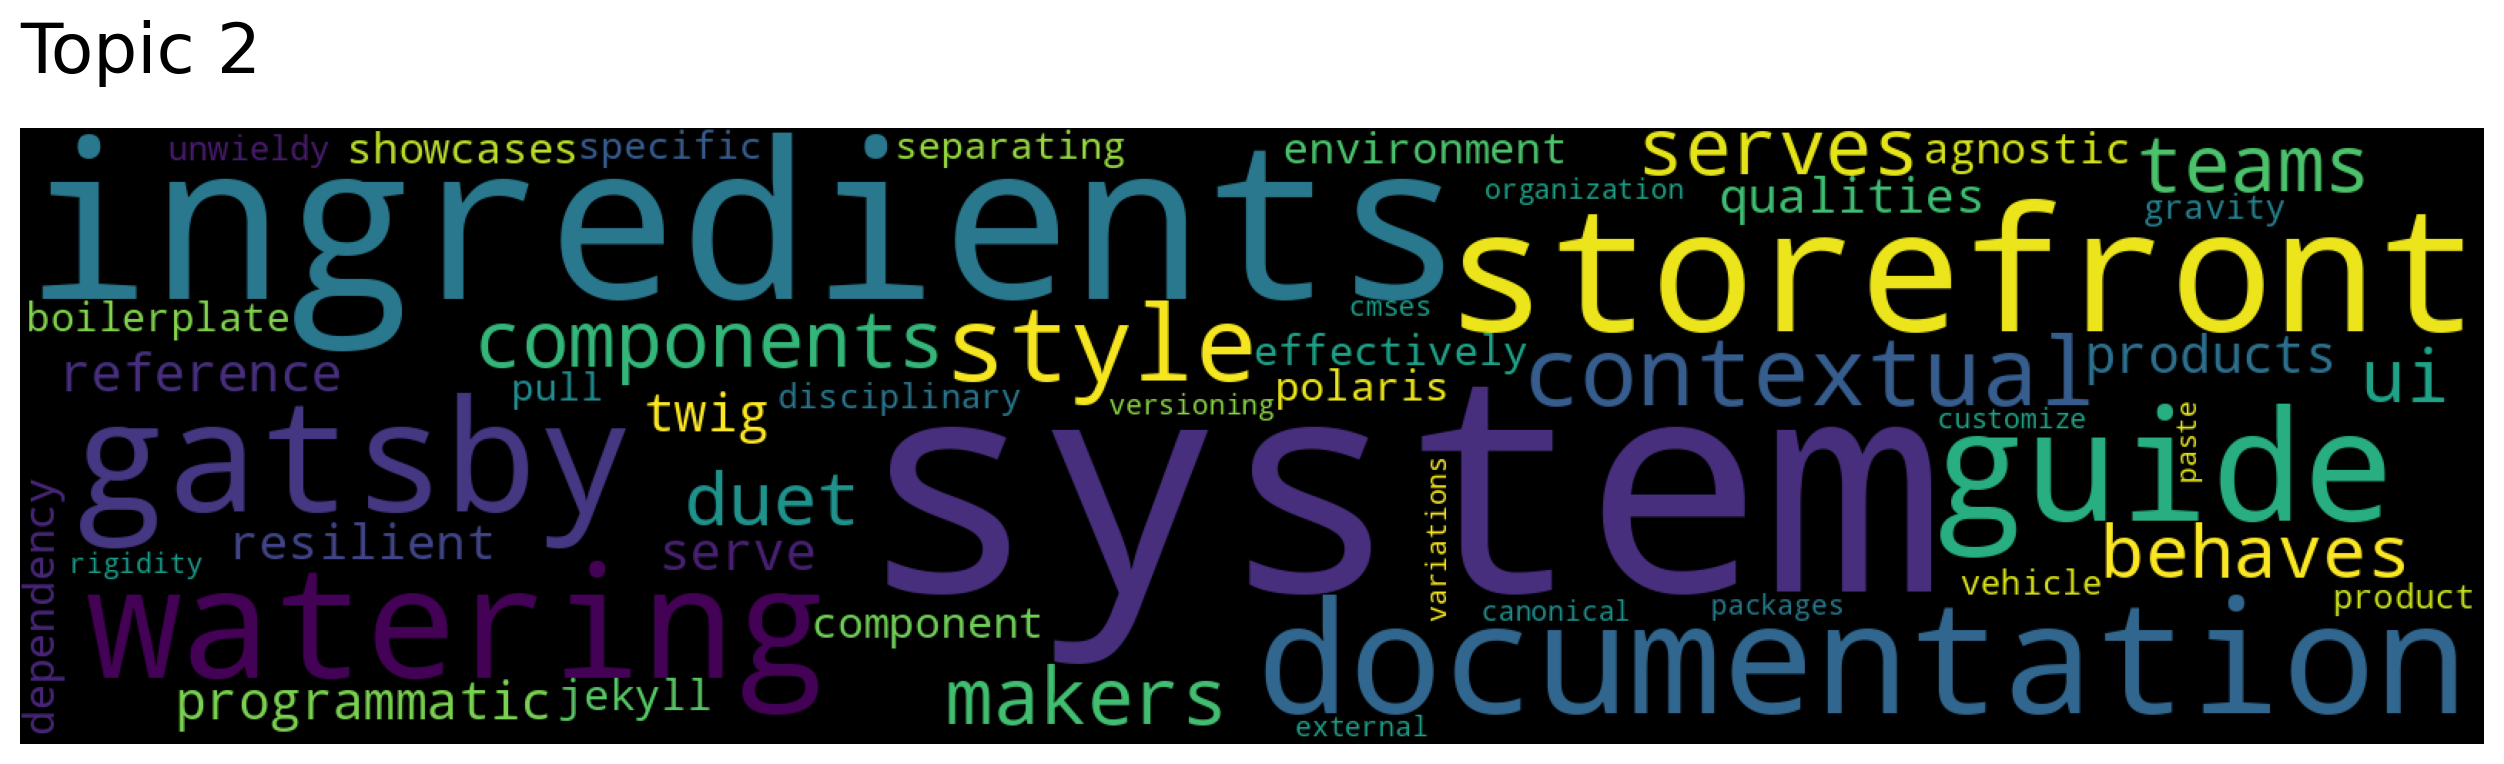

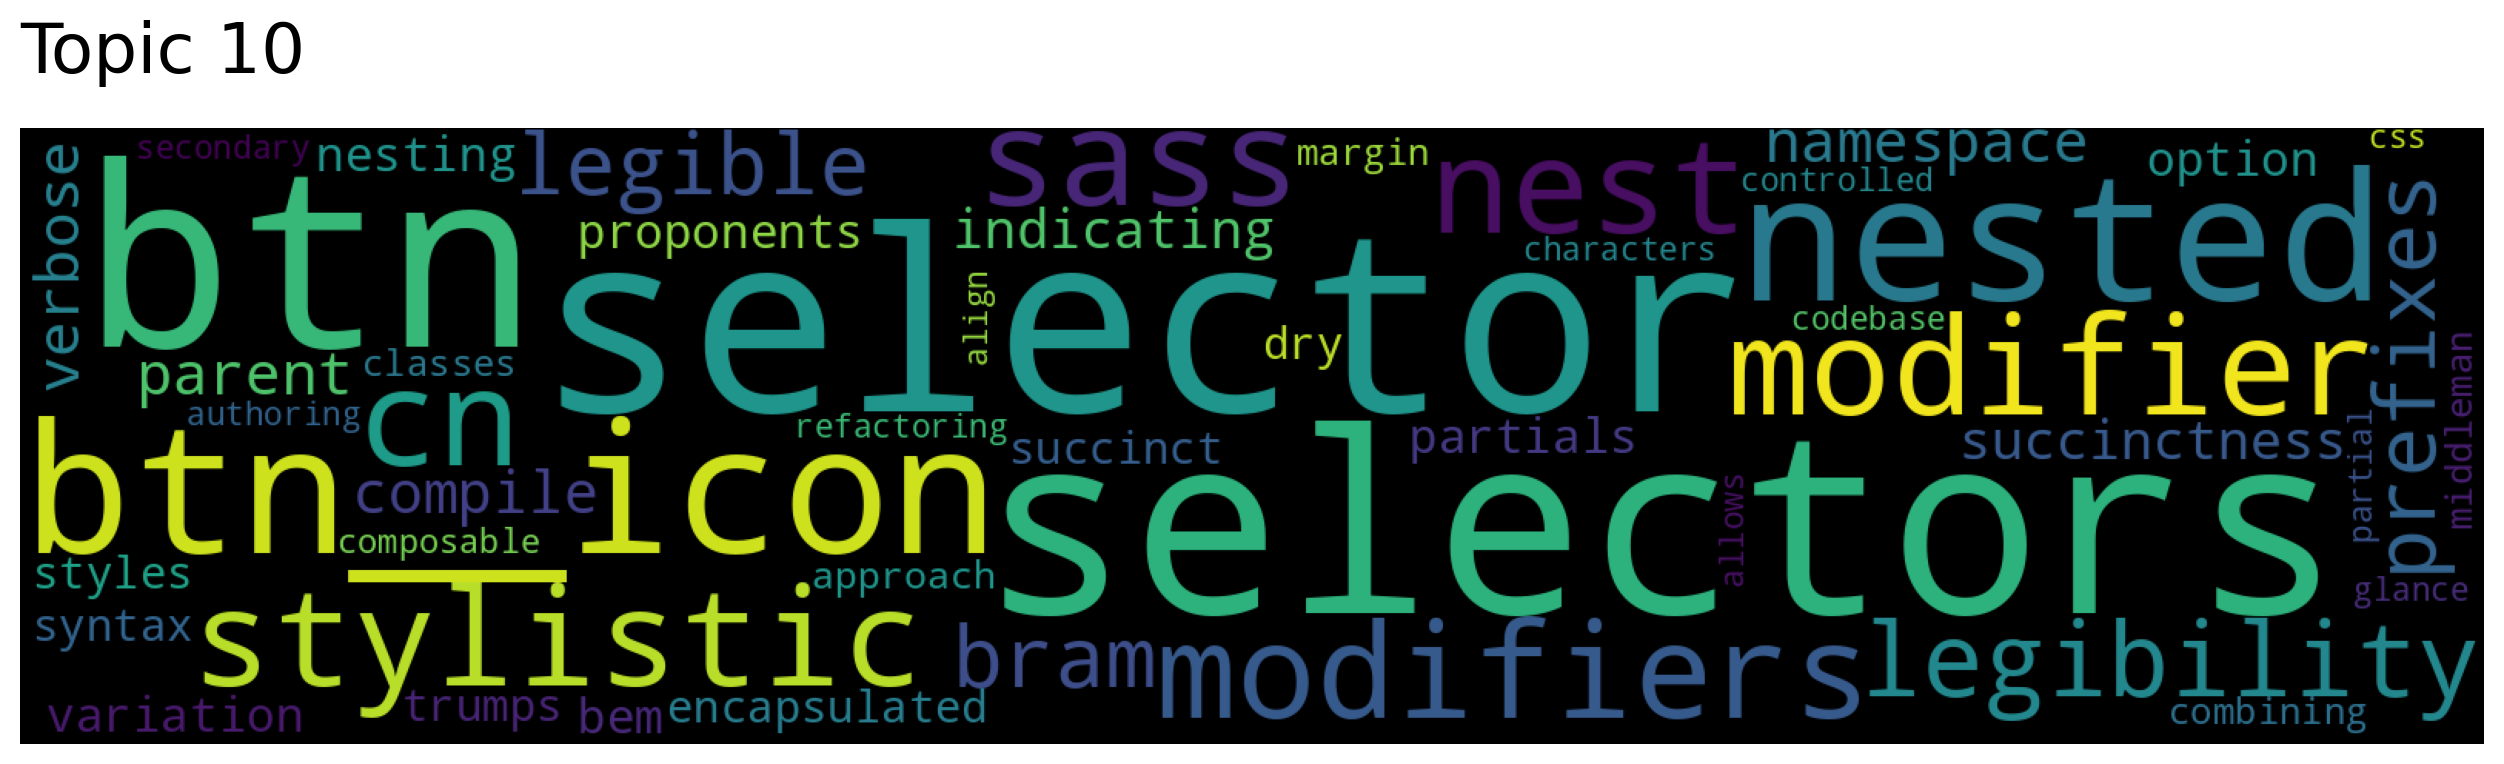

In [28]:
import jsonlines
from top2vec import Top2Vec

def getContents(page):
    return page['content']['raw'].replace('\n', ' ')

documents = list()
with jsonlines.open('pages-' + name + '_extracted_sections.jsonl', 'r') as pages:
    for page in pages:
        for section in page['sections']:
            documents.append(section['title'] + ' ' + section['heading'] + ' ' + section['content'])
        
print(str(len(documents)) + ' documents added for topic generation.')
model = Top2Vec(documents=documents, speed="deep-learn", workers=8, min_count=3)

print()
print(str(model.get_num_topics()) + ' topics discovered.')

print()
print('Top topic returned for keyword search "component":')
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["component"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

print()
print('Top 10 words by similarity to keyword "component":')
words, word_scores = model.similar_words(keywords=["component"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

print()
print('Top 10 sections / topic')
for topic in topic_nums:
    print('Topic ' + str(topic))
    documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=topic, num_docs=10)
    for doc, score, doc_id in zip(documents, document_scores, document_ids):
        print(f"Document: {doc_id}, Score: {score}")
        print("-----------")
        print(doc)
        print("-----------")
        print()
  
print()
print('Top 10 sections for topic #1')
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["component", "create"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

## Create knowledge base

Create a knowledge base using SBert and Sentence Transformers, based on the sections of ingested pages.

This is can all still be done completely "offline", and without any third party APIs.

In [29]:
import json
import gzip
import os
import torch
import string
import numpy as np
from sentence_transformers import SentenceTransformer, CrossEncoder, util
from rank_bm25 import BM25Okapi
from sklearn.feature_extraction import _stop_words
from tqdm.autonotebook import tqdm

if not torch.cuda.is_available():
    print("Warning: No GPU found. Please add GPU to your notebook.")
    
print('Creating SBert knowledge base.')    

# We use the Bi-Encoder to encode all passages, so that we can use it with sematic search
bi_encoder = SentenceTransformer('multi-qa-mpnet-base-dot-v1')
bi_encoder.max_seq_length = 256     # Truncate long passages to 256 tokens
top_k = 32                          # Number of passages we want to retrieve with the bi-encoder

# The bi-encoder will retrieve 100 documents. We use a cross-encoder, to re-rank the results list to improve the quality
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

def getSectionContent(section):
    return section['title'] + ': ' + section['content']

passages = []
with jsonlines.open('pages-' + name + '_extracted_sections.jsonl', 'r') as pages:
    for page in pages:
        passages.extend(map(getSectionContent, page['sections']))

print('Passages:', len(passages))

# We encode all passages into our vector space. This takes about 5 minutes (depends on your GPU speed)
corpus_embeddings = bi_encoder.encode(passages, convert_to_tensor=True, show_progress_bar=True)

print('Corpus Embeddings created.')

# We lower case our text and remove stop-words from indexing
def bm25_tokenizer(text):
    tokenized_doc = []
    for token in text.lower().split():
        token = token.strip(string.punctuation)

        if len(token) > 0 and token not in _stop_words.ENGLISH_STOP_WORDS:
            tokenized_doc.append(token)
    return tokenized_doc

# We also compare the results to lexical search (keyword search). Here, we use 
# the BM25 algorithm which is implemented in the rank_bm25 package.
tokenized_corpus = []
for passage in tqdm(passages):
    tokenized_corpus.append(bm25_tokenizer(passage))

bm25 = BM25Okapi(tokenized_corpus)

print('Tokenized corpus created.')

Creating SBert knowledge base.
Passages: 5468


Batches: 100%|███████████████████████████████████████████████████████████████████████| 171/171 [01:18<00:00,  2.18it/s]


Corpus Embeddings created.


100%|███████████████████████████████████████████████████████████████████████████| 5468/5468 [00:00<00:00, 34873.18it/s]


Tokenized corpus created.


## Define search function

This function will search through our corpus, and retrieve the most relevant sections in relation to the user query given as a parameter.

In [30]:
# This function will search all kickstartDS pages for passages that
# answer the query
def search(query):
    print("Input question:", query)

    ##### BM25 search (lexical search) #####
    bm25_scores = bm25.get_scores(bm25_tokenizer(query))
    top_n = np.argpartition(bm25_scores, -5)[-5:]
    bm25_hits = [{'corpus_id': idx, 'score': bm25_scores[idx]} for idx in top_n]
    bm25_hits = sorted(bm25_hits, key=lambda x: x['score'], reverse=True)
    
    # print("Top-5 lexical search (BM25) hits")
    # for hit in bm25_hits[0:5]:
        # print("\t{:.3f}\t{}".format(hit['score'], passages[hit['corpus_id']].replace("\n", " ")))

    ##### Sematic Search #####
    # Encode the query using the bi-encoder and find potentially relevant passages
    question_embedding = bi_encoder.encode(query, convert_to_tensor=True)
    question_embedding = question_embedding.cuda()
    hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=top_k)
    hits = hits[0]  # Get the hits for the first query

    ##### Re-Ranking #####
    # Now, score all retrieved passages with the cross_encoder
    cross_inp = [[query, passages[hit['corpus_id']]] for hit in hits]
    cross_scores = cross_encoder.predict(cross_inp)

    # Sort results by the cross-encoder scores
    for idx in range(len(cross_scores)):
        hits[idx]['cross-score'] = cross_scores[idx]

    # Output of top-5 hits from bi-encoder
    # print("\n-------------------------\n")
    # print("Top-5 Bi-Encoder Retrieval hits")
    # hits = sorted(hits, key=lambda x: x['score'], reverse=True)
    # for hit in hits[0:5]:
        # print("\t{:.3f}\t{}".format(hit['score'], passages[hit['corpus_id']].replace("\n", " ")))

    # Output of top-5 hits from re-ranker
    print("\n-------------------------\n")
    print("Top-5 Cross-Encoder Re-ranker hits")
    hits = sorted(hits, key=lambda x: x['cross-score'], reverse=True)
    for hit in hits[0:5]:
        print("\t{:.3f}\t{}".format(hit['cross-score'], passages[hit['corpus_id']].replace("\n", " ")))

## Run queries against knowledge base

Using the "search" function defined before we can start querying our knowledge base.

In [31]:
search("What is a Design System?")

Input question: What is a Design System?

-------------------------

Top-5 Cross-Encoder Re-ranker hits
	9.700	https://bradfrost.com/blog/post/design-systems-are-for-user-interfaces/: My prior definition of design systems was this: A design system is the official story of how an organization designs and builds digital products. But my updated definition is as follows: A design system is the official story of how an organization designs and builds digital interfaces. Changing “products” to “interfaces” is a small-but-important change. As mentioned above, there are many different facets to creating digital products, and a design system by itself shouldn’t define and own every standard for creating successful digital products. By creating a boundary around shared UI patterns, we’ve found clarity in our design system work. Like most things in this ever-changing field, we’re constantly refining and honing our mental models and language in order to do better work.
	9.147	https://bradfrost.co